# Experimentations (not serious)

In [ ]:
import requests

def main():
    resp = requests.get("https://api.cryptowat.ch/markets/kraken/btcusd/orderbook")
    orderbook = resp.json()['result']
    print (orderbook)

if __name__ == '__main__':
    main()

In [ ]:
import requests
import pandas as pd

def main():
    resp = requests.get("https://api.coingecko.com/api/v3/coins/link/market_chart/range?vs_currency=usd&from=1575158400&to=1575244800")
    data = resp.json()
    df = pd.DataFrame(data, columns=['Time','Open', 'High','Low','Close'])
    df['Time'] = pd.to_datetime(df['Time'],infer_datetime_format=True)
    df.set_index('Time', inplace=True)
    return df

if __name__ == '__main__':
    main()


In [ ]:
main()

In [ ]:
resp = requests.get("https://api.coingecko.com/api/v3/coins/link/market_chart/range?vs_currency=usd&from=1575158400&to=1575244800")
data = resp.json()['prices'][0]
df = pd.DataFrame(data)
df

In [ ]:
import json

url = 'https://api.cryptowat.ch/markets/binance/btceur/ohlc'
resp = requests.get(url)
resp.raise_for_status()
data = json.loads(resp.content)
data
#df = pd.DataFrame(data['result']['3600'])
#df.head()


In [ ]:
import requests
from pandas.io.json import json_normalize
import pandas as pd 

url = "https://api.coingecko.com/api/v3/coins/link/market_chart/range?vs_currency=usd&from=1575158400&to=1575244800"
#url = 'https://api.coingecko.com/api/v3/coins/link/market_chart?vs_currency=usd&days=200'
resp = requests.get(url)
resp.json()

In [ ]:
    url = "https://api.coingecko.com/api/v3/coins/link/market_chart/range?vs_currency=usd&from=1532995200&to=1596067200"
    # get data from endpoint and load json content
    resp = requests.get(url)
    resp.raise_for_status()
    # parse json into py dict
    resp = json.loads(resp.content)
    type(resp)

In [ ]:
import requests

def main():
    resp = requests.get("https://api.cryptowat.ch/markets/kraken/btcusd/ohlc")
    orderbook = resp.json()['result']
    print (orderbook)

if __name__ == '__main__':
    main()


In [ ]:
two_years = (pd.Timestamp.now() - pd.offsets.Day(730))
print(two_years)
print(pd.Timestamp.now())

In [ ]:
before = '2018-07-31'
after = '2020-07-30'

print(str(int(pd.Timestamp(before).timestamp())))
print(str(int(pd.Timestamp(after).timestamp())))

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
# https://defiexplore.com/api/all-vauls
# ALL VAULTS HISTORICAL DATA (NEEDS WORK)

import requests
import pandas as pd

def get_liquidations():
    url = "https://defiexplore.com/api/all-vaults"
        # get data from endpoint and load json content
    resp = requests.get(url)
    # resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)
    # # df expects list
    df = pd.DataFrame(resp)
    df.set_index('timestamp', inplace=True)
    return df

In [ ]:
https://defiexplore.com/api/cdps/10775

Useful messari API:

- https://data.messari.io/api/v1/assets/btc/metrics/market-data
- https://data.messari.io/api/v1/assets/metrics = metric definitions for timeseries data

In [ ]:
# THIS IS TO SEARCH MESSARI TIMESERIES 
# METRIC IDS and definitions

import json
url = "https://data.messari.io/api/v1/assets/metrics"
        # get data from endpoint and load json content
resp = requests.get(url)
resp.raise_for_status()
        # parse json into py dict
        # this is a list
resp = json.loads(resp.content)
df = json_normalize(resp, record_path=[['data','metrics']],meta=['status'],errors='ignore')
data = dict(df)
df = pd.DataFrame(data)

df[['description','metric_id','values_schema']]

In [ ]:
# FUNCTION TO GET MESSARI TIMESERIES 

def get_messari_timeseries(request, asset, from_date='2018-07-31', to_date='2020-07-30',interval='1d' ):
    url = "https://data.messari.io/api/v1/assets/{asset}/metrics/{request}/time-series?start={from_date}&end={to_date}&interval=1d".format(
        asset=asset,request=request,from_date=from_date, to_date=to_date)
        # get data from endpoint and load json content
    resp = requests.get(url)
    # resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['data']['values']
    # # df expects list
    df = pd.DataFrame(resp, columns=['datetime',f'{asset}_{request}'])
    # change date format
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    # set df index to date
    df.set_index('datetime', inplace=True)
    return df


In [ ]:
get_messari_timeseries('real.vol','btc').tail()

In [ ]:


def get_listexchange_bycoin():
    url = "https://api.coinpaprika.com/v1/coins/link-chainlink/exchanges"
        # get data from endpoint and load json content
    resp = requests.get(url)
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)
    df = json_normalize(resp)
    # df expects list
    return df

In [ ]:
get_coinlist().head()

In [ ]:
url = 'https://min-api.cryptocompare.com/data/exchange/histoday?tsym=USD&limit=10'
        # get data from endpoint and load json content
resp = requests.get(url)
resp.raise_for_status()
        # parse json into py dict
        # this is a list
resp = json.loads(resp.content)['Data']
#type(resp)

# creates df and flattens json
df = pd.DataFrame(resp)
df.head()

In [ ]:
df.info()

In [ ]:
import requests
from pandas.io.json import json_normalize
import pandas as pd 
import json

#def get_markets_bycoin(asset,):

url = "https://api.coinpaprika.com/v1/coins/link-chainlink/markets"
        # get data from endpoint and load json content
resp = requests.get(url)
resp.raise_for_status()
        # parse json into py dict
        # this is a list
resp = json.loads(resp.content)
#type(resp)

# creates df and flattens json
df = json_normalize(resp)
#df.head()
df = df[['exchange_name','pair','quotes.USD.volume_24h','quote_currency_name']]

In [ ]:
df.head()

In [ ]:
# df.head()
pair = df[['exchange_name','pair','quotes.USD.volume_24h','adjusted_volume_24h_share']].groupby(by='pair')
pair.first()

In [ ]:
type(df)

In [ ]:
# SUPER IMPORTANT
# CODE TO flattening JSON objects of arbitrary structure
# WORKS FOR ONE COLUMN, NOT ALL DATAFRAME
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

In [ ]:
# THEN USE THIS 
# ONLY FOR ONE COLUMN
flat = flatten_json(sample_object2)
json_normalize(flat)

---

---

# FUNCTIONS TO FETCH DATA

data sources:
- santiment
- coingecko
- defiexplore
- 0xtracker
- uniswap
- kyber
- alethio
- glassnode
- coinmetrics

**@todo to be added:** 
- defipulse data aggregator
- blocklytics
- messari
- loanscan - defi rates
- **aave - liquidations**

top data sources: for high grade analysis
- santiment
- glassnode
- coinmetrics
- defipulse = gas and defi metrics
- codefi (future)

to explore: 
- nomics
- bitquery/bloxy.info
- graphql interfaces > aave, uniswap, vulcanize


In [4]:
# IMPORT ALL PACKAGES
import requests
from pandas.io.json import json_normalize
import pandas as pd 
import json
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Santiment

Used for: 

- token information 
- token distribution 
- daily asset pricing metrics
- hourly asset pricing metrics 
- on-chain volumes 
- exchange volumes 
- exchange balances 
- on-chain trading activity

Source data dictionaries and glossary:
- https://github.com/santiment/sanpy#available-metrics
- https://academy.santiment.net/sansheets/functions/
- https://academy.santiment.net/glossary/ 
- https://academy.santiment.net/metrics/

Data types: 
- time series: https://academy.santiment.net/metrics/details/data-type#timeseries-data
- histogram/categorical: https://academy.santiment.net/metrics/details/data-type#histogram-data 

---

search data and metadata

In [627]:
import san
# san.ApiConfig.api_key = 'xauqgnp4uvwk4u7c_a5x7oyk6zj5bcyzn'
# san.ApiConfig.api_key = 'ei6x55qxlf45vw7j_l55jsmq4ku55biai'
# san.ApiConfig.api_key = 'xauqgnp4uvwk4u7c_a5x7oyk6zj5bcyzn'
# san.ApiConfig.api_key = 'phagx4qcxbcx4eca_sqjmwfh7q2fojtot'
# ei6x55qxlf45vw7j_l55jsmq4ku55biai
# san.ApiConfig.api_key ='prlz5ih6qvtlrhgj_o742l5znpabwtlou'
san.ApiConfig.api_key ='6mglxjgy7dl3mzux_55jpklyowrzdfaum'

In [6]:
# SEARCH AVAILABLE DATA FUNC

# search for available metric in api, given slug (aka token) and search term
def search_metric(slug,search_term):
    metric_list = []
    santiment = san.available_metrics_for_slug(slug)
    for i in santiment:
        if search_term in i:
            metric_list.append(i)
    print('source: santiment')
    return metric_list

In [ ]:
# select data point to fetch
# Running as single func (project, term)
search_metric('chainlink','hold')

In [ ]:
# check availability of data since
san.available_metric_for_slug_since(metric='active_deposits', slug='chainlink')

In [7]:
# check query complexity
def get_metric_complexity(request, from_date='2018-07-31', to_date='2020-07-31',interval='1h'):
    df = san.metric_complexity(
        f'{request}',
        from_date=from_date,
        to_date=to_date,
        interval=interval
    )
    print('source: santiment')
    print(f'complexity score: {df}')
    return f'Too complex for free plan: {df > 20000}' 

Time series data

In [8]:
# IMPORTANT TIME SERIES FUNCTION
# interval - The interval of the returned data - an integer followed by one of: s, m, h, d or w

# This allows to create a ts df for a given metric
def get_metric_timeseries(request, asset,from_date='2018-07-31', to_date='2020-07-31',interval='1d'):
    df = san.get(
        f'{request}/{asset}',
        from_date=from_date,
        to_date=to_date,
        interval=interval
    )
    # if no col named value, renaming ignored
    df = df.rename(columns={'value':f'{asset}_{request}'})
    # print data source
    print(f'source: santiment') 
    return df

In [9]:
# IMPORTANT TIME SERIES DF JOIN FUNCTION

# This can be improved to include more df (*args)
# This allows to .join timeseries dfs on common index (datetime)
def aggregate_timeseries_df(df,df1,df2):
    # join df on indexes (datetime)
    df = df.join(df1).join(df2)
    return df

In [ ]:
# IMPORTANT DIRECT CALL TO SANPY API

san.get('ohlcv/chainlink').head()
# ALTERNATIVE BUT SAME
get_metric_timeseries('ohlcv','chainlink').head()

In [629]:
df = get_metric_timeseries('supply_on_exchanges','chainlink')
df.count()

source: santiment


chainlink_supply_on_exchanges    71
dtype: int64

In [ ]:
df['chainlink_supply_on_exchanges'] = df['chainlink_supply_on_exchanges'].astype('int')
df['chainlink_supply_on_exchanges'].plot(figsize=(15,7))

In [10]:
# csv top holders holding 
# Breaks down the number of addresses based on the amount of LINK they hold
def get_distro_holdhist():
    df_distro_hold = pd.read_csv('data/token_holder_distro_chainlink.csv',
                    na_values=['', '?', '-'],
                    parse_dates=[0],
                    index_col=[0])                 
    return df_distro_hold

In [11]:
# Get historical balance of address - team treasury
# args: request (historical_balance), asset, address, from, to,interval
def get_addbal_timeseries(request, asset, address, from_date='2018-07-31', to_date='2020-07-31',interval='1d'):
    df = san.get(
        f'{request}/{asset}',
        address=f'{address}',
        from_date=from_date,
        to_date=to_date,
        interval=interval
    )
    # if no col named value, renaming ignored
    df = df.rename(columns={'value':f'{asset}_{request}'})
    df = df.rename(columns={'balance':f'balance_{address[:7]}'})
    # print data source
    print(f'source: santiment') 
    return df

non time series or histogram data

In [12]:
# FUNCTION FOR NON TIMESERIES REQUESTS
# Static
def get_nonts_metric(request='projects',requestgroup='all'):
    df = san.get(
        f'{request}/{requestgroup}'
    )
    return df

In [13]:
# FUNCTION TO AGG NON TIMESERIES
# This can be improved to include more df (*args)
# This allows to .join timeseries dfs on common index (key)
def aggregate_nonts_df(df,df1):
    # join df on indexes (key column)
    # add suffix if duplicate col names
    df = df.join(df1, lsuffix='left')
    return df

## Messari API

Used for: 
- trading real volume 
- 

In [14]:
# documentation: 
# Function to get all metric ids from messari (used for ts data)
def get_messari_metrics():
        url = 'https://data.messari.io/api/v1/assets/metrics'
        resp = requests.get(url)
                # get data from endpoint and load json content
        resp.raise_for_status()
                # parse json into py dict
                # this is a list
        resp = json.loads(resp.content)['data']['metrics']
        # df expects list
        df = pd.DataFrame(resp)
        # df = json_normalize(resp)
        df = df[['metric_id','description','minimum_interval','values_schema']]
        df.set_index('metric_id', inplace=True)
        return df

In [15]:
df = get_messari_metrics()
df.head()

,description,minimum_interval,values_schema
metric_id,,,
hashrate,The mean rate at which miners are solving hash...,1d,{'hash_rate': 'Hash rate is the speed at which...
bitwise.price,Volume weighted average price over Bitwise 10 ...,1m,{'open': 'The price of the asset at the beginn...
real.vol,It is well known that many exchanges conduct w...,1m,{'volume': 'The total volume traded during the...
blk.cnt,The sum of the size (in bytes) of all blocks c...,1d,{'block_count': 'The sum count of blocks creat...
blk.size.byte,The sum of the size (in bytes) of all blocks c...,1d,{'block_count': 'The sum of the size (in bytes...


In [16]:
# Function to get all messari timeseries data
# Required args: assetkey (e.g. chainlink), metricid
# If more than one col value this may break!

# documentation: https://messari.io/api/docs#operation/Get%20Asset%20timeseries
# args: start (YYYY-MM-DD), end (YYYY-MM-DD)
# interval "1m" "5m" "15m" "30m" "1h" "1d" "1w"

def get_messari_ts(assetkey, metricid,interval='1d', start='2018-07-31', end='2020-07-31'):
    url = 'https://data.messari.io/api/v1/assets/{assetkey}/metrics/{metricid}/time-series'.format(assetkey=assetkey, metricid=metricid)
    resp = requests.get(url, params={
        'start': f'{start}',
        'end': f'{end}',
        'interval':f'{interval}'
    })
        # get data from endpoint and load json content
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['data']['values']
    # df expects list
    df = pd.DataFrame(resp, columns=['datetime',f'{metricid}'])
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    df.set_index('datetime', inplace=True)
    return df

In [ ]:
df = get_messari_ts('chainlink','real.vol',end='2020-08-12')
df['real.vol'] = df['real.vol'].astype('int')

In [ ]:
df.tail()

--- 

## Coinpaprika 

Used for: 
- 

## Cryptocompare

Used for: 
- https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistoday
- https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistohour
- daily_ohlcv
- hourly_ohlcv
- daily_trading_volume_by_exchange (and token pair)
- hourly-trading_volume_by_exchange (and token pair)

In [17]:
# documentation: https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataHistoday
# documentation: https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataHistohour
# Get open, high, low, close, volumefrom and volumeto from the daily/hourly historical data. 
# arg: symbol (crypto), to_currency (e.g usd), limit=2000 max, before: end date ts
# period: ohlcv either "histoday" (default) or "histohour".

def get_ohlcv_dayorhour(symbol, to_currency, exchange,period='histoday',limit=2000, before='2020-07-31'):
    url = 'https://min-api.cryptocompare.com/data/v2/{period}?fsym={symbol}&tsym={to_currency}'.format(
        symbol=symbol,to_currency=to_currency,period=period)
        # get data from endpoint and load json content
    resp = requests.get(url, params={
        'e': f'{exchange}',
        'limit': f'{limit}',
        'toTs': str(int(pd.Timestamp(before).timestamp()))
    })
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['Data']['Data']
    # df expects list
    df = pd.DataFrame(resp)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    df = df.rename(columns={'volumefrom':f'volumefrom_{symbol}_{exchange}'})
    df = df.rename(columns={'volumeto':f'volumeto_{to_currency}_{exchange}'})
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}') 
    return df[['open','close','high','low',f'volumefrom_{symbol}_{exchange}',f'volumeto_{to_currency}_{exchange}']]

In [18]:
# Example get ohlcv
df = get_ohlcv_dayorhour('LINK','BTC','Binance')
df_hour = get_ohlcv_dayorhour('LINK','BTC','Binance',period='histohour')

source: cryptocompare
source: cryptocompare


In [19]:
df.tail()

,open,close,high,low,volumefrom_LINK_Binance,volumeto_BTC_Binance
time,,,,,,
2020-07-27,0.000755,0.000643,0.000756,0.000606,9964760.3,6655.12
2020-07-28,0.000643,0.000663,0.000687,0.000618,5204103.7,3397.08
2020-07-29,0.000663,0.000638,0.000688,0.000620,4127601.2,2679.99
2020-07-30,0.000638,0.000668,0.000686,0.000636,4815836.5,3197.74
2020-07-31,0.000668,0.000688,0.000711,0.000654,4422497.3,3038.82


In [19]:
# documentation: https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistoday
# documentation: https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistohour
# Get volume total for trading pair from each exchange from the daily/hourly historical data. 
# arg: symbol (crypto), to_currency (e.g usd), limit=2000 max, before: end date ts
# period: ohlcv either "histoday" (default) or "histohour".

def get_exchangevol_dayorhour(symbol, to_currency, exchange,period='histoday',limit=2000, before='2020-07-31'):
    url = 'https://min-api.cryptocompare.com/data/exchange/symbol/{period}?fsym={symbol}&tsym={to_currency}'.format(
        symbol=symbol,to_currency=to_currency,period=period
    )
    resp = requests.get(url, params={
        'e': f'{exchange}',
        'limit': f'{limit}',
        'toTs': str(int(pd.Timestamp(before).timestamp()))
    })
        # get data from endpoint and load json content
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['Data']
    # df expects list
    df = pd.DataFrame(resp)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    df = df.rename(columns={'volumefrom':f'volumefrom_{symbol}_{exchange}'})
    df = df.rename(columns={'volumeto':f'volumeto_{to_currency}_{exchange}'})
    df = df.rename(columns={'volumetotal':f'volumetot_{symbol}{to_currency}{exchange}'})
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')  
    return df

In [ ]:
df = get_exchangevol_dayorhour('LINK','USD','Binance',before='2020-07-31')
df_hour = get_exchangevol_dayorhour('LINK','USD','Binance',period='histohour',before='2020-07-31')

In [634]:
get_exchangevol_dayorhour('LINK','ETH','uniswap',before='2020-07-31').tail()

source: cryptocompare


,volumefrom_LINK_uniswap,volumeto_ETH_uniswap,volumetot_LINKETHuniswap
time,,,
2020-07-27,193.90,0,193.90
2020-07-28,46.01,0,46.01
2020-07-29,21.38,0,21.38
2020-07-30,25.12,0,25.12
2020-07-31,26.69,0,26.69


In [ ]:
df = get_exchangevol_dayorhour('LINK','BTC','uniswap',before='2020-07-31')
df.tail()

Top trading pair lists

In [20]:
# documentation: https://min-api.cryptocompare.com/documentation?key=Toplists&cat=topPairsEndpoint
# Get top pairs by volume for a coin
# arg: e.g. 
def get_toppairs_vol(symbol, limit=10):
    url = 'https://min-api.cryptocompare.com/data/top/pairs?fsym={symbol}&limit={limit}'.format(
        symbol=symbol,limit=limit)
        # get data from endpoint and load json content
    resp = requests.get(url)
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['Data']
    # df expects list
    df = pd.DataFrame(resp)
    df['lastUpdateTs'] = pd.to_datetime(df['lastUpdateTs'], unit='s')
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}') 
    return df[['fromSymbol','toSymbol','volume24h','lastUpdateTs']]

In [22]:
get_toppairs_vol('LINK')

source: cryptocompare


,fromSymbol,toSymbol,volume24h,lastUpdateTs
0,LINK,USDT,3.608925e+07,2020-08-16 00:22:51
1,LINK,TUSD,5.725551e+04,2020-08-16 00:18:52
2,LINK,ETH,3.287680e+06,2020-08-16 00:22:39
3,LINK,BIX,5.663583e+02,2020-08-16 00:18:30
4,LINK,BUSD,2.936555e+05,2020-08-16 00:21:44
5,LINK,BTC,1.369614e+07,2020-08-16 00:22:41
6,LINK,USDC,1.770258e+05,2020-08-16 00:20:49
7,LINK,USD,9.490520e+06,2020-08-16 00:22:39
8,LINK,KRW,2.141110e+06,2020-08-16 00:22:16
9,LINK,EUR,1.038963e+06,2020-08-16 00:22:22


In [21]:
api_key = '83e625a6bc3dbda445bd3b9001ba7d6f63ffafc91f75763f4a9b993bb1e2514d'

In [22]:
# Get cryptocompare symbol trading pairs by exchange
# documentation: https://min-api.cryptocompare.com/documentation?key=PairMapping&cat=pairMappingMappedSymbolEndpoint
# NEEDS API_KEY

def get_cc_pairbyexchange(symbol,api_key=api_key):
    url = 'https://min-api.cryptocompare.com/data/v2/pair/mapping/fsym?fsym={symbol}&api_key={api_key}'.format(symbol=symbol,api_key=api_key)
        # get data from endpoint and load json content
    resp = requests.get(url)
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)['Data']['current']
    # df expects list
    df = pd.DataFrame(resp)
    df['last_update'] = pd.to_datetime(df['last_update'], unit='s')
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')    
    return df#[['fromSymbol','toSymbol','volume24h','lastUpdateTs']]b

In [ ]:
df = get_cc_pairbyexchange('LINK')
df.head()

---

## Coingecko

Used for: 

token:
- ohlcv daily of coins

exchanges/markets:
- list of all exchanges
- list of exchanges/markets coin is listed
- exchange volume by ticker or coin
- exchange total volume historical


Snapshot/static metrics

In [23]:
# Static
# Returns the coin pairs, exchanges where coin traded and last volumes
# check get_coin_list() for ids
def get_markets_bycoin(asset,exchange_id=''):
    url = 'https://api.coingecko.com/api/v3/coins/{asset}/tickers'.format(asset=asset)
    resp = requests.get(url, params={
        'id': f'{asset}',
        'exchange_ids': f'{exchange_id}'
    })    
    resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)['tickers']
        # df expects list
    df = json_normalize(resp)
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')  
    return df[['coin_id','base','target','market.name','volume','trust_score']]
# df[['base','target','trust_score','volume']].head()

In [ ]:
df = get_markets_bycoin('chainlink')
df.head()

In [24]:
# Documentation: https://www.coingecko.com/en/api/coins/markets
# Get overview market information about token 
# args: asset (e.g.'chainlink'), currency (output in 'usd' by default)

def get_coin_info(asset, currency='usd'):
    url = 'https://api.coingecko.com/api/v3/coins/markets?vs_currency={currency}&ids={asset}'.format(asset=asset,currency=currency)
    resp = requests.get(url, params={
        'vs_currency': f'{currency}',
        'ids': f'{asset}'
    })    
    resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)
        # df expects list
    df = json_normalize(resp)
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')  
    return df

In [ ]:
df = get_coin_info('chainlink')
df = df[['id','total_supply','circulating_supply','current_price','market_cap','market_cap_rank','total_volume','ath','atl']]
df.melt()
# df.info()

In [25]:
# Static
# Coingecko
# Get full list of coins or full list of exchanges
# arg: "exchanges" OR "coins" 

def get_exchange_or_coinslist(exchanges_coins):
    url = "https://api.coingecko.com/api/v3/{exchanges_coins}/list".format(exchanges_coins=exchanges_coins)
        # get data from endpoint and load json content
    resp = requests.get(url)
    resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)
    # df expects list
    df = pd.DataFrame(resp)
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')  
    return df

In [ ]:
get_exchange_or_coinslist('coins').head()

timeseries

In [27]:
# Timeseries
# THIS IS GOOD!
# TRANSFORM INTO FUNCTION!
# COINGECKO API
# No need for apikeys 

import requests
from pandas.io.json import json_normalize
import pandas as pd 
import json

def get_hist_price(symbol, currency='usd', start='2018-07-31', end='2020-07-31'):

    # api url formatted
    # symbol are {id} 
    url = "https://api.coingecko.com/api/v3/coins/{symbol}/market_chart/range?vs_currency={currency}&from={start}&      to={end}".format(symbol=symbol,currency=currency,start=start, end=end)
    # get data from endpoint and load json content
    resp = requests.get(url, params={
        # handle unix timestamps
        'from': str(int(pd.Timestamp(start).timestamp())),
        'to': str(int(pd.Timestamp(end).timestamp()))
        })
    resp.raise_for_status()
    # parse json into py dict
    resp = json.loads(resp.content)

    # set df from json dict
    # use list comprehension to iterate over dict
    df = pd.DataFrame({
        'dates':[x[0] for x in resp['prices']],
        'prices': [x[1] for x in resp['prices']],
        'market_caps': [x[1] for x in resp['market_caps']],
        'total_volumes': [x[1] for x in resp['total_volumes']]
    })
    # change date format
    df['dates'] = pd.to_datetime(df['dates'], unit='ms')
    # set df index to date
    df.set_index('dates', inplace=True)
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')  
    return df

In [ ]:
get_hist_price('chainlink').tail()

In [ ]:
# search id and symbol at coingecko
df = get_coinlist()
df.loc[df['id'] == 'chainlink']

In [ ]:
# uses coingecko coin id
# note: bitcoin not btc, ethereum not eth
df = get_hist_price('ethereum')

In [ ]:
df.shape

---

## Defiexplore

Used for: 
- liquidations data
- auctions data
- vault history data

Sources:
- liquidations: https://defiexplore.com/api/auctions
- all vaults: https://defiexplore.com/api/all-vaults

Timeseries - liquidations

In [28]:
# GET LIQUIDATIONS DATA

import requests
import pandas as pd

def get_liquidations():
    url = "https://defiexplore.com/api/auctions"
        # get data from endpoint and load json content
    resp = requests.get(url)
    # resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)
    # # df expects list
    df = pd.DataFrame(resp)
    # df index
    df.set_index('timestamp', inplace=True)
    # print data source
    url = url.split('.')[0]
    print(f'source: {url}')  
    return df

In [29]:
def get_vaults_list():
    url = "https://defiexplore.com/api/all-vaults"
        # get data from endpoint and load json content
    resp = requests.get(url)
    # resp.raise_for_status()
        # parse json into py dict
        # this is a list
    resp = json.loads(resp.content)
    # # df expects list
    df = pd.DataFrame(resp)
    # df index
    df.set_index('cdpId', inplace=True)
    # print data source
    url = url.split('.')[0]
    print(f'source: {url}')  
    return df

In [ ]:
# PLACEHOLDER FOR ALL-VAULTS DATA
get_liquidations().head()

In [ ]:
liquidations = get_liquidations()
liquidations['profit'].sum()

In [ ]:
liquidations.dtypes.value_counts()

In [ ]:
liquidations.dtypes

In [ ]:
get_vaults_list().head(10)

---

## On-chain DEX

Sources: 
- blocklytics
- 0xtracker
- uniswap
- kyber


### 0x tracker

In [30]:
# get volume from 0x tracker on token
# 0x514910771af9ca656af840dff83e8264ecf986ca = link

def get_0x_tokenvolume(token_add, granularity='day', period='all'):
    url = 'https://api.0xtracker.com/metrics/token'
    resp = requests.get(url, params={
        'granularity': 'day',
        'token': f'{token_add}',
        'period': 'all'
    })
        # resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)
        # # df expects list
    df = json_normalize(resp)
    df.set_index('date', inplace=True)
    
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')
    return df

In [ ]:
df = get_0x_tokenvolume('0x514910771af9ca656af840dff83e8264ecf986ca')
df.tail()

### Bancor - FUNCTIONS NOT WORKING

In [31]:
# This kind of works (last few days only)
# But lots of data missing

def get_bancor_token_vol():
    url = 'https://api.bancor.network/0.1/currencies/volumeHistory?toCurrencyCode=eth&fromCurrencyCode=link&timeFrame=year'
    resp = requests.get(url)
    resp = json.loads(resp.content)['data']['data'][::]

    df_bancor_vol = json_normalize(resp)
    df_bancor_vol['timeStamp'] = pd.to_datetime(df_bancor_vol['timeStamp'], unit='ms')
    df_bancor_vol.set_index('timeStamp', inplace=True)
    
    return df_bancor_vol

In [ ]:
get_bancor_token_vol().tail()

In [32]:
# PROBLEM: THIS IS ALWAYS RETURNING 0 VOLUME
# DOES NOT WORK!
def get_bancor_tokenvolume(to_currency, from_currency, timeframe='year', start='2020-01-31', end='2020-07-31'):
    url = 'https://api.bancor.network/0.1/currencies/volumeHistory?toCurrencyCode={to_currency}&fromCurrencyCode={from_currency}&timeFrame={timeframe}'.format(to_currency=to_currency,from_currency=from_currency,timeframe=timeframe)
    resp = requests.get(url)
    resp = json.loads(resp.content)['data']['data'][::]

    df = json_normalize(resp)
    df.to_csv('bancor1.csv')
    df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms')
    df.set_index('timeStamp', inplace=True)

    return df.head()

In [33]:
# PROBLEM: THIS IS ALWAYS RETURNING 0 VOLUME

# documentation: https://support.bancor.network/hc/en-us/articles/360018984251-Historical-Volume-API
# Get volume data on trading pair from bancor
# toCurrencyCode={currency_symbol}
# fromCurrencyCode={currency_symbol}
# timeFrame={hour, day, week, year}
# startDate={UNIX time in milliseconds}
# endDate={UNIX time in milliseconds}
def get_bancor_tokenvolume(to_currency, from_currency, timeframe='day', start='2018-07-31', end='2020-07-31'):
    url = 'https://api.bancor.network/0.1/currencies/volumeHistory?'
    resp = requests.get(url, params={
        'toCurrencyCode': f'{to_currency}',
        'fromCurrencyCode': f'{from_currency}',
        'timeFrame': f'{timeframe}',
        'startDate': str(int(pd.Timestamp(start).timestamp())),
        'endDate': str(int(pd.Timestamp(end).timestamp()))

    })
        # resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)['data']['data'][::]
        # # df expects list
    df = json_normalize(resp)
    # pd.DataFrame(df)
    df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')    
    df.set_index('timeStamp', inplace=True)
    
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')
    return df

In [ ]:
df = get_bancor_tokenvolume('eth', 'link', timeframe='day', start='2018-07-31', end='2020-07-31')
df.head()

---

## Coinmetrics

Used for: 
- lots of summary stats
- csv formatted data (API also available but requires PRO key)

Documentation:
- https://github.com/coinmetrics-io?language=python
- https://coinmetrics.io/tools/
- https://docs.coinmetrics.io/info/assets/link > free vs pro tiers
- https://docs.coinmetrics.io/info/metrics > full data dictionary


In [34]:
# Get all the data dictionary and definitions
# for metrics file
df = pd.read_csv('data/coinmetrics_info.csv',
                 na_values=['', '?', '-'],
                 parse_dates=[0],
                 index_col=[0])                 

In [35]:
# summary stats from coinmetrics
df = pd.read_csv('data/coinmetrics_link.csv',
                 na_values=['', '?', '-'],
                 parse_dates=[0],
                 index_col=[0])                 

---

## Alethio

Used for: **DEFI products and rates**
- Defi stats (snapshot and timeseries)
- daily_earn_apr (by platform and token)
- daily_borrow_apr (by platform and token)
- daily_outstanding_debt
- daily_supply


In [ ]:
before = '2018-07-30'
after = '2020-08-05'

print(str(int(pd.Timestamp(before).timestamp())))
print(str(int(pd.Timestamp(after).timestamp())))

Snapshot of rates

In [36]:
# documentation: https://consensys.github.io/codefi-data-fundamental-api-redoc/#tag/DeFi/paths/~1v0~1defi~1snapshot/get

def get_defi_rates_snap():
    url = 'https://api.aleth.io/v0/defi/snapshot'
    resp = requests.get(url)

    resp = requests.get(url) 
    resp.raise_for_status()

    resp = json.loads(resp.content)['data']
            # # df expects list
    df = json_normalize(resp)
    df.set_index('protocol',inplace=True)
    df = df.drop('timestamp',axis='columns')
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')
    return df 

In [ ]:
# Example
get_defi_rates_snap().head()

Timeseries data: APR rates / collateral ratios / debt / supply

In [37]:
# documentation: https://docs.aleth.io/api#tag/DeFi/paths/~1v0~1defi~1history/get
# documentation (new): https://consensys.github.io/codefi-data-fundamental-api-redoc/#tag/DeFi/paths/~1v0~1defi~1history/get
# protocols: "maker" "mcd" "compound" "dydx" "bzx" "ddex" "aave" "lendf"
# assets: "eth" "dai" "sai" "usdc" "bat" "zrx" "rep" "wbtc" "knc" "link" "usdt" "susd" "snx" "mkr" "lend" "mana" "imbtc" "usdx" "tusd"
# metric: "earn_apr" "borrow_apr" (by default both)
# granularity: 24 (default: daily)

def get_defi_ratehist(protocol, asset, after='2018-07-31', before=''):
    url = 'https://api.aleth.io/v0/defi/history'
    resp = requests.get(url)

    resp = requests.get(url, params={
        'after': str(int(pd.Timestamp(after).timestamp())),
        'assets':[f'{asset}'],
        # 'metrics': ['borrow_apr'],
        'protocols':f'{protocol}'	
    })
    resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)['data']
        # # df expects list
    resp = json_normalize(resp)['points']
    
    # dataframe split earn 
    df = pd.DataFrame(resp[0],columns=['timestamp',f'{protocol}_earn_apr'])
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df.set_index('timestamp', inplace=True)
    
    # dataframe split borrow
    df1 = pd.DataFrame(resp[1],columns=['timestamp',f'{protocol}_borrow_apr'])
    df1['timestamp'] = pd.to_datetime(df1['timestamp'],unit='s')
    df1.set_index('timestamp', inplace=True)
    
    # get df timeseries
    df2 = df.join(df1)
    
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')
    return df2

In [ ]:
get_defi_ratehist('aave','link').head()

In [38]:
# documentation: https://docs.aleth.io/#tag/DeFi/paths/~1v0~1defi~1stats/get
# documentation(new): https://consensys.github.io/codefi-data-fundamental-api-redoc/#tag/DeFi/paths/~1v0~1defi~1stats/get
# metrics: "collateral_ratio" "outstanding_debt" "supply_volume"
# protocol: "maker" "mcd" "compound" "dydx" "bzx" "ddex" "aave" "lendf"
# granularity: default 24 (daily)
# assets: "eth" "dai" "sai" "usdc" "bat" "zrx" "rep" "wbtc" "knc" "link" "usdt" "susd" "snx" "mkr" "lend" "mana" "imbtc" "usdx" "tusd"

def get_defi_protocol_statshist(protocol, asset, after='2018-07-31', before=''):
    url = 'https://api.aleth.io/v0/defi/stats'
    resp = requests.get(url)

    resp = requests.get(url, params={
        'after': str(int(pd.Timestamp(after).timestamp())),
        'assets':[f'{asset}'],
        # 'metrics': ['collateral_ratio', 'outstanding_debt', 'supply_volume'],
        'protocols':f'{protocol}'	
    })
    resp.raise_for_status()
            # parse json into py dict
            # this is a list
    resp = json.loads(resp.content)['data']
        # # df expects list
    resp_cr = json_normalize(resp)['collateral_ratio']
    resp_debt = json_normalize(resp)['outstanding_debt']
    resp_vol = json_normalize(resp)['supply_volume']
    
    # dataframe split cr 
    df = pd.DataFrame(resp_cr[0],columns=['timestamp',f'{protocol}_{asset}_col_ratio'])
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df.set_index('timestamp', inplace=True)
    
    # dataframe split debt
    df1 = pd.DataFrame(resp_debt[0],columns=['timestamp',f'{protocol}_{asset}_outst_debt'])
    df1['timestamp'] = pd.to_datetime(df1['timestamp'],unit='s')
    df1.set_index('timestamp', inplace=True)
    
    # dataframe split supply vol
    df2 = pd.DataFrame(resp_vol[0],columns=['timestamp',f'{protocol}_{asset}_supp_vol'])
    df2['timestamp'] = pd.to_datetime(df2['timestamp'],unit='s')
    df2.set_index('timestamp', inplace=True)

    # get df join timeseries
    df2 = df.join(df1).join(df2)
    # print data source
    url = url.split('.')[1]
    print(f'source: {url}')
    return df2

In [ ]:
# Example
get_defi_protocol_statshist('aave','link').tail()

### MISSING 

- liquidations/defaults from aave
- liquidations/defaults from bzx


## Glassnode

data in json or api:
- daily_new_addresses (by token)
- daily_token_bal_onexchnages (by token)
- daily_token_bal_byexchnages (by token and exchange)


In [129]:
# Get new unique addresses history (by token)
def get_dayunique_add_hist():
    day_new_add = '/Users/william/Scio/maker-dao/Maker-Risk/LINK/data/new-addresses.json'
    df = pd.read_json (day_new_add, date_unit='ms')
    df.columns=['datetime','new_unique_add']
    df.set_index('datetime', inplace=True)
    print(f'source: glassnode')
    return df

In [40]:
 # Get gini coeff hist of distribution of tokens over addresses (see definition)
def get_ginicoeff_hist():
    ginicoeff_hist = 'data/gini-coefficient.csv'
    df = pd.read_csv(ginicoeff_hist,
                    na_values=['', '?', '-'],
                    parse_dates=[0],
                    index_col=[0])
    df.columns=['gini_coef']
    # df = df.rename(columns={'t':'timestamp'})           
    print(f'source: glassnode')                                                 
    return df

In [41]:
# Get total token balance history in exchanges
def get_token_balexch_hist():
    token_bal_exchange = '/Users/william/Scio/maker-dao/Maker-Risk/LINK/data/exchange-balance.json'
    df = pd.read_json (token_bal_exchange, date_unit='s')
    df.columns=['datetime','token_bal_exch']
    df.set_index('datetime', inplace=True)
    print(f'source: glassnode')
    return df

In [42]:
# Get token balance history by exchange (stacked)
def get_token_balbyexch_hist():
    token_balbyexch = 'data/exchange-balance-stacked.csv'
    df = pd.read_csv(token_balbyexch,
                    na_values=['', '?', '-'],
                    parse_dates=[0],
                    index_col=[0])
    print(f'source: glassnode')                                                 
    return df

## Santiment data dump (TEMPORARY ONLY)

In [43]:
def get_santiment_data_hist():
    santiment_hist = 'data-santiment/santiment_link_daily.csv'
    df = pd.read_csv(santiment_hist,
                    na_values=['', '?', '-'],
                    parse_dates=[0],
                    index_col=[0])
    # df.columns=['gini_coef']
    # df = df.rename(columns={'t':'timestamp'})           
    print(f'source: santiment')                                                 
    return df

---
# STARTS HERE 

Datasets that need to be sourced: 

- asset price data 
- asset trading volume
    - CEX exchanges 
    - DEX exchanges    
- liquidity 

In [1313]:
get_token_balbyexch_hist

NameError: name 'token_balbyexch' is not defined

## Get the data

### Static data

In [44]:
# List of coin ids or exchange ids
# args: "exchanges" or "coins"
# coingecko ref table
get_exchange_or_coinslist('coins').head(2)

source: coingecko


,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token


**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

In [45]:
# Token info chapter
# Token allocation info
df_coininfo = get_coin_info('chainlink', currency='usd')
df_coininfo = df_coininfo[['id','total_supply','circulating_supply','current_price','market_cap','market_cap_rank','total_volume','ath','atl']]

source: coingecko


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

In [47]:
# Exchanges chapter
# Centralised exchanges

# List exchanges tokens listed + pairs + last volume reported
# Static: latest listed exchanges/pairs/volume by token
df_markets_coin = get_markets_bycoin('chainlink')
df_highestpairs = get_toppairs_vol('LINK', limit=10) # not sure if relevant

# calculate share of vol by exchange (all pairs)
# calculate share of vol by trading pair

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


source: coingecko
source: cryptocompare


In [ ]:
# df_markets_coin.loc[df_markets_coin['market.name'] == 'Uniswap (v2)']
# df.loc[df['id'] == 'chainlink']

In [ ]:
# df_markets_coin['market.name'].unique()

In [ ]:
# df = get_cc_pairbyexchange('LINK',api_key=api_key)

In [ ]:
# df.loc[df['exchange'] == 'uniswap']

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding 

In [48]:
# List DeFi lending where token listed - subset of below
# List snapshot rates by defi
df_defi_rates = get_defi_rates_snap() # analysis requires filtering

# Loanscan/defiscore other protcols (CeFi) token listed (e.g.Celsius, Nuo, Argent)
# Calculate avg earn/borrow rate - static

# Filtering
# df_defi_rates.loc[df_defi_rates['asset'] == 'link']

source: aleth


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':


### Daily data

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

In [66]:
search_metric('chainlink','circulta')

source: santiment


[]

In [626]:
# df_tx_voltoken = get_metric_timeseries('transaction_volume','chainlink') #unit: token
# df_tx_volusd = get_metric_timeseries('transaction_volume_usd','chainlink')   #unit: usd
# df_tx_count = get_metric_timeseries('transactions_count','chainlink')
df = get_metric_timeseries('percent_of_total_supply_on_exchanges','chainlink')
len(df)

source: santiment


72

**one-off data dump (remove when fixed)**

In [53]:
# INFO: A FEW METRICS GOT TRIMED IN SANPY CALL 
# One-off santiment data dump
df_santiment_datadump = get_santiment_data_hist()

source: santiment


In [66]:
df_ohlcv.count()

openPriceUsd     732
closePriceUsd    732
highPriceUsd     732
lowPriceUsd      732
volume           732
marketcap        732
dtype: int64

In [130]:
# df_newuniqueadd = get_dayunique_add_hist()

source: glassnode


In [67]:
# INFO: A FEW METRICS GOT TRIMED IN SANPY CALL 
# REPLACED BY SANTIMENT DATA DUMP (TEMPORARY) - df_santiment_datadump = get_santiment_data_hist()

# Token info chapter
# On-chain activity
df_activadd = get_metric_timeseries('daily_active_addresses','chainlink')
df_newuniqueadd = get_dayunique_add_hist() # glassnode
# df_deposits = get_metric_timeseries('daily_active_deposits','chainlink')
# df_txvolume = get_metric_timeseries('transaction_volume','chainlink')
df_ohlcv = get_metric_timeseries('ohlcv','chainlink') # includes vol and marketcap

# just an alternative
df_ohlcv_cryptocompare = get_ohlcv_dayorhour('LINK','USDC','Binance')

# Asset price returns - use ohlcv closeusd
df_closingprice = get_metric_timeseries('daily_closing_price_usd','chainlink')

# Calculate asset return 1m/3m/6m/12m/24m
# Calculate asset price moving avg

# Ownership concentration (distribution)
# top 10 holders, unit = token_amt
# df_amttophold = get_metric_timeseries('amount_in_top_holders','chainlink') 
# df_amttopehold_exch = get_metric_timeseries('amount_in_exchange_top_holders','chainlink') 
# df_amttopehold_outexch = get_metric_timeseries('amount_in_non_exchange_top_holders','chainlink') 

# Calculate top % of total supply
# Calculate top % of circulating supply
# csv: holder distro: Breaks down the number of addresses based on the amount of LINK they hold
df_distro_hold = get_distro_holdhist() # needs date formatting
# Gini coeff LINK > glassnode charts
df_ginicoeff = get_ginicoeff_hist()

# Treasury funds - since inception
df_treasury1 = get_addbal_timeseries('historical_balance','chainlink',address='0xe0362f7445e3203a496f6f8b3d51cbb413b69be2',from_date='2017-09-15')
df_treasury2 = get_addbal_timeseries('historical_balance','chainlink',address='0x75398564ce69b7498da10a11ab06fd8ff549001c',from_date='2017-09-15')
df_treasury3 = get_addbal_timeseries('historical_balance','chainlink',address='0x5560d001f977df5e49ead7ab0bdd437c4ee3a99e',from_date='2017-09-15')
df_treasury4 = get_addbal_timeseries('historical_balance','chainlink',address='0xdad22a85ef8310ef582b70e4051e543f3153e11f', from_date='2017-09-15')
df_treasury5 = get_addbal_timeseries('historical_balance','chainlink',address='0xbe6977e08d4479c0a6777539ae0e8fa27be4e9d6', from_date='2017-09-15')
df_treasury6 = get_addbal_timeseries('historical_balance','chainlink',address='0xf37c348b7d19b17b29cd5cfa64cfa48e2d6eb8db',from_date='2017-09-15')

# Node operators wallet
df_nodeops = get_addbal_timeseries('historical_balance','chainlink',address='0x98c63b7b319dfbdf3d811530f2ab9dfe4983af9d',from_date='2017-09-15')

# Token velocity and inertia (age consumed)
# age consumed unit: Time passed × Token/Coin amount
# velocity unit: number of times coin/token changes wallet
# age consumed: Tracks the movement of previously idle LINK tokens. The metric shows the amount of LINK changing addresses daily multiplied by the number of days since they last moved. Spikes indicate a significant amount of previously idle LINK tokens moving between addresses.
# Velocity: Shows the average number of times that a single LINK token changes addresses daily. Higher token velocity means that a single token is used more often in daily transactions.
df_ageconsumed = get_metric_timeseries('age_consumed','chainlink') 
df_velocity = get_metric_timeseries('velocity','chainlink')

print('processing done')

source: santiment
source: glassnode
source: santiment
source: cryptocompare
source: santiment
source: glassnode
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
processing done


In [79]:
# Check if santiment corrected api

print(f'{df_activadd.shape}: df_activadd')
print(f'{df_newuniqueadd.shape}: df_newuniqueadd')
print(f'{df_deposits.shape}: df_deposits') 
print(f'{df_ohlcv.shape} : df_ohlcv') 
print(f'{df_ohlcv_cryptocompare.shape}: df_ohlcv_cryptocompare')
print(f'{df_closingprice.shape} df_closingprice')
print(f'{df_amttophold.shape} df_amttophold')
print(f'{df_amttopehold_exch.shape} df_amttopehold_exch')
print(f'{df_amttopehold_outexch.shape} df_amttopehold_outexch')
print(f'{df_distro_hold.shape} df_distro_hold')
print(f'{df_ginicoeff.shape} df_ginicoeff')
print(f'{df_ageconsumed.shape} df_ageconsumed')
print(f'{df_velocity.shape} df_velocity')

(732, 1): df_activadd
(1057, 1): df_newuniqueadd
(72, 1): df_deposits
(732, 6) : df_ohlcv
(2001, 6): df_ohlcv_cryptocompare
(732, 1) df_closingprice
(72, 1) df_amttophold
(72, 1) df_amttopehold_exch
(72, 1) df_amttopehold_outexch
(751, 12) df_distro_hold
(1032, 1) df_ginicoeff
(72, 1) df_ageconsumed
(72, 1) df_velocity


In [80]:
print(df_treasury1.shape)
print(df_treasury2.shape)
print(df_treasury3.shape)
print(df_treasury4.shape)
print(df_treasury5.shape)
print(df_treasury6.shape)

(1050, 1)
(1050, 1)
(1050, 1)
(1050, 1)
(1050, 1)
(1051, 1)


CEX price and trading volume

**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

In [81]:
# INFO: A FEW METRICS GOT TRIMED IN SANPY CALL 
# REPLACED BY SANTIMENT DATA DUMP (TEMPORARY) - df_santiment_datadump = get_santiment_data_hist()

# Exchanges chapter

# Supply on exchanges/liquidity
df_supp_exch = get_metric_timeseries('supply_on_exchanges','chainlink') 
df_perc_supptot_exch = get_metric_timeseries('percent_of_total_supply_on_exchanges','chainlink')
df_supp_outexch = get_metric_timeseries('supply_outside_exchanges','chainlink')

# Exchanges flows
df_exch_inflow = get_metric_timeseries('exchange_inflow','chainlink')
df_exch_outflow = get_metric_timeseries('exchange_outflow','chainlink')
df_exch_bal = get_metric_timeseries('exchange_balance','chainlink')

# Centralised exchanges
# Tokens on exchanges
df_balexch_total = get_token_balexch_hist() # glassnode
df_balexch_byexch = get_token_balbyexch_hist() # glassnode

# Calculated metric percent_of_circulating_supply_on_exchanges
# supply_on_exchanges / circulating_supply = %circulating_supp_exch

# Trading activity (onchain)
df_tx_voltoken = get_metric_timeseries('transaction_volume','chainlink') #unit: token
df_tx_volusd = get_metric_timeseries('transaction_volume_usd','chainlink')   #unit: usd
df_tx_count = get_metric_timeseries('transactions_count','chainlink')

df_tx_realvol = get_messari_ts('chainlink','real.vol',interval='1d', start='2018-07-30', end='2020-08-01')

# Trading volume by pair USD/USDC/BTC/ETH/USDT
# Based on messari "real volume" list
df_binance_linkbtc = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histoday',limit=2000, before='2020-07-31')
df_binance_linketh = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histoday',limit=2000, before='2020-07-31')
df_binance_linkusdc = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histoday',limit=2000, before='2020-07-31')
df_binance_linkusdt = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histoday',limit=2000, before='2020-07-31')

df_binanceus_linkusd = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histoday',limit=2000, before='2020-07-31')
df_binanceusa_linkusd = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histoday',limit=2000, before='2020-07-31')

df_coinbase_linkusd = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histoday',limit=2000, before='2020-07-31')
df_coinbase_linketh = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histoday',limit=2000, before='2020-07-31')

df_gemini_linkusd = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histoday',limit=2000, before='2020-07-31')
df_gemini_linkbtc = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histoday',limit=2000, before='2020-07-31')

df_kraken_linkbtc = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histoday',limit=2000, before='2020-07-31')
df_kraken_linketh = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histoday',limit=2000, before='2020-07-31')
df_kraken_linkusd = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histoday',limit=2000, before='2020-07-31')

df_bittrex_linkusdt = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histoday',limit=2000, before='2020-07-31')
df_bittrex_linkbtc = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histoday',limit=2000, before='2020-07-31')
df_bittrex_linketh = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histoday',limit=2000, before='2020-07-31')

df_poloniex_linkusdt = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histoday',limit=2000, before='2020-07-31')
df_poloniex_linkbtc = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histoday',limit=2000, before='2020-07-31')

# calculate velocity (use santiment one)

# Decentralised exchanges
# uniswap
df_uniswap_linketh = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histoday',limit=2000, before='2020-07-31')

# 0xtracker
# tradeCount / tradeVolume.USD / tradeVolume.token
df_0x_linketh = get_0x_tokenvolume('0x514910771af9ca656af840dff83e8264ecf986ca', granularity='day', period='all')

# kyber (picture)
# bancor (picture)
df_bancor_linketh = get_bancor_token_vol()

print('processing done')

source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: glassnode
source: glassnode
source: santiment
source: santiment
source: santiment
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


source: 0xtracker
processing done


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


Lending platforms

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding 

In [82]:
# Interest rates defi (hist)
# daily borrow/ daily earn
df_aave_rateshist = get_defi_ratehist('aave', 'link', after='2018-07-30', before='')
df_bzx_rateshist = get_defi_ratehist('bzx', 'link', after='2018-07-30', before='')

# Calculate avg earn/borrow rate - historic (1m/3m/6m/12m)

# Outstanding debt, coll ratio and supply volume. unit: token amount
df_aave_debthist = get_defi_protocol_statshist('aave', 'link', after='2018-07-30', before='') 
df_bzx_debthist = get_defi_protocol_statshist('bzx', 'link', after='2018-07-30', before='')

# Calculate avg collateral ratio 1m/3m/6m/12m
# Calculate avg debt 1m/3m/6m/12m
 
print('processing done')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


source: aleth
source: aleth


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


source: aleth
source: aleth
processing done


Defi liquidations/defaults volume

> missing at the moment


### Hourly data

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

- asset price
- real volume

In [83]:
# santiment
df = get_metric_timeseries('price_usd','chainlink',interval='1h')

source: santiment


In [84]:
df.head()

,chainlink_price_usd
datetime,
2018-07-31 00:00:00+00:00,0.310593
2018-07-31 01:00:00+00:00,0.301608
2018-07-31 02:00:00+00:00,0.298460
2018-07-31 03:00:00+00:00,0.295463
2018-07-31 04:00:00+00:00,0.295271


In [85]:
# Get pricing data (santiment)
df_ohlcv_hr1 = get_metric_timeseries('ohlcv','chainlink',from_date='2018-07-31', to_date='2018-10-01' ,interval='1h') 
df_ohlcv_hr2 = get_metric_timeseries('ohlcv','chainlink',from_date='2018-10-02', to_date='2018-12-01', interval='1h') 
df_ohlcv_hr3 = get_metric_timeseries('ohlcv','chainlink',from_date='2018-12-02', to_date='2019-02-01', interval='1h') 
df_ohlcv_hr4 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-02-02', to_date='2019-04-01', interval='1h') 
df_ohlcv_hr5 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-04-02', to_date='2019-06-01', interval='1h') 
df_ohlcv_hr6 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-06-02', to_date='2019-08-01', interval='1h')
df_ohlcv_hr7 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-08-02', to_date='2019-10-01', interval='1h')
df_ohlcv_hr8 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-10-02', to_date='2019-12-01', interval='1h')
df_ohlcv_hr9 = get_metric_timeseries('ohlcv','chainlink',from_date='2019-12-02', to_date='2020-02-01', interval='1h')
df_ohlcv_hr10 = get_metric_timeseries('ohlcv','chainlink',from_date='2020-02-02', to_date='2020-04-01', interval='1h')
df_ohlcv_hr11 = get_metric_timeseries('ohlcv','chainlink',from_date='2020-04-02', to_date='2020-06-01', interval='1h')
df_ohlcv_hr12 = get_metric_timeseries('ohlcv','chainlink',from_date='2020-06-02', to_date='2020-07-31', interval='1h')

print('processing done')

source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
source: santiment
processing done


In [88]:
# Pricing concatenations

df_ohlcv_hr = pd.concat([df_ohlcv_hr1,df_ohlcv_hr2,df_ohlcv_hr3,df_ohlcv_hr4,df_ohlcv_hr5,df_ohlcv_hr6,df_ohlcv_hr7,df_ohlcv_hr8,df_ohlcv_hr9, df_ohlcv_hr10,df_ohlcv_hr11, df_ohlcv_hr12])

print(df_ohlcv_hr.shape)

# Deduplications

print(df_ohlcv_hr[df_ohlcv_hr.index.duplicated()].shape)
df_ohlcv_hr = df_ohlcv_hr[~df_ohlcv_hr.index.duplicated(keep='last')]
print(df_ohlcv_hr.shape)

# Index max/min
print(df_ohlcv_hr.index.min())
print(df_ohlcv_hr.index.max())
# Check nulls 
print(len(df_ohlcv_hr))
print(df_ohlcv_hr.count())
print(df_ohlcv_hr.isnull().values.any())

(17563, 6)
(0, 6)
(17563, 6)
2018-07-31 00:00:00+00:00
2020-07-31 23:00:00+00:00
17563
openPriceUsd     17563
closePriceUsd    17563
highPriceUsd     17563
lowPriceUsd      17563
volume           17563
marketcap        17563
dtype: int64
False


In [68]:
# To avoid reprocessing time
df_ohlcv_hr.to_csv('data_processed/df_ohlcv_hr.csv')

In [87]:
# PROCESSING TIME IS LONG!
# This needs to be changed to get exchanges, pairs and datatime as variables to assign to call
# Calls are batched up due to endpoint limits
# Trading volume by pair USD/USDC/BTC/ETH/USDT
# Based on messari "real volume" list

# Binance
df_binance_linkbtc_hr1 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2020-07-31')
df_binance_linkbtc_hr2 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2020-05-31')
df_binance_linkbtc_hr3 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2020-03-31')
df_binance_linkbtc_hr4 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2020-01-31')
df_binance_linkbtc_hr5 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-11-30')
df_binance_linkbtc_hr6 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-09-30')
df_binance_linkbtc_hr7 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-07-31')
df_binance_linkbtc_hr8 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-05-31')
df_binance_linkbtc_hr9 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-03-31')
df_binance_linkbtc_hr10 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2019-01-31')
df_binance_linkbtc_hr11 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2018-11-30')
df_binance_linkbtc_hr12 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2018-09-30')
df_binance_linkbtc_hr13 = get_ohlcv_dayorhour('LINK', 'BTC', 'Binance',period='histohour',limit=2000, before='2018-07-31')

df_binance_linketh_hr1 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2020-07-31')
df_binance_linketh_hr2 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2020-05-31')
df_binance_linketh_hr3 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2020-03-31')
df_binance_linketh_hr4 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2020-01-31')
df_binance_linketh_hr5 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-11-30')
df_binance_linketh_hr6 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-09-30')
df_binance_linketh_hr7 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-07-31')
df_binance_linketh_hr8 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-05-31')
df_binance_linketh_hr9 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-03-31')
df_binance_linketh_hr10 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2019-01-31')
df_binance_linketh_hr11 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2018-11-30')
df_binance_linketh_hr12 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2018-09-30')
df_binance_linketh_hr13 = get_ohlcv_dayorhour('LINK', 'ETH', 'Binance',period='histohour',limit=2000, before='2018-07-31')

df_binance_linkusdc_hr1 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2020-07-31')
df_binance_linkusdc_hr2 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2020-05-31')
df_binance_linkusdc_hr3 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2020-03-31')
df_binance_linkusdc_hr4 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2020-01-31')
df_binance_linkusdc_hr5 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-11-30')
df_binance_linkusdc_hr6 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-09-30')
df_binance_linkusdc_hr7 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-07-31')
df_binance_linkusdc_hr8 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-05-31')
df_binance_linkusdc_hr9 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-03-31')
df_binance_linkusdc_hr10 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2019-01-31')
df_binance_linkusdc_hr11 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2018-11-30')
df_binance_linkusdc_hr12 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2018-09-30')
df_binance_linkusdc_hr13 = get_ohlcv_dayorhour('LINK', 'USDC', 'Binance',period='histohour',limit=2000, before='2018-07-31')

df_binance_linkusdt_hr1 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2020-07-31')
df_binance_linkusdt_hr2 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2020-05-31')
df_binance_linkusdt_hr3 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2020-03-31')
df_binance_linkusdt_hr4 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2020-01-31')
df_binance_linkusdt_hr5 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-11-30')
df_binance_linkusdt_hr6 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-09-30')
df_binance_linkusdt_hr7 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-07-31')
df_binance_linkusdt_hr8 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-05-31')
df_binance_linkusdt_hr9 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-03-31')
df_binance_linkusdt_hr10 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2019-01-31')
df_binance_linkusdt_hr11 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2018-11-30')
df_binance_linkusdt_hr12 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2018-09-30')
df_binance_linkusdt_hr13 = get_ohlcv_dayorhour('LINK', 'USDT', 'Binance',period='histohour',limit=2000, before='2018-07-31')

# Binance us and Binance usa
df_binanceus_linkusd_hr1 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2020-07-31')
df_binanceus_linkusd_hr2 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2020-05-31')
df_binanceus_linkusd_hr3 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2020-03-31')
df_binanceus_linkusd_hr4 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2020-01-31')
df_binanceus_linkusd_hr5 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-11-30')
df_binanceus_linkusd_hr6 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-09-30')
df_binanceus_linkusd_hr7 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-07-31')
df_binanceus_linkusd_hr8 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-05-31')
df_binanceus_linkusd_hr9 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-03-31')
df_binanceus_linkusd_hr10 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2019-01-31')
df_binanceus_linkusd_hr11 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2018-11-30')
df_binanceus_linkusd_hr12 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2018-09-30')
df_binanceus_linkusd_hr13 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceus',period='histohour',limit=2000, before='2018-07-31')

df_binanceusa_linkusd_hr1 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2020-07-31')
df_binanceusa_linkusd_hr2 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2020-05-31')
df_binanceusa_linkusd_hr3 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2020-03-31')
df_binanceusa_linkusd_hr4 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2020-01-31')
df_binanceusa_linkusd_hr5 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-11-30')
df_binanceusa_linkusd_hr6 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-09-30')
df_binanceusa_linkusd_hr7 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-07-31')
df_binanceusa_linkusd_hr8 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-05-31')
df_binanceusa_linkusd_hr9 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-03-31')
df_binanceusa_linkusd_hr10 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2019-01-31')
df_binanceusa_linkusd_hr11 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2018-11-30')
df_binanceusa_linkusd_hr12 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2018-09-30')
df_binanceusa_linkusd_hr13 = get_ohlcv_dayorhour('LINK', 'USD', 'binanceusa',period='histohour',limit=2000, before='2018-07-31')

# Coinbase
df_coinbase_linkusd_hr1 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2020-07-31')
df_coinbase_linkusd_hr2 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2020-05-31')
df_coinbase_linkusd_hr3 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2020-03-31')
df_coinbase_linkusd_hr4 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2020-01-31')
df_coinbase_linkusd_hr5 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-11-30')
df_coinbase_linkusd_hr6 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-09-30')
df_coinbase_linkusd_hr7 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-07-31')
df_coinbase_linkusd_hr8 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-05-31')
df_coinbase_linkusd_hr9 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-03-31')
df_coinbase_linkusd_hr10 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2019-01-31')
df_coinbase_linkusd_hr11 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2018-11-30')
df_coinbase_linkusd_hr12 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2018-09-30')
df_coinbase_linkusd_hr13 = get_ohlcv_dayorhour('LINK', 'USD', 'Coinbase',period='histohour',limit=2000, before='2018-07-31')

df_coinbase_linketh_hr1 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2020-07-31')
df_coinbase_linketh_hr2 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2020-05-31')
df_coinbase_linketh_hr3 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2020-03-31')
df_coinbase_linketh_hr4 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2020-01-31')
df_coinbase_linketh_hr5 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-11-30')
df_coinbase_linketh_hr6 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-09-30')
df_coinbase_linketh_hr7 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-07-31')
df_coinbase_linketh_hr8 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-05-31')
df_coinbase_linketh_hr9 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-03-31')
df_coinbase_linketh_hr10 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2019-01-31')
df_coinbase_linketh_hr11 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2018-11-30')
df_coinbase_linketh_hr12 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2018-09-30')
df_coinbase_linketh_hr13 = get_ohlcv_dayorhour('LINK', 'ETH', 'Coinbase',period='histohour',limit=2000, before='2018-07-31')

# Gemini
df_gemini_linkusd_hr1 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2020-07-31')
df_gemini_linkusd_hr2 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2020-05-31')
df_gemini_linkusd_hr3 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2020-03-31')
df_gemini_linkusd_hr4 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2020-01-31')
df_gemini_linkusd_hr5 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-11-30')
df_gemini_linkusd_hr6 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-09-30')
df_gemini_linkusd_hr7 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-07-31')
df_gemini_linkusd_hr8 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-05-31')
df_gemini_linkusd_hr9 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-03-31')
df_gemini_linkusd_hr10 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2019-01-31')
df_gemini_linkusd_hr11 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2018-11-30')
df_gemini_linkusd_hr12 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2018-09-30')
df_gemini_linkusd_hr13 = get_ohlcv_dayorhour('LINK', 'USD', 'Gemini',period='histohour',limit=2000, before='2018-07-31')

df_gemini_linkbtc_hr1 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2020-07-31')
df_gemini_linkbtc_hr2 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2020-05-31')
df_gemini_linkbtc_hr3 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2020-03-31')
df_gemini_linkbtc_hr4 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2020-01-31')
df_gemini_linkbtc_hr5 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-11-30')
df_gemini_linkbtc_hr6 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-09-30')
df_gemini_linkbtc_hr7 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-07-31')
df_gemini_linkbtc_hr8 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-05-31')
df_gemini_linkbtc_hr9 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-03-31')
df_gemini_linkbtc_hr10 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2019-01-31')
df_gemini_linkbtc_hr11 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2018-11-30')
df_gemini_linkbtc_hr12 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2018-09-30')
df_gemini_linkbtc_hr13 = get_ohlcv_dayorhour('LINK', 'BTC', 'Gemini',period='histohour',limit=2000, before='2018-07-31')

# Kraken
df_kraken_linkbtc_hr1 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2020-07-31')
df_kraken_linkbtc_hr2 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2020-05-31')
df_kraken_linkbtc_hr3 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2020-03-31')
df_kraken_linkbtc_hr4 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2020-01-31')
df_kraken_linkbtc_hr5 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-11-30')
df_kraken_linkbtc_hr6 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-09-30')
df_kraken_linkbtc_hr7 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-07-31')
df_kraken_linkbtc_hr8 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-05-31')
df_kraken_linkbtc_hr9 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-03-31')
df_kraken_linkbtc_hr10 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2019-01-31')
df_kraken_linkbtc_hr11 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2018-11-30')
df_kraken_linkbtc_hr12 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2018-09-30')
df_kraken_linkbtc_hr13 = get_ohlcv_dayorhour('LINK', 'BTC', 'Kraken',period='histohour',limit=2000, before='2018-07-31')

df_kraken_linketh_hr1 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2020-07-31')
df_kraken_linketh_hr2 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2020-05-31')
df_kraken_linketh_hr3 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2020-03-31')
df_kraken_linketh_hr4 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2020-01-31')
df_kraken_linketh_hr5 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-11-30')
df_kraken_linketh_hr6 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-09-30')
df_kraken_linketh_hr7 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-07-31')
df_kraken_linketh_hr8 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-05-31')
df_kraken_linketh_hr9 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-03-31')
df_kraken_linketh_hr10 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2019-01-31')
df_kraken_linketh_hr11 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2018-11-30')
df_kraken_linketh_hr12 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2018-09-30')
df_kraken_linketh_hr13 = get_ohlcv_dayorhour('LINK', 'ETH', 'Kraken',period='histohour',limit=2000, before='2018-07-31')

df_kraken_linkusd_hr1 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2020-07-31')
df_kraken_linkusd_hr2 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2020-05-31')
df_kraken_linkusd_hr3 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2020-03-31')
df_kraken_linkusd_hr4 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2020-01-31')
df_kraken_linkusd_hr5 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-11-30')
df_kraken_linkusd_hr6 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-09-30')
df_kraken_linkusd_hr7 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-07-31')
df_kraken_linkusd_hr8 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-05-31')
df_kraken_linkusd_hr9 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-03-31')
df_kraken_linkusd_hr10 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2019-01-31')
df_kraken_linkusd_hr11 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2018-11-30')
df_kraken_linkusd_hr12 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2018-09-30')
df_kraken_linkusd_hr13 = get_ohlcv_dayorhour('LINK', 'USD', 'Kraken',period='histohour',limit=2000, before='2018-07-31')

# BitTrex
df_bittrex_linkusdt_hr1 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2020-07-31')
df_bittrex_linkusdt_hr2 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2020-05-31')
df_bittrex_linkusdt_hr3 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2020-03-31')
df_bittrex_linkusdt_hr4 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2020-01-31')
df_bittrex_linkusdt_hr5 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-11-30')
df_bittrex_linkusdt_hr6 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-09-30')
df_bittrex_linkusdt_hr7 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-07-31')
df_bittrex_linkusdt_hr8 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-05-31')
df_bittrex_linkusdt_hr9 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-03-31')
df_bittrex_linkusdt_hr10 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2019-01-31')
df_bittrex_linkusdt_hr11 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2018-11-30')
df_bittrex_linkusdt_hr12 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2018-09-30')
df_bittrex_linkusdt_hr13 = get_ohlcv_dayorhour('LINK', 'USDT', 'BitTrex',period='histohour',limit=2000, before='2018-07-31')

df_bittrex_linkbtc_hr1 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2020-07-31')
df_bittrex_linkbtc_hr2 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2020-05-31')
df_bittrex_linkbtc_hr3 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2020-03-31')
df_bittrex_linkbtc_hr4 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2020-01-31')
df_bittrex_linkbtc_hr5 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-11-30')
df_bittrex_linkbtc_hr6 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-09-30')
df_bittrex_linkbtc_hr7 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-07-31')
df_bittrex_linkbtc_hr8 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-05-31')
df_bittrex_linkbtc_hr9 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-03-31')
df_bittrex_linkbtc_hr10 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2019-01-31')
df_bittrex_linkbtc_hr11 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2018-11-30')
df_bittrex_linkbtc_hr12 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2018-09-30')
df_bittrex_linkbtc_hr13 = get_ohlcv_dayorhour('LINK', 'BTC', 'BitTrex',period='histohour',limit=2000, before='2018-07-31')

df_bittrex_linketh_hr1 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2020-07-31')
df_bittrex_linketh_hr2 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2020-05-31')
df_bittrex_linketh_hr3 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2020-03-31')
df_bittrex_linketh_hr4 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2020-01-31')
df_bittrex_linketh_hr5 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-11-30')
df_bittrex_linketh_hr6 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-09-30')
df_bittrex_linketh_hr7 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-07-31')
df_bittrex_linketh_hr8 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-05-31')
df_bittrex_linketh_hr9 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-03-31')
df_bittrex_linketh_hr10 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2019-01-31')
df_bittrex_linketh_hr11 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2018-11-30')
df_bittrex_linketh_hr12 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2018-09-30')
df_bittrex_linketh_hr13 = get_ohlcv_dayorhour('LINK', 'ETH', 'BitTrex',period='histohour',limit=2000, before='2018-07-31')

# Poloniex
df_poloniex_linkusdt_hr1 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2020-07-31')
df_poloniex_linkusdt_hr2 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2020-05-31')
df_poloniex_linkusdt_hr3 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2020-03-31')
df_poloniex_linkusdt_hr4 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2020-01-31')
df_poloniex_linkusdt_hr5 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-11-30')
df_poloniex_linkusdt_hr6 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-09-30')
df_poloniex_linkusdt_hr7 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-07-31')
df_poloniex_linkusdt_hr8 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-05-31')
df_poloniex_linkusdt_hr9 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-03-31')
df_poloniex_linkusdt_hr10 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2019-01-31')
df_poloniex_linkusdt_hr11 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2018-11-30')
df_poloniex_linkusdt_hr12 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2018-09-30')
df_poloniex_linkusdt_hr13 = get_ohlcv_dayorhour('LINK', 'USDT', 'Poloniex',period='histohour',limit=2000, before='2018-07-31')

df_poloniex_linkbtc_hr1 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2020-07-31')
df_poloniex_linkbtc_hr2 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2020-05-31')
df_poloniex_linkbtc_hr3 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2020-03-31')
df_poloniex_linkbtc_hr4 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2020-01-31')
df_poloniex_linkbtc_hr5 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-11-30')
df_poloniex_linkbtc_hr6 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-09-30')
df_poloniex_linkbtc_hr7 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-07-31')
df_poloniex_linkbtc_hr8 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-05-31')
df_poloniex_linkbtc_hr9 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-03-31')
df_poloniex_linkbtc_hr10 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2019-01-31')
df_poloniex_linkbtc_hr11 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2018-11-30')
df_poloniex_linkbtc_hr12 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2018-09-30')
df_poloniex_linkbtc_hr13 = get_ohlcv_dayorhour('LINK', 'BTC', 'Poloniex',period='histohour',limit=2000, before='2018-07-31')

# calculate velocity (use santiment one)

# Decentralised exchanges
# uniswap

df_uniswap_linketh_hr1 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2020-07-31')
df_uniswap_linketh_hr2 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2020-05-31')
df_uniswap_linketh_hr3 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2020-03-31')
df_uniswap_linketh_hr4 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2020-01-31')
df_uniswap_linketh_hr5 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-11-30')
df_uniswap_linketh_hr6 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-09-30')
df_uniswap_linketh_hr7 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-07-31')
df_uniswap_linketh_hr8 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-05-31')
df_uniswap_linketh_hr9 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-03-31')
df_uniswap_linketh_hr10 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2019-01-31')
df_uniswap_linketh_hr11 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2018-11-30')
df_uniswap_linketh_hr12 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2018-09-30')
df_uniswap_linketh_hr13 = get_ohlcv_dayorhour('LINK', 'ETH', 'uniswap',period='histohour',limit=2000, before='2018-07-31')

print('processing done')

source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cryptocompare
source: cr

In [89]:
# Concantenations of hourly volume data
# Append data timeseries for each exchange pair to make a single df by pair 

# Binance concatenations
df_binance_linkbtc_hr = pd.concat([df_binance_linkbtc_hr1,df_binance_linkbtc_hr2,df_binance_linkbtc_hr3,df_binance_linkbtc_hr4,df_binance_linkbtc_hr5,df_binance_linkbtc_hr6,df_binance_linkbtc_hr7,df_binance_linkbtc_hr8,df_binance_linkbtc_hr9, df_binance_linkbtc_hr10,df_binance_linkbtc_hr11, df_binance_linkbtc_hr12, df_binance_linkbtc_hr13])
# df_binance_linkbtc_hr[df_binance_linkbtc_hr.index.duplicated()]

df_binance_linketh_hr = pd.concat([df_binance_linketh_hr1,df_binance_linketh_hr2,df_binance_linketh_hr3,df_binance_linketh_hr4,df_binance_linketh_hr5,df_binance_linketh_hr6,df_binance_linketh_hr7,df_binance_linketh_hr8,df_binance_linketh_hr9, df_binance_linketh_hr10,df_binance_linketh_hr11, df_binance_linketh_hr12, df_binance_linketh_hr13])
# df_binance_linketh_hr[df_binance_linketh_hr.index.duplicated()]

df_binance_linkusdc_hr = pd.concat([df_binance_linkusdc_hr1,df_binance_linkusdc_hr2,df_binance_linkusdc_hr3,df_binance_linkusdc_hr4,df_binance_linkusdc_hr5,df_binance_linkusdc_hr6,df_binance_linkusdc_hr7,df_binance_linkusdc_hr8,df_binance_linkusdc_hr9, df_binance_linkusdc_hr10,df_binance_linkusdc_hr11, df_binance_linkusdc_hr12, df_binance_linkusdc_hr13])
# df_binance_linkusdc_hr[df_binance_linkusdc_hr.index.duplicated()]

df_binance_linkusdt_hr = pd.concat([df_binance_linkusdt_hr1,df_binance_linkusdt_hr2,df_binance_linkusdt_hr3,df_binance_linkusdt_hr4,df_binance_linkusdt_hr5,df_binance_linkusdt_hr6,df_binance_linkusdt_hr7,df_binance_linkusdt_hr8,df_binance_linkusdt_hr9, df_binance_linkusdt_hr10,df_binance_linkusdt_hr11, df_binance_linkusdt_hr12, df_binance_linkusdt_hr13])
# df_binance_linkusdt_hr[df_binance_linkusdt_hr.index.duplicated()]

df_binanceus_linkusd_hr = pd.concat([df_binanceus_linkusd_hr1,df_binanceus_linkusd_hr2,df_binanceus_linkusd_hr3,df_binanceus_linkusd_hr4,df_binanceus_linkusd_hr5,df_binanceus_linkusd_hr6,df_binanceus_linkusd_hr7,df_binanceus_linkusd_hr8,df_binanceus_linkusd_hr9, df_binanceus_linkusd_hr10,df_binanceus_linkusd_hr11, df_binanceus_linkusd_hr12, df_binanceus_linkusd_hr13])
# df_binanceus_linkusd_hr[df_binanceus_linkusd_hr.index.duplicated()]

df_binanceusa_linkusd_hr = pd.concat([df_binanceusa_linkusd_hr1,df_binanceusa_linkusd_hr2,df_binanceusa_linkusd_hr3,df_binanceusa_linkusd_hr4,df_binanceusa_linkusd_hr5,df_binanceusa_linkusd_hr6,df_binanceusa_linkusd_hr7,df_binanceusa_linkusd_hr8,df_binanceusa_linkusd_hr9, df_binanceusa_linkusd_hr10,df_binanceusa_linkusd_hr11, df_binanceusa_linkusd_hr12, df_binanceusa_linkusd_hr13])
# df_binanceusa_linkusd_hr[df_binanceusa_linkusd_hr.index.duplicated()]

# Coinbase concatenations
df_coinbase_linkusd_hr = pd.concat([df_coinbase_linkusd_hr1,df_coinbase_linkusd_hr2,df_coinbase_linkusd_hr3,df_coinbase_linkusd_hr4,df_coinbase_linkusd_hr5,df_coinbase_linkusd_hr6,df_coinbase_linkusd_hr7,df_coinbase_linkusd_hr8,df_coinbase_linkusd_hr9, df_coinbase_linkusd_hr10,df_coinbase_linkusd_hr11, df_coinbase_linkusd_hr12, df_coinbase_linkusd_hr13])
# df_coinbase_linkusd_hr[df_coinbase_linkusd_hr.index.duplicated()]

df_coinbase_linketh_hr = pd.concat([df_coinbase_linketh_hr1,df_coinbase_linketh_hr2,df_coinbase_linketh_hr3,df_coinbase_linketh_hr4,df_coinbase_linketh_hr5,df_coinbase_linketh_hr6,df_coinbase_linketh_hr7,df_coinbase_linketh_hr8,df_coinbase_linketh_hr9, df_coinbase_linketh_hr10,df_coinbase_linketh_hr11, df_coinbase_linketh_hr12, df_coinbase_linketh_hr13])
# df_coinbase_linketh_hr[df_coinbase_linketh_hr.index.duplicated()]

# Gemini concatenations
df_gemini_linkusd_hr = pd.concat([df_gemini_linkusd_hr1,df_gemini_linkusd_hr2,df_gemini_linkusd_hr3,df_gemini_linkusd_hr4,df_gemini_linkusd_hr5,df_gemini_linkusd_hr6,df_gemini_linkusd_hr7,df_gemini_linkusd_hr8,df_gemini_linkusd_hr9, df_gemini_linkusd_hr10,df_gemini_linkusd_hr11, df_gemini_linkusd_hr12, df_gemini_linkusd_hr13])
# df_gemini_linkusd_hr[df_gemini_linkusd_hr.index.duplicated()]

df_gemini_linkbtc_hr = pd.concat([df_gemini_linkbtc_hr1,df_gemini_linkbtc_hr2,df_gemini_linkbtc_hr3,df_gemini_linkbtc_hr4,df_gemini_linkbtc_hr5,df_gemini_linkbtc_hr6,df_gemini_linkbtc_hr7,df_gemini_linkbtc_hr8,df_gemini_linkbtc_hr9, df_gemini_linkbtc_hr10,df_gemini_linkbtc_hr11, df_gemini_linkbtc_hr12, df_gemini_linkbtc_hr13])
# df_gemini_linkbtc_hr[df_gemini_linkbtc_hr.index.duplicated()]

# Kraken
df_kraken_linkbtc_hr = pd.concat([df_kraken_linkbtc_hr1,df_kraken_linkbtc_hr2,df_kraken_linkbtc_hr3,df_kraken_linkbtc_hr4,df_kraken_linkbtc_hr5,df_kraken_linkbtc_hr6,df_kraken_linkbtc_hr7,df_kraken_linkbtc_hr8,df_kraken_linkbtc_hr9, df_kraken_linkbtc_hr10,df_kraken_linkbtc_hr11, df_kraken_linkbtc_hr12, df_kraken_linkbtc_hr13])
# df_kraken_linkbtc_hr[df_kraken_linkbtc_hr.index.duplicated()]

df_kraken_linketh_hr = pd.concat([df_kraken_linketh_hr1,df_kraken_linketh_hr2,df_kraken_linketh_hr3,df_kraken_linketh_hr4,df_kraken_linketh_hr5,df_kraken_linketh_hr6,df_kraken_linketh_hr7,df_kraken_linketh_hr8,df_kraken_linketh_hr9, df_kraken_linketh_hr10,df_kraken_linketh_hr11, df_kraken_linketh_hr12, df_kraken_linketh_hr13])
# df_kraken_linketh_hr[df_kraken_linketh_hr.index.duplicated()]

df_kraken_linkusd_hr = pd.concat([df_kraken_linkusd_hr1,df_kraken_linkusd_hr2,df_kraken_linkusd_hr3,df_kraken_linkusd_hr4,df_kraken_linkusd_hr5,df_kraken_linkusd_hr6,df_kraken_linkusd_hr7,df_kraken_linkusd_hr8,df_kraken_linkusd_hr9, df_kraken_linkusd_hr10,df_kraken_linkusd_hr11, df_kraken_linkusd_hr12, df_kraken_linkusd_hr13])
# df_kraken_linkusd_hr[df_kraken_linkusd_hr.index.duplicated()]

# Bittrex
df_bittrex_linkusdt_hr = pd.concat([df_bittrex_linkusdt_hr1,df_bittrex_linkusdt_hr2,df_bittrex_linkusdt_hr3,df_bittrex_linkusdt_hr4,df_bittrex_linkusdt_hr5,df_bittrex_linkusdt_hr6,df_bittrex_linkusdt_hr7,df_bittrex_linkusdt_hr8,df_bittrex_linkusdt_hr9, df_bittrex_linkusdt_hr10,df_bittrex_linkusdt_hr11, df_bittrex_linkusdt_hr12, df_bittrex_linkusdt_hr13])
# df_bittrex_linkusdt_hr[df_bittrex_linkusdt_hr.index.duplicated()]

df_bittrex_linkbtc_hr = pd.concat([df_bittrex_linkbtc_hr1,df_bittrex_linkbtc_hr2,df_bittrex_linkbtc_hr3,df_bittrex_linkbtc_hr4,df_bittrex_linkbtc_hr5,df_bittrex_linkbtc_hr6,df_bittrex_linkbtc_hr7,df_bittrex_linkbtc_hr8,df_bittrex_linkbtc_hr9, df_bittrex_linkbtc_hr10,df_bittrex_linkbtc_hr11, df_bittrex_linkbtc_hr12, df_bittrex_linkbtc_hr13])
# df_bittrex_linkbtc_hr[df_bittrex_linkbtc_hr.index.duplicated()]

df_bittrex_linketh_hr = pd.concat([df_bittrex_linketh_hr1,df_bittrex_linketh_hr2,df_bittrex_linketh_hr3,df_bittrex_linketh_hr4,df_bittrex_linketh_hr5,df_bittrex_linketh_hr6,df_bittrex_linketh_hr7,df_bittrex_linketh_hr8,df_bittrex_linketh_hr9, df_bittrex_linketh_hr10,df_bittrex_linketh_hr11, df_bittrex_linketh_hr12, df_bittrex_linketh_hr13])
# df_bittrex_linketh_hr[df_bittrex_linketh_hr.index.duplicated()]

# Poloniex
df_poloniex_linkusdt_hr = pd.concat([df_poloniex_linkusdt_hr1,df_poloniex_linkusdt_hr2,df_poloniex_linkusdt_hr3,df_poloniex_linkusdt_hr4,df_poloniex_linkusdt_hr5,df_poloniex_linkusdt_hr6,df_poloniex_linkusdt_hr7,df_poloniex_linkusdt_hr8,df_poloniex_linkusdt_hr9, df_poloniex_linkusdt_hr10,df_poloniex_linkusdt_hr11, df_poloniex_linkusdt_hr12, df_poloniex_linkusdt_hr13])
# df_poloniex_linkusdt_hr[df_poloniex_linkusdt_hr.index.duplicated()]

df_poloniex_linkbtc_hr = pd.concat([df_poloniex_linkbtc_hr1,df_poloniex_linkbtc_hr2,df_poloniex_linkbtc_hr3,df_poloniex_linkbtc_hr4,df_poloniex_linkbtc_hr5,df_poloniex_linkbtc_hr6,df_poloniex_linkbtc_hr7,df_poloniex_linkbtc_hr8,df_poloniex_linkbtc_hr9, df_poloniex_linkbtc_hr10,df_poloniex_linkbtc_hr11, df_poloniex_linkbtc_hr12, df_poloniex_linkbtc_hr13])
# df_poloniex_linkbtc_hr[df_poloniex_linkbtc_hr.index.duplicated()]

# Uniswap
df_uniswap_linketh_hr = pd.concat([df_uniswap_linketh_hr1,df_uniswap_linketh_hr2,df_uniswap_linketh_hr3,df_uniswap_linketh_hr4,df_uniswap_linketh_hr5,df_uniswap_linketh_hr6,df_uniswap_linketh_hr7,df_uniswap_linketh_hr8,df_uniswap_linketh_hr9, df_uniswap_linketh_hr10,df_uniswap_linketh_hr11, df_uniswap_linketh_hr12, df_uniswap_linketh_hr13])
# df_uniswap_linketh_hr[df_uniswap_linketh_hr.index.duplicated()]

print('processing done')

processing done


In [90]:
# Deduplications for hourly volume data
# For each concatenation, get duplicated rows, drop duplicates, print new col/row counts. 
# pandas: https://stackoverflow.com/questions/13035764/remove-rows-with-duplicate-indices-pandas-dataframe-and-timeseries

# Binance concatenations
print(df_binance_linkbtc_hr[df_binance_linkbtc_hr.index.duplicated()].shape)
df_binance_linkbtc_hr = df_binance_linkbtc_hr[~df_binance_linkbtc_hr.index.duplicated(keep='last')]
# df_binance_linkbtc_hr = df_binance_linkbtc_hr.drop_duplicates()
print(df_binance_linkbtc_hr.shape)

print(df_binance_linketh_hr[df_binance_linketh_hr.index.duplicated()].shape)
df_binance_linketh_hr = df_binance_linketh_hr[~df_binance_linketh_hr.index.duplicated(keep='last')]
# df_binance_linketh_hr = df_binance_linketh_hr.drop_duplicates()
print(df_binance_linketh_hr.shape)

print(df_binance_linkusdc_hr[df_binance_linkusdc_hr.index.duplicated()].shape)
df_binance_linkusdc_hr = df_binance_linkusdc_hr[~df_binance_linkusdc_hr.index.duplicated(keep='last')]
# printdf_binance_linkusdc_hr= df_binance_linkusdc_hr.drop_duplicates()
print(df_binance_linkusdc_hr.shape)

print(df_binance_linkusdt_hr[df_binance_linkusdt_hr.index.duplicated()].shape)
df_binance_linkusdt_hr = df_binance_linkusdt_hr[~df_binance_linkusdt_hr.index.duplicated(keep='last')]
# df_binance_linkusdt_hr = df_binance_linkusdt_hr.drop_duplicates()
print(df_binance_linkusdt_hr.shape)

print(df_binanceus_linkusd_hr[df_binanceus_linkusd_hr.index.duplicated()].shape)
df_binanceus_linkusd_hr = df_binanceus_linkusd_hr[~df_binanceus_linkusd_hr.index.duplicated(keep='last')]
# df_binanceus_linkusd_hr = df_binanceus_linkusd_hr.drop_duplicates()
print(df_binanceus_linkusd_hr.shape)

print(df_binanceusa_linkusd_hr[df_binanceusa_linkusd_hr.index.duplicated()].shape)
df_binanceusa_linkusd_hr = df_binanceusa_linkusd_hr[~df_binanceusa_linkusd_hr.index.duplicated(keep='last')]
# df_binanceusa_linkusd_hr = df_binanceusa_linkusd_hr.drop_duplicates()
print(df_binanceusa_linkusd_hr.shape)

# Coinbase concatenations
print(df_coinbase_linkusd_hr[df_coinbase_linkusd_hr.index.duplicated()].shape)
df_coinbase_linkusd_hr = df_coinbase_linkusd_hr[~df_coinbase_linkusd_hr.index.duplicated(keep='last')]
# df_coinbase_linkusd_hr = df_coinbase_linkusd_hr.drop_duplicates()
print(df_coinbase_linkusd_hr.shape)

print(df_coinbase_linketh_hr[df_coinbase_linketh_hr.index.duplicated()].shape)
df_coinbase_linketh_hr = df_coinbase_linketh_hr[~df_coinbase_linketh_hr.index.duplicated(keep='last')]
# df_coinbase_linketh_hr = df_coinbase_linketh_hr.drop_duplicates()
print(df_coinbase_linketh_hr.shape)

# Gemini concatenations
print(df_gemini_linkusd_hr[df_gemini_linkusd_hr.index.duplicated()].shape)
df_gemini_linkusd_hr = df_gemini_linkusd_hr[~df_gemini_linkusd_hr.index.duplicated(keep='last')]
# df_gemini_linkusd_hr = df_gemini_linkusd_hr.drop_duplicates()
print(df_gemini_linkusd_hr.shape)

print(df_gemini_linkbtc_hr[df_gemini_linkbtc_hr.index.duplicated()].shape)
df_gemini_linkbtc_hr = df_gemini_linkbtc_hr[~df_gemini_linkbtc_hr.index.duplicated(keep='last')]
# df_gemini_linkbtc_hr = df_gemini_linkbtc_hr.drop_duplicates()
print(df_gemini_linkbtc_hr.shape)

# Kraken
print(df_kraken_linkbtc_hr[df_kraken_linkbtc_hr.index.duplicated()].shape)
df_kraken_linkbtc_hr = df_kraken_linkbtc_hr[~df_kraken_linkbtc_hr.index.duplicated(keep='last')]
# df_kraken_linkbtc_hr = df_kraken_linkbtc_hr.drop_duplicates()
print(df_kraken_linkbtc_hr.shape)

print(df_kraken_linketh_hr[df_kraken_linketh_hr.index.duplicated()].shape)
df_kraken_linketh_hr = df_kraken_linketh_hr[~df_kraken_linketh_hr.index.duplicated(keep='last')]
# df_kraken_linketh_hr = df_kraken_linketh_hr.drop_duplicates()
print(df_kraken_linketh_hr.shape)

print(df_kraken_linkusd_hr[df_kraken_linkusd_hr.index.duplicated()].shape)
df_kraken_linkusd_hr = df_kraken_linkusd_hr[~df_kraken_linkusd_hr.index.duplicated(keep='last')]
# df_kraken_linkusd_hr = df_kraken_linkusd_hr.drop_duplicates()
print(df_kraken_linkusd_hr.shape)

# Bittrex
print(df_bittrex_linkusdt_hr[df_bittrex_linkusdt_hr.index.duplicated()].shape)
df_bittrex_linkusdt_hr = df_bittrex_linkusdt_hr[~df_bittrex_linkusdt_hr.index.duplicated(keep='last')]
# df_bittrex_linkusdt_hr = df_bittrex_linkusdt_hr.drop_duplicates()
print(df_bittrex_linkusdt_hr.shape)

print(df_bittrex_linkbtc_hr[df_bittrex_linkbtc_hr.index.duplicated()].shape)
df_bittrex_linkbtc_hr = df_bittrex_linkbtc_hr[~df_bittrex_linkbtc_hr.index.duplicated(keep='last')]
# df_bittrex_linkbtc_hr = df_bittrex_linkbtc_hr.drop_duplicates()
print(df_bittrex_linkbtc_hr.shape)

print(df_bittrex_linketh_hr[df_bittrex_linketh_hr.index.duplicated()].shape)
df_bittrex_linketh_hr = df_bittrex_linketh_hr[~df_bittrex_linketh_hr.index.duplicated(keep='last')]
# df_bittrex_linketh_hr = df_bittrex_linketh_hr.drop_duplicates()
print(df_bittrex_linketh_hr.shape)

# Poloniex
print(df_poloniex_linkusdt_hr[df_poloniex_linkusdt_hr.index.duplicated()].shape)
df_poloniex_linkusdt_hr = df_poloniex_linkusdt_hr[~df_poloniex_linkusdt_hr.index.duplicated(keep='last')]
# df_poloniex_linkusdt_hr = df_poloniex_linkusdt_hr.drop_duplicates()
print(df_poloniex_linkusdt_hr.shape)

print(df_poloniex_linkbtc_hr[df_poloniex_linkbtc_hr.index.duplicated()].shape)
df_poloniex_linkbtc_hr = df_poloniex_linkbtc_hr[~df_poloniex_linkbtc_hr.index.duplicated(keep='last')]
# df_poloniex_linkbtc_hr = df_poloniex_linkbtc_hr.drop_duplicates()
print(df_poloniex_linkbtc_hr.shape)

# Uniswap
print(df_uniswap_linketh_hr[df_uniswap_linketh_hr.index.duplicated()].shape)
df_uniswap_linketh_hr = df_uniswap_linketh_hr[~df_uniswap_linketh_hr.index.duplicated(keep='last')]
# df_uniswap_linketh_hr = df_uniswap_linketh_hr.drop_duplicates()
print(df_uniswap_linketh_hr.shape)

(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)
(6468, 6)
(19545, 6)


--- 

## Join the data

- timeseries data only

### daily

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

In [159]:
# Sometimes requires dt index reset
# df_newuniqueadd.index=pd.to_datetime(df_newuniqueadd.index)

Timestamp('2020-08-07 00:00:00+0000', tz='UTC')

In [156]:
# Token info chapter
# On-chain activity

# Token info

# Join onchain activity data
df_activity_day = df_ohlcv.tz_localize(None).join(
    df_activadd.tz_localize(None)
).join( 
    df_newuniqueadd.tz_localize(None)
# COMMENTED OUT CODE DUE TO ISSUE WITH SANPY
# ).join(
#     df_deposits.tz_localize(None) 

# ).join(
#     df_txvolume.tz_localize(None)
# ).join( 
# Ownership concentration (distribution)
#     df_amttophold.tz_localize(None) 
# ).join(
#     df_amttopehold_exch.tz_localize(None) 
# ).join(
#     df_amttopehold_outexch.tz_localize(None) 
# ).join(
# Token velocity and inertia (age consumed)
#     df_ageconsumed.tz_localize(None) 
# ).join(
#     df_velocity.tz_localize(None)
# )

# Trading volume (messari real volume)
).join( 
    df_tx_realvol
# TEMPORARY SOLUTION DATA DUMP - REMOVE 
).join(
    df_santiment_datadump.tz_localize(None)
)
# Ownership concentration (distribution)
# Distribution/coefficient
df_distrogini_day = df_distro_hold.join(
    df_ginicoeff
)

# Treasury funds - since inception

df_treasury_day = df_treasury1.tz_localize(None).join(
    df_treasury2.tz_localize(None) 
).join( 
    df_treasury3.tz_localize(None) 
).join(     
    df_treasury4.tz_localize(None) 
).join( 
    df_treasury5.tz_localize(None) 
).join( 
    df_treasury6.tz_localize(None)
).join( 
    df_nodeops.tz_localize(None)
)

# Missing value checks
df_activity_day.isnull().sum()


openPriceUsd                                       0
closePriceUsd                                      0
highPriceUsd                                       0
lowPriceUsd                                        0
volume                                             0
marketcap                                          0
chainlink_daily_active_addresses                   0
new_unique_add                                     0
real.vol                                           0
Price                                              0
Daily Active Deposits                              0
Transaction Volume                                 0
Amount held by top addresses                       0
Amount held by top exchange addresses              0
Amount held by top non-exchange addresses          0
Age Consumed                                       0
Velocity                                           0
Coin Supply on Exchanges                           0
Coin Supply on Exchanges (as % of total supply

**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

CEX data

In [170]:
# Sometimes requires dt index reset
# df_0x_linketh.index=pd.to_datetime(df_0x_linketh.index)
# df_0x_linketh = df_0x_linketh.tz_localize(None)

In [171]:
# Trading volume by pair USD/USDC/BTC/ETH/USDT

# Join all hourly volume data to one df
# Drop price columns (erc20 to usd to be used from df_ohlcv_hr)

# Exchange volume day joins
df_link_cexvol_day = df_binance_linkbtc.drop(columns=['open','close','high','low']).join(
    df_binance_linkbtc.drop(columns=['open','close','high','low']), rsuffix='_1' 
).join(
    df_binance_linketh.drop(columns=['open','close','high','low']), rsuffix='_2' 
).join(
    df_binance_linkusdc.drop(columns=['open','close','high','low']), rsuffix='_3'
).join(
    df_binance_linkusdt.drop(columns=['open','close','high','low']), rsuffix='_4'
).join(
    df_binanceus_linkusd.drop(columns=['open','close','high','low']), rsuffix='_5' 
).join(
    df_binanceusa_linkusd.drop(columns=['open','close','high','low']), rsuffix='_6'
).join(
# Coinbase
    df_coinbase_linkusd.drop(columns=['open','close','high','low']), rsuffix='_7' 
).join(
    df_coinbase_linketh.drop(columns=['open','close','high','low']), rsuffix='_8' 
# Gemini
).join(
    df_gemini_linkusd.drop(columns=['open','close','high','low']), rsuffix='_9' 
).join(
    df_gemini_linkbtc.drop(columns=['open','close','high','low']), rsuffix='_10' 
# Kraken
).join(
    df_kraken_linkbtc.drop(columns=['open','close','high','low']), rsuffix='_11' 
).join(
    df_kraken_linketh.drop(columns=['open','close','high','low']), rsuffix='_12' 
).join(
    df_kraken_linkusd.drop(columns=['open','close','high','low']), rsuffix='_13' 
).join(
# Bittrex
    df_bittrex_linkusdt.drop(columns=['open','close','high','low']), rsuffix='_14' 
).join(
    df_bittrex_linkbtc.drop(columns=['open','close','high','low']), rsuffix='_15' 
).join(    
    df_bittrex_linketh.drop(columns=['open','close','high','low']), rsuffix='_16' 
).join(
# Poloniex
    df_poloniex_linkusdt.drop(columns=['open','close','high','low']), rsuffix='_17' 
).join(
    df_poloniex_linkbtc.drop(columns=['open','close','high','low']), rsuffix='_18'
).join(
# Uniswap
    df_uniswap_linketh.drop(columns=['open','close','high','low']), rsuffix='_18'
)


# DEX trading volumes
df_link_dexvol_day = df_uniswap_linketh.drop(columns=['open','close','high','low']).join(
    df_0x_linketh.drop(columns=['fillCount','fillVolume.USD','fillVolume.token','price.close']), rsuffix='_1' 
).join(
    df_bancor_linketh.drop(columns=['volume.eur']), rsuffix='_2'
)

df_link_dexvol_day = df_link_dexvol_day.rename(columns={'tradeCount':'tradeCount_0x','tradeVolume.USD':'tradeVolume.USD_0x', 'tradeVolume.token': 'tradeVolume.token_0x','volume.eth':'volume.eth_bancor', 'volume.usd': 'volume.usd_bancor'})

In [172]:
# CEX

# Join ohlcv pricing with volume
# subset activity only
cols = ['openPriceUsd', 'closePriceUsd', 'highPriceUsd', 'lowPriceUsd']

df_link_cexvol_day = df_activity_day[cols].join(
    df_link_cexvol_day
)

In [175]:
# Cleaning data

# Check shape
print(df_link_cexvol_day.shape)
print('\nMissing values:\n')

# Check missing values
missing_values = df_link_cexvol_day.count() != len(df_link_cexvol_day)
print(missing_values)
print('\ndtypes pre transform:\n')

# get dtypes post join
print(df_link_cexvol_day.dtypes)
shape1 = df_link_cexvol_day.shape

# set volume dtypes to int
# re-cast original dtypes (volume data) to joined df except dtypes of pricing df (keep float)
cols=[i for i in df_link_cexvol_day.columns if i not in ["openPriceUsd","closePriceUsd",'highPriceUsd','lowPriceUsd']]
for col in cols:
    df_link_cexvol_day[col]=df_link_cexvol_day[col].astype('int')

print('\ndtypes post transform:\n')

# Get dtypes post recast
print(df_link_cexvol_day.dtypes)
print('\nshape post transform:\n')
print(df_link_cexvol_day.shape)    

shape2 = df_link_cexvol_day.shape

# Delta
res = tuple(map(lambda i, j: i - j, shape1, shape2)) 
print(f'\nDelta pre to post clean: {res}')

(732, 44)

Missing values:

openPriceUsd                   False
closePriceUsd                  False
highPriceUsd                   False
lowPriceUsd                    False
volumefrom_LINK_Binance        False
volumeto_BTC_Binance           False
volumefrom_LINK_Binance_1      False
volumeto_BTC_Binance_1         False
volumefrom_LINK_Binance_2      False
volumeto_ETH_Binance           False
volumefrom_LINK_Binance_3      False
volumeto_USDC_Binance          False
volumefrom_LINK_Binance_4      False
volumeto_USDT_Binance          False
volumefrom_LINK_binanceus      False
volumeto_USD_binanceus         False
volumefrom_LINK_binanceusa     False
volumeto_USD_binanceusa        False
volumefrom_LINK_Coinbase       False
volumeto_USD_Coinbase          False
volumefrom_LINK_Coinbase_8     False
volumeto_ETH_Coinbase          False
volumefrom_LINK_Gemini         False
volumeto_USD_Gemini            False
volumefrom_LINK_Gemini_10      False
volumeto_BTC_Gemini            False
volumefrom

In [176]:
# Cleaning checks

# Shape changes vol df, pricing df, joined df
print(df_link_cexvol_day.shape)
print(df_ohlcv.shape)

# sum null values by column
print(df_link_cexvol_day.isnull().sum())

(732, 44)
(732, 6)
openPriceUsd                   0
closePriceUsd                  0
highPriceUsd                   0
lowPriceUsd                    0
volumefrom_LINK_Binance        0
volumeto_BTC_Binance           0
volumefrom_LINK_Binance_1      0
volumeto_BTC_Binance_1         0
volumefrom_LINK_Binance_2      0
volumeto_ETH_Binance           0
volumefrom_LINK_Binance_3      0
volumeto_USDC_Binance          0
volumefrom_LINK_Binance_4      0
volumeto_USDT_Binance          0
volumefrom_LINK_binanceus      0
volumeto_USD_binanceus         0
volumefrom_LINK_binanceusa     0
volumeto_USD_binanceusa        0
volumefrom_LINK_Coinbase       0
volumeto_USD_Coinbase          0
volumefrom_LINK_Coinbase_8     0
volumeto_ETH_Coinbase          0
volumefrom_LINK_Gemini         0
volumeto_USD_Gemini            0
volumefrom_LINK_Gemini_10      0
volumeto_BTC_Gemini            0
volumefrom_LINK_Kraken         0
volumeto_BTC_Kraken            0
volumefrom_LINK_Kraken_12      0
volumeto_ETH_Kraken     

In [177]:
# Adding new colums to price vol day data

# Sum volume by exchange (all pairs)

# Get all pairs in list by exchange
col_list_binance= list(df_link_cexvol_day[['volumefrom_LINK_Binance','volumefrom_LINK_Binance_1','volumefrom_LINK_Binance_2','volumefrom_LINK_Binance_3','volumefrom_LINK_Binance_4','volumefrom_LINK_binanceus','volumefrom_LINK_binanceusa']])

col_list_coinbase= list(df_link_cexvol_day[['volumefrom_LINK_Coinbase','volumefrom_LINK_Coinbase_8']])
col_list_gemini= list(df_link_cexvol_day[['volumefrom_LINK_Gemini','volumefrom_LINK_Gemini_10']])
col_list_kraken= list(df_link_cexvol_day[['volumefrom_LINK_Kraken','volumefrom_LINK_Kraken_12','volumefrom_LINK_Kraken_13']])
col_list_bittrex= list(df_link_cexvol_day[['volumefrom_LINK_BitTrex','volumefrom_LINK_BitTrex_15','volumefrom_LINK_BitTrex_16']])
col_list_poloniex= list(df_link_cexvol_day[['volumefrom_LINK_Poloniex','volumefrom_LINK_Poloniex_18']])
col_list_uniswap= list(df_link_cexvol_day[['volumefrom_LINK_uniswap']])

# Sum rows for cols in list
df_link_cexvol_day['Sum_volfrom_Link_Binance'] = df_link_cexvol_day[col_list_binance].sum(axis=1)
df_link_cexvol_day['Sum_volfrom_Link_Coinbase'] = df_link_cexvol_day[col_list_coinbase].sum(axis=1)
df_link_cexvol_day['Sum_volfrom_Link_Gemini'] = df_link_cexvol_day[col_list_gemini].sum(axis=1)
df_link_cexvol_day['Sum_volfrom_Link_Kraken'] = df_link_cexvol_day[col_list_kraken].sum(axis=1)
df_link_cexvol_day['Sum_volfrom_Link_BitTrex'] = df_link_cexvol_day[col_list_bittrex].sum(axis=1)
df_link_cexvol_day['Sum_volfrom_Link_Poloniex'] = df_link_cexvol_day[col_list_poloniex].sum(axis=1)
df_link_cexvol_day['Sum_volfrom_Link_uniswap'] = df_link_cexvol_day[col_list_uniswap].sum(axis=1)

# Get all volumes in usd (closing usd price)
df_link_cexvol_day['Sum_volfrom_Link_Binance_usd'] = df_link_cexvol_day['Sum_volfrom_Link_Binance'] * df_link_cexvol_day['closePriceUsd']

df_link_cexvol_day['Sum_volfrom_Link_Coinbase_usd'] = df_link_cexvol_day['Sum_volfrom_Link_Coinbase'] * df_link_cexvol_day['closePriceUsd']

df_link_cexvol_day['Sum_volfrom_Link_Gemini_usd'] = df_link_cexvol_day['Sum_volfrom_Link_Gemini'] * df_link_cexvol_day['closePriceUsd']

df_link_cexvol_day['Sum_volfrom_Link_Kraken_usd'] = df_link_cexvol_day['Sum_volfrom_Link_Kraken'] * df_link_cexvol_day['closePriceUsd']

df_link_cexvol_day['Sum_volfrom_Link_BitTrex_usd'] = df_link_cexvol_day['Sum_volfrom_Link_BitTrex'] * df_link_cexvol_day['closePriceUsd']

df_link_cexvol_day['Sum_volfrom_Link_Poloniex_usd'] = df_link_cexvol_day['Sum_volfrom_Link_Poloniex'] * df_link_cexvol_day['closePriceUsd']

df_link_cexvol_day['Sum_volfrom_Link_uniswap_usd'] = df_link_cexvol_day['Sum_volfrom_Link_uniswap'] * df_link_cexvol_day['closePriceUsd']

# Get all exchange sums in list

col_list_allexchange= list(df_link_cexvol_day[['Sum_volfrom_Link_Binance','Sum_volfrom_Link_Coinbase','Sum_volfrom_Link_Gemini','Sum_volfrom_Link_Kraken','Sum_volfrom_Link_BitTrex',
'Sum_volfrom_Link_Poloniex','Sum_volfrom_Link_uniswap']])
col_list_allcex= list(df_link_cexvol_day[['Sum_volfrom_Link_Binance','Sum_volfrom_Link_Coinbase','Sum_volfrom_Link_Gemini','Sum_volfrom_Link_Kraken','Sum_volfrom_Link_BitTrex',
'Sum_volfrom_Link_Poloniex']])

# Sum rows for all exchanges (erc20)
df_link_cexvol_day['Sum_volfrom_Link_all'] = df_link_cexvol_day[col_list_allexchange].sum(axis=1)
df_link_cexvol_day['Sum_volfrom_Link_allcex'] = df_link_cexvol_day[col_list_allcex].sum(axis=1)

# Get all volumes all exchanges in usd (closing usd price)
df_link_cexvol_day['Sum_volfrom_Link_all_usd'] = df_link_cexvol_day['Sum_volfrom_Link_all'] * df_link_cexvol_day['closePriceUsd']
df_link_cexvol_day['Sum_volfrom_Link_allcex_usd'] = df_link_cexvol_day['Sum_volfrom_Link_allcex'] * df_link_cexvol_day['closePriceUsd']

In [104]:
# To avoid reprocessing time
df_link_cexvol_day.to_csv('data_processed/df_link_cexvol_day.csv')

DEX data

In [178]:
# DEX

# Join ohlcv with volume
cols = ['openPriceUsd', 'closePriceUsd', 'highPriceUsd', 'lowPriceUsd']

# df_link_cexvol_day = 
df_link_dexvol_day = df_activity_day[cols].join(
    # bancor nans filled 
    df_link_dexvol_day.apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
)

In [179]:
# Cleaning data

# Check shape
print(df_link_dexvol_day.shape)
print('\nMissing values:\n')

# Check missing values
missing_values = df_link_dexvol_day.count() != len(df_link_dexvol_day)
print(missing_values)
print('\ndtypes pre transform:\n')

# get dtypes post join
print(df_link_dexvol_day.dtypes)

# set volume dtypes to int
# re-cast original dtypes (volume data) to joined df except dtypes of pricing df (keep float)
cols=[i for i in df_link_dexvol_day.columns if i not in ["openPriceUsd","closePriceUsd",'highPriceUsd','lowPriceUsd']]
for col in cols:
    df_link_dexvol_day[col]=df_link_dexvol_day[col].astype('int')

print('\ndtypes post transform:\n')

# Get dtypes post recast
print(df_link_dexvol_day.dtypes)
print('\nshape post transform:\n')
print(df_link_dexvol_day.shape)   

(732, 11)

Missing values:

openPriceUsd               False
closePriceUsd              False
highPriceUsd               False
lowPriceUsd                False
volumefrom_LINK_uniswap    False
volumeto_ETH_uniswap       False
tradeCount_0x              False
tradeVolume.token_0x       False
tradeVolume.USD_0x         False
volume.eth_bancor          False
volume.usd_bancor          False
dtype: bool

dtypes pre transform:

openPriceUsd               float64
closePriceUsd              float64
highPriceUsd               float64
lowPriceUsd                float64
volumefrom_LINK_uniswap    float64
volumeto_ETH_uniswap       float64
tradeCount_0x              float64
tradeVolume.token_0x       float64
tradeVolume.USD_0x         float64
volume.eth_bancor          float64
volume.usd_bancor          float64
dtype: object

dtypes post transform:

openPriceUsd               float64
closePriceUsd              float64
highPriceUsd               float64
lowPriceUsd                float64
volumefro

In [180]:
# Get all exchange sums in list
# Bancor has no token value
col_list_dex= list(df_link_dexvol_day[['volumefrom_LINK_uniswap','tradeVolume.token_0x']]) 

# Sum rows for all exchanges (erc20)
df_link_dexvol_day['Sum_volfrom_Link_dex'] = df_link_dexvol_day[col_list_dex].sum(axis=1)

# Get all volumes all exchanges in usd (closing usd price)
df_link_dexvol_day['Sum_volfrom_Link_dex_usd'] = (df_link_dexvol_day['Sum_volfrom_Link_dex'] * df_link_dexvol_day['closePriceUsd']) + df_link_dexvol_day['volume.usd_bancor']

In [102]:
# To avoid reprocessing time
df_link_dexvol_day.to_csv('data_processed/df_link_dexvol_day.csv')


Lending platforms

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding 

In [181]:
# Defi
# Join by protocol (rates + debt/CR/supply)

# Aave
df_aave_hist = df_aave_rateshist.join(
    df_aave_debthist
)

# bzx
df_bzx_hist = df_bzx_rateshist.join(
    df_bzx_debthist
)

# Join all (reduced ts)
df_defiall_hist = df_aave_hist.join(
    df_bzx_hist
)

In [182]:
df_defiall_hist.columns

Index(['aave_earn_apr', 'aave_borrow_apr', 'aave_link_col_ratio',
       'aave_link_outst_debt', 'aave_link_supp_vol', 'bzx_earn_apr',
       'bzx_borrow_apr', 'bzx_link_col_ratio', 'bzx_link_outst_debt',
       'bzx_link_supp_vol'],
      dtype='object')

### hourly

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

- asset price
- real volume

In [91]:
# Join all hourly volume data to one df
# Drop price columns (erc20 to usd to be used from df_ohlcv_hr)

# Binance concatenations
df_link_vol_hr = df_binance_linkbtc_hr.drop(columns=['open','close','high','low']).join(
    df_binance_linketh_hr.drop(columns=['open','close','high','low']), rsuffix='_1'
).join(
    df_binance_linkusdc_hr.drop(columns=['open','close','high','low']), rsuffix='_2'
).join(
    df_binance_linkusdt_hr.drop(columns=['open','close','high','low']), rsuffix='_3'
).join(
    df_binanceus_linkusd_hr.drop(columns=['open','close','high','low']), rsuffix='_4'
).join(
    df_binanceusa_linkusd_hr.drop(columns=['open','close','high','low']), rsuffix='_5'
).join(
# Coinbase concatenations
    df_coinbase_linkusd_hr.drop(columns=['open','close','high','low']), rsuffix='_6'
).join(
    df_coinbase_linketh_hr.drop(columns=['open','close','high','low']), rsuffix='_7'
).join(
# Gemini concatenations
    df_gemini_linkusd_hr.drop(columns=['open','close','high','low']), rsuffix='_8'
).join(
    df_gemini_linkbtc_hr.drop(columns=['open','close','high','low']), rsuffix='_9'
).join(
# Kraken
    df_kraken_linkbtc_hr.drop(columns=['open','close','high','low']), rsuffix='_10'
).join(
    df_kraken_linketh_hr.drop(columns=['open','close','high','low']), rsuffix='_11'
).join(
    df_kraken_linkusd_hr.drop(columns=['open','close','high','low']), rsuffix='_12'
).join(
# Bittrex
    df_bittrex_linkusdt_hr.drop(columns=['open','close','high','low']), rsuffix='_13'
).join(
    df_bittrex_linkbtc_hr.drop(columns=['open','close','high','low']), rsuffix='_14'
).join(
    df_bittrex_linketh_hr.drop(columns=['open','close','high','low']), rsuffix='_15'
).join(
# Poloniex
    df_poloniex_linkusdt_hr.drop(columns=['open','close','high','low']), rsuffix='_16'
).join(
    df_poloniex_linkbtc_hr.drop(columns=['open','close','high','low']), rsuffix='_17'
).join(
# Uniswap
    df_uniswap_linketh_hr.drop(columns=['open','close','high','low']), rsuffix='_18'
)

In [92]:
df_link_vol_hr.shape

(19545, 38)

In [93]:
missing_values = df_link_vol_hr.count() != len(df_link_vol_hr)
missing_values

volumefrom_LINK_Binance        False
volumeto_BTC_Binance           False
volumefrom_LINK_Binance_1      False
volumeto_ETH_Binance           False
volumefrom_LINK_Binance_2      False
volumeto_USDC_Binance          False
volumefrom_LINK_Binance_3      False
volumeto_USDT_Binance          False
volumefrom_LINK_binanceus      False
volumeto_USD_binanceus         False
volumefrom_LINK_binanceusa     False
volumeto_USD_binanceusa        False
volumefrom_LINK_Coinbase       False
volumeto_USD_Coinbase          False
volumefrom_LINK_Coinbase_7     False
volumeto_ETH_Coinbase          False
volumefrom_LINK_Gemini         False
volumeto_USD_Gemini            False
volumefrom_LINK_Gemini_9       False
volumeto_BTC_Gemini            False
volumefrom_LINK_Kraken         False
volumeto_BTC_Kraken            False
volumefrom_LINK_Kraken_11      False
volumeto_ETH_Kraken            False
volumefrom_LINK_Kraken_12      False
volumeto_USD_Kraken            False
volumefrom_LINK_BitTrex        False
v

In [75]:
# Set volume dtype to int
df_link_vol_hr = df_link_vol_hr.astype('int').sort_index()

# To avoid reprocessing time
df_link_vol_hr.to_csv('data_processed/link_vol_hr.csv')

In [ ]:
# Join pricing hourly pricing and volume data
# Both time in UTC

# Make ohlcv tz non-aware
df_pricevol_hr = df_ohlcv_hr.tz_localize(None).join(
    df_link_vol_hr
)

In [105]:
# Cleaning data joined

# get dtypes post join
print('dtypes before cleaning\n')
print(df_pricevol_hr.dtypes)
# get df shape before cleaning
print('\nshape before cleaning\n')
print(df_pricevol_hr.shape)
shape1 = df_pricevol_hr.shape

missing_values = df_pricevol_hr.count() != len(df_pricevol_hr)
print(f'\nvalues dropped in joined:\n \n{missing_values}')

# drop rows with nan 
df_pricevol_hr = df_pricevol_hr.dropna()

# set volume dtypes to int
# re-cast original dtypes (volume data) to joined df except dtypes of pricing df (keep float)
cols=[i for i in df_pricevol_hr.columns if i not in ["openPriceUsd","closePriceUsd",'highPriceUsd','lowPriceUsd']]
for col in cols:
    df_pricevol_hr[col]=df_pricevol_hr[col].astype('int')

# Get dtypes post recast
print('\ndtypes after cleaning\n')
print(df_pricevol_hr.dtypes)
print('\nshape after cleaning\n')
print(df_pricevol_hr.shape)
shape2 = df_pricevol_hr.shape

# Delta
res = tuple(map(lambda i, j: i - j, shape1, shape2)) 
print(f'\nDelta pre to post clean: {res}')

dtypes before cleaning

openPriceUsd                   float64
closePriceUsd                  float64
highPriceUsd                   float64
lowPriceUsd                    float64
volume                         float64
marketcap                      float64
volumefrom_LINK_Binance        float64
volumeto_BTC_Binance           float64
volumefrom_LINK_Binance_1      float64
volumeto_ETH_Binance           float64
volumefrom_LINK_Binance_2      float64
volumeto_USDC_Binance          float64
volumefrom_LINK_Binance_3      float64
volumeto_USDT_Binance          float64
volumefrom_LINK_binanceus      float64
volumeto_USD_binanceus         float64
volumefrom_LINK_binanceusa     float64
volumeto_USD_binanceusa        float64
volumefrom_LINK_Coinbase       float64
volumeto_USD_Coinbase          float64
volumefrom_LINK_Coinbase_7     float64
volumeto_ETH_Coinbase          float64
volumefrom_LINK_Gemini         float64
volumeto_USD_Gemini            float64
volumefrom_LINK_Gemini_9       float64
v

In [106]:
# Cleaning checks

# Shape changes vol df, pricing df, joined df
print(df_link_vol_hr.shape)
print(df_ohlcv_hr.shape)
print(df_pricevol_hr.shape)

# sum null values by column
print(df_pricevol_hr.isnull().sum())

(19545, 38)
(17563, 6)
(17540, 44)
openPriceUsd                   0
closePriceUsd                  0
highPriceUsd                   0
lowPriceUsd                    0
volume                         0
marketcap                      0
volumefrom_LINK_Binance        0
volumeto_BTC_Binance           0
volumefrom_LINK_Binance_1      0
volumeto_ETH_Binance           0
volumefrom_LINK_Binance_2      0
volumeto_USDC_Binance          0
volumefrom_LINK_Binance_3      0
volumeto_USDT_Binance          0
volumefrom_LINK_binanceus      0
volumeto_USD_binanceus         0
volumefrom_LINK_binanceusa     0
volumeto_USD_binanceusa        0
volumefrom_LINK_Coinbase       0
volumeto_USD_Coinbase          0
volumefrom_LINK_Coinbase_7     0
volumeto_ETH_Coinbase          0
volumefrom_LINK_Gemini         0
volumeto_USD_Gemini            0
volumefrom_LINK_Gemini_9       0
volumeto_BTC_Gemini            0
volumefrom_LINK_Kraken         0
volumeto_BTC_Kraken            0
volumefrom_LINK_Kraken_11      0
volumeto

In [107]:
df_pricevol_hr.tail()

,openPriceUsd,closePriceUsd,highPriceUsd,lowPriceUsd,volume,marketcap,volumefrom_LINK_Binance,volumeto_BTC_Binance,volumefrom_LINK_Binance_1,volumeto_ETH_Binance,...,volumefrom_LINK_BitTrex_14,volumeto_BTC_BitTrex,volumefrom_LINK_BitTrex_15,volumeto_ETH_BitTrex,volumefrom_LINK_Poloniex,volumeto_USDT_Poloniex,volumefrom_LINK_Poloniex_17,volumeto_BTC_Poloniex,volumefrom_LINK_uniswap,volumeto_ETH_uniswap
datetime,,,,,,,,,,,,,,,,,,,,,
2020-07-30 20:00:00,7.508440,7.473369,7.511229,7.449035,604095330,2615679085,187828,126,41323,911,...,659,0,351,7,46,350,72,0,115,2
2020-07-30 21:00:00,7.475926,7.434110,7.475926,7.424486,609715267,2601938372,94525,63,14598,323,...,200,0,5,0,7435,55115,4025,2,13,0
2020-07-30 22:00:00,7.415181,7.399588,7.429917,7.358020,610355008,2589855672,220636,146,18624,408,...,2106,1,5,0,72,538,171,0,0,0
2020-07-30 23:00:00,7.394573,7.416992,7.455699,7.381593,605829268,2595947041,97316,64,7868,174,...,866,0,1,0,457,3415,30,0,7,0
2020-07-31 00:00:00,7.418091,7.512869,7.518181,7.418091,605605948,2629504207,139034,93,19999,447,...,2094,1,240,5,333,2491,103,0,56,1


In [122]:
df_pricevol_hr.columns

Index(['openPriceUsd', 'closePriceUsd', 'highPriceUsd', 'lowPriceUsd',
       'volume', 'marketcap', 'volumefrom_LINK_Binance',
       'volumeto_BTC_Binance', 'volumefrom_LINK_Binance_1',
       'volumeto_ETH_Binance', 'volumefrom_LINK_Binance_2',
       'volumeto_USDC_Binance', 'volumefrom_LINK_Binance_3',
       'volumeto_USDT_Binance', 'volumefrom_LINK_binanceus',
       'volumeto_USD_binanceus', 'volumefrom_LINK_binanceusa',
       'volumeto_USD_binanceusa', 'volumefrom_LINK_Coinbase',
       'volumeto_USD_Coinbase', 'volumefrom_LINK_Coinbase_7',
       'volumeto_ETH_Coinbase', 'volumefrom_LINK_Gemini',
       'volumeto_USD_Gemini', 'volumefrom_LINK_Gemini_9',
       'volumeto_BTC_Gemini', 'volumefrom_LINK_Kraken', 'volumeto_BTC_Kraken',
       'volumefrom_LINK_Kraken_11', 'volumeto_ETH_Kraken',
       'volumefrom_LINK_Kraken_12', 'volumeto_USD_Kraken',
       'volumefrom_LINK_BitTrex', 'volumeto_USDT_BitTrex',
       'volumefrom_LINK_BitTrex_14', 'volumeto_BTC_BitTrex',
       'vo

In [108]:
# Adding new colums to df

# Sum volume by exchange (all pairs)

# Get all pairs in list by exchange
col_list_binance= list(df_pricevol_hr[['volumefrom_LINK_Binance','volumefrom_LINK_Binance_1','volumefrom_LINK_Binance_2','volumefrom_LINK_Binance_3','volumefrom_LINK_binanceus','volumefrom_LINK_binanceusa']])
col_list_coinbase= list(df_pricevol_hr[['volumefrom_LINK_Coinbase','volumefrom_LINK_Coinbase_7']])
col_list_gemini= list(df_pricevol_hr[['volumefrom_LINK_Gemini','volumefrom_LINK_Gemini_9']])
col_list_kraken= list(df_pricevol_hr[['volumefrom_LINK_Kraken','volumefrom_LINK_Kraken_11','volumefrom_LINK_Kraken_12']])
col_list_bittrex= list(df_pricevol_hr[['volumefrom_LINK_BitTrex','volumefrom_LINK_BitTrex_14','volumefrom_LINK_BitTrex_15']])
col_list_poloniex= list(df_pricevol_hr[['volumefrom_LINK_Poloniex','volumefrom_LINK_Poloniex_17']])
col_list_uniswap= list(df_pricevol_hr[['volumefrom_LINK_uniswap']])

# Sum rows for cols in list
df_pricevol_hr['Sum_volfrom_Link_Binance'] = df_pricevol_hr[col_list_binance].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_Coinbase'] = df_pricevol_hr[col_list_coinbase].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_Gemini'] = df_pricevol_hr[col_list_gemini].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_Kraken'] = df_pricevol_hr[col_list_kraken].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_BitTrex'] = df_pricevol_hr[col_list_bittrex].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_Poloniex'] = df_pricevol_hr[col_list_poloniex].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_uniswap'] = df_pricevol_hr[col_list_uniswap].sum(axis=1)

# Get all volumes in usd (closing usd price)
df_pricevol_hr['Sum_volfrom_Link_Binance_usd'] = df_pricevol_hr['Sum_volfrom_Link_Binance'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_Coinbase_usd'] = df_pricevol_hr['Sum_volfrom_Link_Coinbase'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_Gemini_usd'] = df_pricevol_hr['Sum_volfrom_Link_Gemini'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_Kraken_usd'] = df_pricevol_hr['Sum_volfrom_Link_Kraken'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_BitTrex_usd'] = df_pricevol_hr['Sum_volfrom_Link_BitTrex'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_Poloniex_usd'] = df_pricevol_hr['Sum_volfrom_Link_Poloniex'] * df_pricevol_hr['closePriceUsd']

df_pricevol_hr['Sum_volfrom_Link_uniswap_usd'] = df_pricevol_hr['Sum_volfrom_Link_uniswap'] * df_pricevol_hr['closePriceUsd']

# Get all exchange sums in list

col_list_allexchange= list(df_pricevol_hr[['Sum_volfrom_Link_Binance','Sum_volfrom_Link_Coinbase','Sum_volfrom_Link_Gemini','Sum_volfrom_Link_Kraken','Sum_volfrom_Link_BitTrex',
'Sum_volfrom_Link_Poloniex','Sum_volfrom_Link_uniswap']])
col_list_allcex= list(df_pricevol_hr[['Sum_volfrom_Link_Binance','Sum_volfrom_Link_Coinbase','Sum_volfrom_Link_Gemini','Sum_volfrom_Link_Kraken','Sum_volfrom_Link_BitTrex',
'Sum_volfrom_Link_Poloniex']])

# Sum rows for all exchanges (erc20)
df_pricevol_hr['Sum_volfrom_Link_all'] = df_pricevol_hr[col_list_allexchange].sum(axis=1)
df_pricevol_hr['Sum_volfrom_Link_allcex'] = df_pricevol_hr[col_list_allcex].sum(axis=1)

# Get all volumes all exchanges in usd (closing usd price)
df_pricevol_hr['Sum_volfrom_Link_all_usd'] = df_pricevol_hr['Sum_volfrom_Link_all'] * df_pricevol_hr['closePriceUsd']
df_pricevol_hr['Sum_volfrom_Link_allcex_usd'] = df_pricevol_hr['Sum_volfrom_Link_allcex'] * df_pricevol_hr['closePriceUsd']

In [82]:
# To avoid reprocessing time
df_pricevol_hr.to_csv('data_processed/df_pricevol_hr.csv')

In [109]:
df_pricevol_hr.index

DatetimeIndex(['2018-07-31 00:00:00', '2018-07-31 01:00:00',
               '2018-07-31 02:00:00', '2018-07-31 03:00:00',
               '2018-07-31 04:00:00', '2018-07-31 05:00:00',
               '2018-07-31 06:00:00', '2018-07-31 07:00:00',
               '2018-07-31 08:00:00', '2018-07-31 09:00:00',
               ...
               '2020-07-30 15:00:00', '2020-07-30 16:00:00',
               '2020-07-30 17:00:00', '2020-07-30 18:00:00',
               '2020-07-30 19:00:00', '2020-07-30 20:00:00',
               '2020-07-30 21:00:00', '2020-07-30 22:00:00',
               '2020-07-30 23:00:00', '2020-07-31 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=17540, freq=None)

---
---

## Clean data

### Static data

In [217]:
# All dfs
# Token info
df_coininfo

# Exchanges
df_markets_coin
df_highestpairs

# 3rd party lending
df_defi_rates

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

In [215]:
df_coininfo.head()

,value
variable,
id,chainlink
total_supply,1000000000
circulating_supply,383509558
current_price,16.71
market_cap,6416439649


In [209]:
# Cast int to fields
cols=[i for i in df_coininfo.columns if i not in ['id', 'current_price', 'market_cap_rank', 'total_volume', 'ath', 'atl']]
for col in cols:
    df_coininfo[col]=df_coininfo[col].astype('int')

In [210]:
df_coininfo.dtypes

id                     object
total_supply            int64
circulating_supply      int64
current_price         float64
market_cap              int64
market_cap_rank         int64
total_volume            int64
ath                   float64
atl                   float64
dtype: object

In [214]:
# For visual clarity, pivot table
# pivot table
df_coininfo = df_coininfo.melt()
df_coininfo.set_index('variable', inplace=True)

In [216]:
df_coininfo

,value
variable,
id,chainlink
total_supply,1000000000
circulating_supply,383509558
current_price,16.71
market_cap,6416439649
market_cap_rank,5
total_volume,1807366792
ath,19.83
atl,0.15


**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

In [1345]:
# df_markets_coin clean up 

print(df_markets_coin.dtypes)
df_markets_coin['volume'] = df_markets_coin['volume'].astype('int')
print(df_markets_coin.dtypes)
print(df_markets_coin.head())

coin_id         object
base            object
target          object
market.name     object
volume         float64
trust_score     object
dtype: object
coin_id        object
base           object
target         object
market.name    object
volume          int64
trust_score    object
dtype: object
     coin_id  base target   market.name    volume trust_score
0  chainlink  LINK   USDT       Binance  17074183       green
1  chainlink  LINK    BTC       Binance   6089910       green
2  chainlink  LINK    USD  Coinbase Pro   5219283       green
3  chainlink  LINK   USDT          BKEX   4942889       green
4  chainlink  LINK   USDT          OKEx   2248086       green


In [1346]:
# df_highestpairs clean up
# Only volume to clean

print(df_highestpairs.dtypes)
df_highestpairs['volume24h'] = df_highestpairs['volume24h'].astype('int')
print(df_highestpairs.dtypes)

# Set index to erc20 
# df_highestpairs.set_index('fromSymbol', inplace=True)

toSymbol                object
volume24h                int64
lastUpdateTs    datetime64[ns]
dtype: object
toSymbol                object
volume24h                int64
lastUpdateTs    datetime64[ns]
dtype: object


**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding 

In [256]:
# Defi rates clean up
print(df_defi_rates.dtypes)
df_defi_rates['value']= pd.to_numeric(df_defi_rates['value'], errors='coerce')
print(df_defi_rates.dtypes)
print(df_defi_rates.isnull().sum())

asset          object
change_24h    float64
metric         object
value          object
dtype: object
asset          object
change_24h    float64
metric         object
value         float64
dtype: object
asset         0
change_24h    0
metric        0
value         0
dtype: int64


### Daily data

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

In [ ]:
# Token info chapter
# On-chain activity

# Token info
df_activity_day 

# Treasury funds + nodeops - since inception
df_treasury_day

In [184]:
# Separate nodeops from treasury balance
df_treasury_day = df_treasury_day.rename(columns={'balance_0x98c63': 'balance_nodeops'})

In [185]:
# Cleaning checks

# Shape 
print(df_activity_day.shape)
print(df_treasury_day.shape)

# sum null values by column
print(df_activity_day.isnull().sum())
print(df_treasury_day.isnull().sum())

(732, 23)
(1050, 7)
openPriceUsd                                       0
closePriceUsd                                      0
highPriceUsd                                       0
lowPriceUsd                                        0
volume                                             0
marketcap                                          0
chainlink_daily_active_addresses                   0
new_unique_add                                     0
real.vol                                           0
Price                                              0
Daily Active Deposits                              0
Transaction Volume                                 0
Amount held by top addresses                       0
Amount held by top exchange addresses              0
Amount held by top non-exchange addresses          0
Age Consumed                                       0
Velocity                                           0
Coin Supply on Exchanges                           0
Coin Supply on Exchanges (

Activity data


In [186]:
# Bring treasury and node bal to get circulatin supply
df_activity_day= df_activity_day.join(
    df_treasury_day
).fillna(method='ffill', axis=0)

In [187]:
df_activity_day.isnull().sum()

openPriceUsd                                       0
closePriceUsd                                      0
highPriceUsd                                       0
lowPriceUsd                                        0
volume                                             0
marketcap                                          0
chainlink_daily_active_addresses                   0
new_unique_add                                     0
real.vol                                           0
Price                                              0
Daily Active Deposits                              0
Transaction Volume                                 0
Amount held by top addresses                       0
Amount held by top exchange addresses              0
Amount held by top non-exchange addresses          0
Age Consumed                                       0
Velocity                                           0
Coin Supply on Exchanges                           0
Coin Supply on Exchanges (as % of total supply

In [188]:
# Cleaning data 

# get dtypes post join
print(df_activity_day.dtypes)
# get df shape before cleaning
print(df_activity_day.shape)
shape1 = df_activity_day.shape

missing_values = df_activity_day.count() != len(df_activity_day)
print(f'\nvalues dropped in joined:\n {missing_values}')

# set volume dtypes to int
# re-cast original dtypes (volume data) to joined df except dtypes of pricing df (keep float)
col_float = ["openPriceUsd","closePriceUsd",'highPriceUsd','lowPriceUsd','Price','Coin Supply on Exchanges (as % of total supply)','Velocity']

cols=[i for i in df_activity_day.columns if i not in col_float]
for col in cols:
    df_activity_day[col]=df_activity_day[col].astype('int')

# Get dtypes post recast
print(df_activity_day.dtypes)
print(df_activity_day.shape)
shape2 = df_activity_day.shape

# Delta
res = tuple(map(lambda i, j: i - j, shape1, shape2)) 
print(f'\nDelta pre to post clean: {res}')

openPriceUsd                                       float64
closePriceUsd                                      float64
highPriceUsd                                       float64
lowPriceUsd                                        float64
volume                                             float64
marketcap                                          float64
chainlink_daily_active_addresses                   float64
new_unique_add                                     float64
real.vol                                           float64
Price                                              float64
Daily Active Deposits                              float64
Transaction Volume                                 float64
Amount held by top addresses                       float64
Amount held by top exchange addresses              float64
Amount held by top non-exchange addresses          float64
Age Consumed                                       float64
Velocity                                           float

In [189]:
# Add columns
df_activity_day['Total_supply'] = 1000000000 #hardcoded int

# Get all pairs in list by exchange
col_treasury_list= list(df_activity_day[['balance_0xe0362','balance_0x75398','balance_0x5560d','balance_0xdad22','balance_0xbe697','balance_0xf37c3']])

# Sum rows for cols in list
df_activity_day['Sum_treasury'] = df_activity_day[col_treasury_list].sum(axis=1)

# Get circulating supply (e.g. coingecko)
col_trea_node_list = list(df_activity_day[['Sum_treasury','balance_nodeops']])

df_activity_day['Circulating_supply'] = df_activity_day['Total_supply'] - df_activity_day[col_trea_node_list].sum(axis=1) 

In [190]:
df_activity_day['Amount held by top addresses (% total supply)'] = df_activity_day['Amount held by top addresses'] / df_activity_day['Total_supply']

In [191]:
df_activity_day['Amount held by top addresses (% circulating supply )'] = ((df_activity_day['Amount held by top addresses'] - (df_activity_day['Sum_treasury'] + df_activity_day['balance_nodeops'])) / df_activity_day['Circulating_supply'])

In [192]:
# Check if nulls remaining
df_activity_day.isnull().sum()
# Fill nulls forward
# df_activity_day.fillna(method='ffill', axis=0)

openPriceUsd                                            0
closePriceUsd                                           0
highPriceUsd                                            0
lowPriceUsd                                             0
volume                                                  0
marketcap                                               0
chainlink_daily_active_addresses                        0
new_unique_add                                          0
real.vol                                                0
Price                                                   0
Daily Active Deposits                                   0
Transaction Volume                                      0
Amount held by top addresses                            0
Amount held by top exchange addresses                   0
Amount held by top non-exchange addresses               0
Age Consumed                                            0
Velocity                                                0
Coin Supply on

$$Amount in top addresses = amount top addresses - (treasury + nodeops balance) / circulating supply$$

In [193]:
df_activity_day.shape

(732, 35)

Treasury data

In [195]:
# Cleaning data

# get dtypes post join
print(df_treasury_day.dtypes)
# get df shape before cleaning
print(df_treasury_day.shape)
shape1 = df_treasury_day.shape

missing_values = df_treasury_day.count() != len(df_treasury_day)
print(f'\nvalues dropped in joined:\n {missing_values}')

# set volume dtypes to int
# re-cast original dtypes (volume data) to joined df except dtypes of pricing df (keep float)
col_float = ["openPriceUsd","closePriceUsd",'highPriceUsd','lowPriceUsd','Price','Coin Supply on Exchanges (as % of total supply)','Velocity']

cols=[i for i in df_treasury_day.columns if i not in col_float]
for col in cols:
    df_treasury_day[col]=df_treasury_day[col].astype('int')

# Get dtypes post recast
print(df_treasury_day.dtypes)
print(df_treasury_day.shape)

shape2 = df_treasury_day.shape

# Delta
res = tuple(map(lambda i, j: i - j, shape1, shape2)) 
print(f'\nDelta pre to post clean: {res}')

balance_0xe0362    int64
balance_0x75398    int64
balance_0x5560d    int64
balance_0xdad22    int64
balance_0xbe697    int64
balance_0xf37c3    int64
balance_nodeops    int64
dtype: object
(1050, 7)

values dropped in joined:
 balance_0xe0362    False
balance_0x75398    False
balance_0x5560d    False
balance_0xdad22    False
balance_0xbe697    False
balance_0xf37c3    False
balance_nodeops    False
dtype: bool
balance_0xe0362    int64
balance_0x75398    int64
balance_0x5560d    int64
balance_0xdad22    int64
balance_0xbe697    int64
balance_0xf37c3    int64
balance_nodeops    int64
dtype: object
(1050, 7)

Delta pre to post clean: (0, 0)


In [196]:
# Add columns

df_treasury_day['Total_supply'] = 1000000000

# Get all pairs in list by exchange
col_treasury_list= list(df_treasury_day[['balance_0xe0362','balance_0x75398','balance_0x5560d','balance_0xdad22','balance_0xbe697','balance_0xf37c3']])

# Sum rows for cols in list
df_treasury_day['Sum_treasury'] = df_treasury_day[col_treasury_list].sum(axis=1)

# Get circulating supply (e.g. coingecko)
col_trea_node_list = list(df_treasury_day[['Sum_treasury','balance_nodeops']])

df_treasury_day['Circulating_supply'] = df_treasury_day['Total_supply'] - df_treasury_day[col_trea_node_list].sum(axis=1) 

# Team treasury % of supply
df_treasury_day['Treasury (% of total supply)'] = df_treasury_day['Sum_treasury'] / df_treasury_day['Total_supply']

In [197]:
# 

In [198]:
# FINAL CHECK - BEFORE CSV
print(df_activity_day.shape)
print(df_treasury_day.shape)

(732, 35)
(1050, 11)


In [464]:
# To avoid reprocessing time
df_activity_day.to_csv('data_processed/df_activity_day.csv')
df_treasury_day.to_csv('data_processed/df_treasury_day.csv')

**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

Lending platforms

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding

In [199]:
# Defi Hist dfs

# Cleaning checks

# Shape 
print('Shape checks: \n')
print(df_aave_hist.shape)
print(df_bzx_hist.shape)
print(df_defiall_hist.shape)

# sum null values by column
print('\nNull value checks: \n')
print(df_aave_hist.isnull().sum())
print(df_bzx_hist.isnull().sum())
print(df_defiall_hist.isnull().sum())

# get dtypes
print('\ndtype checks: \n')
print(df_aave_hist.dtypes)
print(df_bzx_hist.dtypes)
print(df_defiall_hist.dtypes)

# All values obj. Convert to float
df_aave_hist = df_aave_hist.apply(pd.to_numeric, errors='coerce')
df_bzx_hist = df_bzx_hist.apply(pd.to_numeric, errors='coerce')
df_defiall_hist = df_defiall_hist.apply(pd.to_numeric, errors='coerce')

# get dtypes
print('\ndtype checks: \n')
print(df_aave_hist.dtypes)
print(df_bzx_hist.dtypes)
print(df_defiall_hist.dtypes)

# sum null values by column
print('\nNull value checks: \n')
print(df_aave_hist.isnull().sum())
print(df_bzx_hist.isnull().sum())
print(df_defiall_hist.isnull().sum())

Shape checks: 

(223, 5)
(378, 5)
(223, 10)

Null value checks: 

aave_earn_apr           0
aave_borrow_apr         0
aave_link_col_ratio     0
aave_link_outst_debt    0
aave_link_supp_vol      0
dtype: int64
bzx_earn_apr           0
bzx_borrow_apr         0
bzx_link_col_ratio     0
bzx_link_outst_debt    0
bzx_link_supp_vol      0
dtype: int64
aave_earn_apr           0
aave_borrow_apr         0
aave_link_col_ratio     0
aave_link_outst_debt    0
aave_link_supp_vol      0
bzx_earn_apr            0
bzx_borrow_apr          0
bzx_link_col_ratio      0
bzx_link_outst_debt     0
bzx_link_supp_vol       0
dtype: int64

dtype checks: 

aave_earn_apr           object
aave_borrow_apr         object
aave_link_col_ratio     object
aave_link_outst_debt    object
aave_link_supp_vol      object
dtype: object
bzx_earn_apr           object
bzx_borrow_apr         object
bzx_link_col_ratio     object
bzx_link_outst_debt    object
bzx_link_supp_vol      object
dtype: object
aave_earn_apr           object

In [585]:
# To avoid reprocessing time
df_aave_hist.to_csv('data_processed/df_aave_hist.csv')
df_bzx_hist.to_csv('data_processed/df_bzx_hist.csv')
df_defiall_hist.to_csv('data_processed/df_defiall_hist.csv')

### Hourly data

---
---

## Analyse data


In [266]:
# df = pd.read_csv('data_processed/df_activity_day.csv') 
# df.head()

In [212]:
# Display describe() as 2 dec float
pd.options.display.float_format = "{:.2f}".format

### Static data

## Static data

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding


In [265]:
# Dataframes for static data

# Token info
df_coininfo

# Exchanges
df_markets_coin
df_highestpairs

# 3rd party lending
df_defi_rates

In [ ]:
# Exchanges chapter
# Centralised exchanges

# List exchanges tokens listed + pairs + last volume reported
df_markets_coin = get_markets_bycoin('chainlink')
df_highestpairs = get_toppairs_vol('LINK', limit=10) # not sure if relevant
df_highestpairs.sort_values(by='volume24h', ascending=False)

# calculate share of vol by exchange (all pairs)
# calculate share of vol by trading pair


### Timeseries - daily

## Daily data

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding

**Defi liquidations**/defaults volume

> missing at the moment

In [1062]:
df_ginicoeff.columns

Index(['gini_coef'], dtype='object')

In [ ]:
# Token info chapter
# On-chain activity

# Token info
df_activity_day 

# Treasury funds + nodeops - since inception
df_treasury_day

# Distro addresses
df_distro_hold

# Gini coeff LINK > glassnode charts
df_ginicoeff

# CEX data 
df_link_cexvol_day
# DEX data
df_link_dexvol_day

# Defi data
df_aave_hist.dtypes
df_bzx_hist.dtypes
df_defiall_hist.dtypes

## Analysis (snapshot and timeseries)

## Token information

**Token info** - onchain activity/token allocation/asset price returns/token ownersip/ treasury funds/token age (or seniority)

### On-chain activity
- https://academy.santiment.net/sansheets/functions/#san_active_deposits
- https://academy.santiment.net/sansheets/functions/#san_active_addresses
- https://studio.glassnode.com/metrics?a=LINK&category=Network%20Stats&m=addresses.NewNonZeroCount
    - daily_active_addresses
    - daily_active_deposits
    - daily_transaction_volume 
    - daily_price
    - ohlcv daily
    - daily_new_unique_addresses

In [692]:
# Token info
# df_activity_day 

# df_activity_day.columns


#### Daily active addresses

In [275]:
df_activity_day['chainlink_daily_active_addresses'].mean()

1549.1079234972678

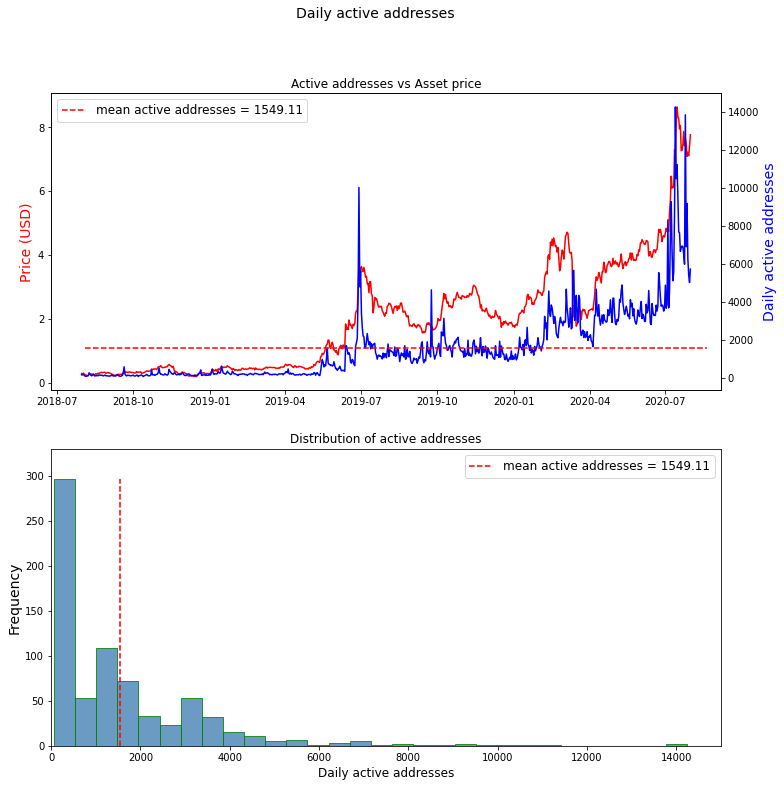

Source: Santiment


In [550]:
x = df_activity_day.index
y1 = df_activity_day['closePriceUsd']
y2 = df_activity_day['chainlink_daily_active_addresses']
mean_add = df_activity_day['chainlink_daily_active_addresses'].mean()



fig, (ax1, ax2) = plt.subplots(2, figsize=(12,12), sharex=False)

fig.suptitle('Daily active addresses', fontsize=14)


# First plot two y-axis
ax1.plot(x, y1, color="red")
ax1.set_ylabel("Price (USD)",color="red",fontsize=14)
ax1.set_title('Active addresses vs Asset price')

# make a plot with different y-axis using second axis object
ax12 = ax1.twinx()
ax12.plot(x, y2,color="blue")
ax12.set_ylabel("Daily active addresses",color="blue",fontsize=14)
ax12.axhline(y2.mean(), xmin=0.05,xmax=0.98,color='red',linestyle='dashed',label=f'mean active addresses = {mean_add.round(2)}')
ax12.legend(fontsize=12)

# Daily active address distribution
ax2.hist(y2, bins=30, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
ax2.axvline(y2.mean(), color='red',linestyle='dashed', ymax=0.9,label=f'mean active addresses = {mean_add.round(2)}')
ax2.set_ylabel("Frequency",fontsize=14)
ax2.set_xlabel("Daily active addresses",fontsize=12)
ax2.set_title('Distribution of active addresses')
ax2.set(xlim=(0, 15000), ylim=(0, 330))
ax2.legend(fontsize=12)

plt.show()

print('Source: Santiment')

#### New unique addresses

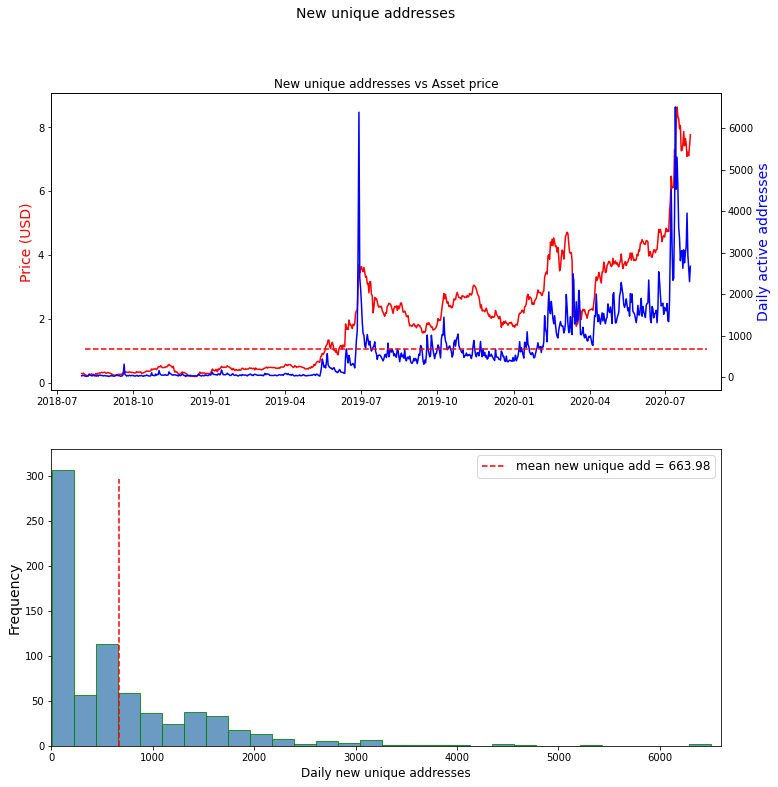

Sources: Santiment, glassnode


In [555]:
x = df_activity_day.index
y1 = df_activity_day['closePriceUsd']
y2 = df_activity_day['new_unique_add']
mean_add = df_activity_day['new_unique_add'].mean()
median_add = df_activity_day['new_unique_add'].median()

fig, (ax1, ax2) = plt.subplots(2, figsize=(12,12), sharex=False)

fig.suptitle('New unique addresses', fontsize=14)

# First plot two y-axis
ax1.plot(x, y1, color="red")
ax1.set_ylabel("Price (USD)",color="red",fontsize=14)
ax1.set_title('New unique addresses vs Asset price')

# make a plot with different y-axis using second axis object
ax12 = ax1.twinx()
ax12.plot(x, y2,color="blue")
ax12.set_ylabel("Daily active addresses",color="blue",fontsize=14)
ax12.axhline(y2.mean(), xmin=0.05,xmax=0.98,color='red',linestyle='dashed',label=f'mean active addresses = {mean_add.round(2)}')


# Daily active address distribution
ax2.hist(y2, bins=30, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
ax2.axvline(y2.mean(), color='red', linestyle='dashed',ymax=0.9,label=f'mean new unique add = {mean_add.round(2)}')
# ax2.axvline(y2.median(), color='green', ymax=0.9,label=f'median new unique add = {median_add.round(2)}')
ax2.set_ylabel("Frequency",fontsize=14)
ax2.set_xlabel("Daily new unique addresses",fontsize=12)
ax2.set(xlim=(0, 6600), ylim=(0, 330))
ax2.legend(fontsize=12)

plt.show()

print('Sources: Santiment, glassnode')

In [690]:
print(df_activity_day[['closePriceUsd','new_unique_add','chainlink_daily_active_addresses']].describe())
df_activity_day[['closePriceUsd','new_unique_add','chainlink_daily_active_addresses']].corr()

       closePriceUsd  new_unique_add  chainlink_daily_active_addresses
count         732.00          732.00                            732.00
mean            1.97          663.98                           1549.11
std             1.70          834.46                           1834.26
min             0.20           12.00                             63.00
25%             0.45           46.75                            186.00
50%             1.84          447.50                           1088.00
75%             2.78          976.75                           2143.75
max             8.64         6508.00                          14253.00


,closePriceUsd,new_unique_add,chainlink_daily_active_addresses
closePriceUsd,1.00,0.89,0.90
new_unique_add,0.89,1.00,0.97
chainlink_daily_active_addresses,0.90,0.97,1.00


<AxesSubplot:xlabel='new_unique_add', ylabel='chainlink_daily_active_addresses'>

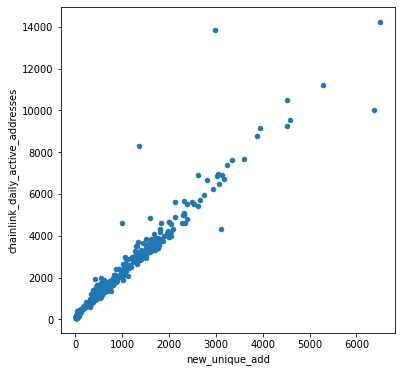

In [686]:
# Relationship active addresses and new unique addresses
df_activity_day.plot(kind='scatter', x='new_unique_add', y='chainlink_daily_active_addresses', figsize=(6,6))

#### Daily transaction volume (LINK)

In [569]:
df_activity_day['Transaction Volume'].describe()

count        732.00
mean     2500150.64
std      5077666.20
min        76304.00
25%       770125.75
50%      1537939.00
75%      2835870.25
max     98384409.00
Name: Transaction Volume, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (732,) and (0,)

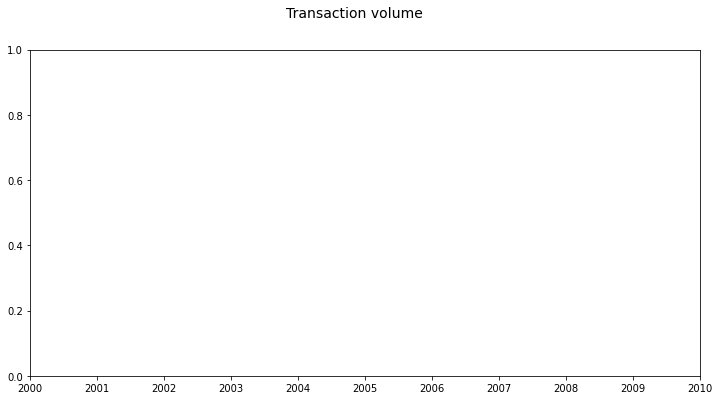

In [1233]:
x = df_activity_day.index
y1 = df_activity_day['closePriceUsd']
y2 = df_activity_day['Transaction Volume'].astype('int')
y3 = df_activity_day['Transaction Volume'].astype('int').mean()

fig, ax = plt.subplots(figsize=(12,6), sharex=False)

fig.suptitle('Transaction volume', fontsize=14)

# First plot two y-axis
ax.plot(x, y1, color="red")
ax.set_ylabel("Price (USD)",color="red",fontsize=14)
# ax.set_title('Transaction volume')

# make a plot with different y-axis using second axis object
ax12 = ax.twinx()
ax12.plot(x, y2,color="blue")
ax12.set_ylabel("Transaction volume (LINK)",color="black",fontsize=14)
ax12.axhline(y2.mean(), xmin=0.05,xmax=0.98,color='red',linestyle='dashed',label=f'mean tx vol = {y3.round(2)}')
ax12.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax12.legend(fontsize=12, loc="upper center")

# Daily active address distribution
ax2.hist(y2, bins=30, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
ax2.axvline(y2.mean(), color='red', linestyle='dashed',ymax=0.9,label=f'mean new unique add = {mean_add.round(2)}')
# ax2.axvline(y2.median(), color='green', ymax=0.9,label=f'median new unique add = {median_add.round(2)}')
ax2.set_ylabel("Frequency",fontsize=14)
ax2.set_xlabel("Daily new unique addresses",fontsize=12)
ax2.set(xlim=(0, 6600), ylim=(0, 330))
ax2.legend(fontsize=12)

plt.show()

print('Sources: Santiment')

Sources: Santiment


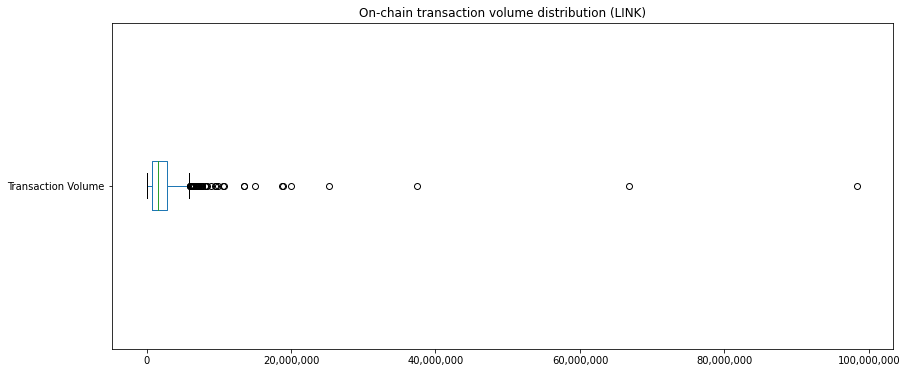

In [691]:
import matplotlib as mpl

y = df_activity_day['Transaction Volume']

ax = y.astype('float').plot(kind='box', vert=False, figsize=(14,6))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax2.axvline(y2.median(), color='green', ymax=0.9,label=f'median new unique add = {median_add.round(2)}')

ax.set_title('On-chain transaction volume distribution (LINK)')

print('Sources: Santiment')

In [685]:
# Boxplot data (q1,median,q3, outliers)
quantiles = df_activity_day['Transaction Volume'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(f'boxplot quantiles:\n \n{quantiles}\n')
print(df_activity_day['Transaction Volume'].describe())

# reference: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

boxplot quantiles:
 
0.01     172436.27
0.25     770125.75
0.50    1537939.00
0.75    2835870.25
0.99   14560675.13
Name: Transaction Volume, dtype: float64

count        732.00
mean     2500150.64
std      5077666.20
min        76304.00
25%       770125.75
50%      1537939.00
75%      2835870.25
max     98384409.00
Name: Transaction Volume, dtype: float64


In [665]:
# x = df_activity_day['Transaction Volume'].astype('int')
# y = df_activity_day['chainlink_daily_active_addresses']

# # THE ACTUAL PLOT
# plt.figure(figsize=(14, 6))

# # CORRELATION PLOT
# # 4 DIMENSIONS (X,Y, SIZE BUBBLE, COLLOR BUBBLE)

# plt.scatter(x, y, alpha=0.5, cmap='Spectral')
# plt.colorbar()

# plt.show()

### Token allocation/distribution

sources:
- coingecko
- santiment
- etherscan

data: 
- data
    - initial_supply    
    - current_token_supply
    - circulating supply 
    - market cap
    - daily_price
    - implied market cap (?)

### Token allocation

In [761]:
df_coininfo.index = df_coininfo.index.str.upper()

print('Key general information')
df_coininfo

Key general information


,value
variable,
ID,chainlink
TOTAL_SUPPLY,1000000000
CIRCULATING_SUPPLY,383509558
CURRENT_PRICE,16.71
MARKET_CAP,6416439649
MARKET_CAP_RANK,5
TOTAL_VOLUME,1807366792
ATH,19.83
ATL,0.15


Sources: Santiment


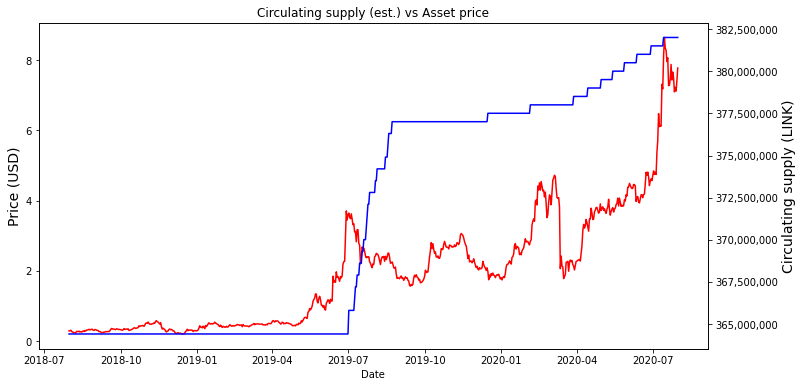

In [1113]:
x = df_activity_day.index
y2 = df_activity_day[['Circulating_supply']]
y1 = df_activity_day[['closePriceUsd']]

fig, ax= plt.subplots(figsize=(12,6), sharex=True)


# First plot two y-axis
ax.plot(x, y1, color="red")
ax.set_ylabel("Price (USD)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Circulating supply (est.) vs Asset price')

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="blue")
ax1.set_ylabel("Circulating supply (LINK)",fontsize=14)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax1.legend(fontsize=12)

print('Sources: Santiment')

### Asset price returns

- santiment. raw data:
    - daily_price
    - daily_price

Derived/Calculated variables from daily_price
- asset_price_return_1m
- asset_price_return_3m 
- asset_price_return_6m     
- asset_price_return_12m
- asset_price_return_24m

Other derived from daily_price:
- 200MA_asset_price (EMA)
- 50MA_asset_price (EMA)

**Asset returns**

In [1119]:
print('Sources: Santiment')

# Last 12M asset price close by month
df_activity_day[['closePriceUsd']].asfreq('M')['2019-07-31':'2020-07-31'].sort_index(ascending=False)

# Monthly asset return last 12m
monthly = df_activity_day[['closePriceUsd']].asfreq('M')['2019-07-31':'2020-07-31']
monthly

monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc.sort_index(ascending=False) 

# 12m cumulative return 
monthly_cr = (1 + monthly_pc).cumprod() * 100
print('Cumulative return 12M')
monthly_cr.sort_index(ascending=False)

# Delta in months
monthly_cr['Return months'] = ((monthly_cr.index - monthly_cr.index[0])/np.timedelta64(1, 'M')).astype('int')

# Subset of returns (months) 
list_months = ['2020-07-31','2019-10-31','2020-01-31','2020-04-30']
monthly_cr = monthly_cr[monthly_cr.index.isin(list_months)].sort_index(ascending=False)

monthly_cr = monthly_cr.rename(columns={'closePriceUsd':'Return %'})

monthly_cr.join(df_activity_day[['closePriceUsd','Circulating_supply']])



Sources: Santiment
Cumulative return 12M


,Return %,Return months,closePriceUsd,Circulating_supply
datetime,,,,
2020-07-31,353.82,12,7.77,382009560
2020-04-30,169.36,9,3.72,379509561
2020-01-31,128.54,6,2.82,377509561
2019-10-31,124.63,3,2.74,377009566


#### Price and moving avg

In [889]:
price_ema = df_activity_day[['openPriceUsd','closePriceUsd']]
price_ema['closePriceUsd_200MA'] = price_ema['closePriceUsd'].rolling(window=200, center=False).mean()
price_ema['closePriceUsd_50MA'] = price_ema['closePriceUsd'].rolling(window=50, center=False).mean()
price_ema.tail().sort_index(ascending=False)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,openPriceUsd,closePriceUsd,closePriceUsd_200MA,closePriceUsd_50MA
datetime,,,,
2020-07-31,7.42,7.77,4.03,5.91
2020-07-30,7.11,7.42,4.01,5.83
2020-07-29,7.22,7.12,3.98,5.77
2020-07-28,7.09,7.22,3.96,5.72
2020-07-27,7.47,7.10,3.93,5.66


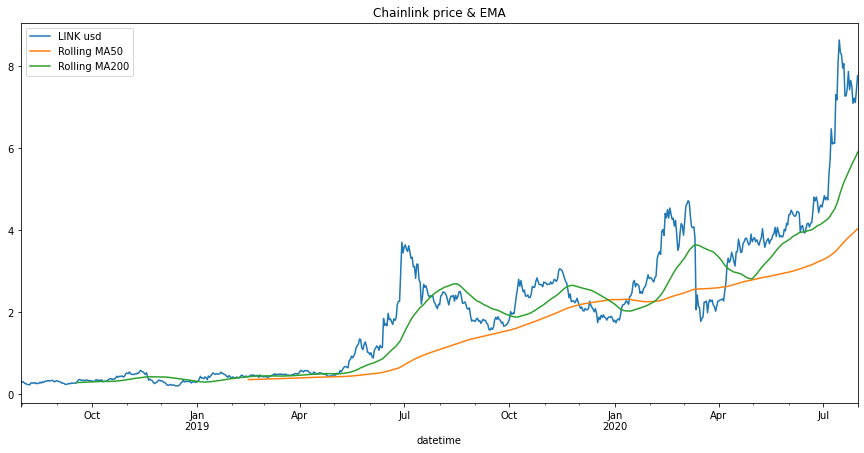

Sources: Santiment


In [1118]:
# Price and rolling MA
price_ema.closePriceUsd.plot(figsize=(15,7))
price_ema['closePriceUsd_200MA'].plot()
price_ema['closePriceUsd_50MA'] .plot()
plt.legend(['LINK usd','Rolling MA50','Rolling MA200'])
plt.title('Chainlink price & EMA')
plt.show()

print('Sources: Santiment')

#### Downside risk (from historical)

daily % change mean: closePriceUsd   0.01
dtype: float64


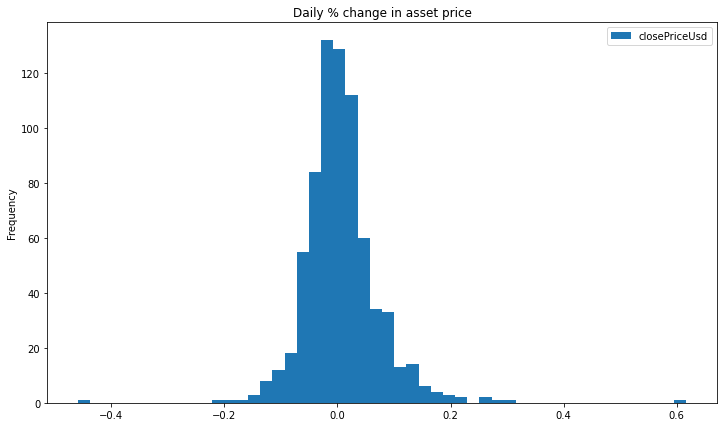

Sources: Santiment


In [1120]:
# % daily change in asset price distribution

values = df_activity_day[['closePriceUsd']].pct_change()

print(f'daily % change mean: {values.mean()}')

values.plot(kind='hist', bins=50, figsize=(12,7))
plt.legend()
plt.title('Daily % change in asset price',loc='center')
plt.show()

print('Sources: Santiment')

In [948]:
# Count episodes %change < 0
asset_change = df_activity_day[['closePriceUsd']]
asset_change['%change'] = asset_change['closePriceUsd'].pct_change()
asset_change.loc[asset_change['%change'] < -0.0].count()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


closePriceUsd    358
%change          358
dtype: int64

### Token ownership concentration (distribution)

sources: 
- etherscan
- santiment
- glassnode

data:
- https://etherscan.io/token/tokenholderchart/0x514910771af9ca656af840dff83e8264ecf986ca?range=100 > top 100 address token ownership
- https://academy.santiment.net/metrics/amount-in-top-holders/ > Token/Coin amount
- https://academy.santiment.net/sansheets/functions/#san_top_holders_percent_of_total_supply
- https://academy.santiment.net/metrics/top-holders/#top-holders-balance
- https://academy.santiment.net/metrics/mean-coin-age/mean-coin-age-technical/#total-age
    - holders_distribution_total > only paid plan
    - amount_in_top_holders
    - amount_in_exchange_top_holders
    - age_distribution

sansheets: 
- SAN_TOP_HOLDERS_PERCENT_OF_TOTAL_SUPPLY

data > glassnode:
- https://studio.glassnode.com/metrics?a=LINK&m=distribution.Balance1PctHolders
- https://studio.glassnode.com/metrics?a=LINK&m=distribution.Gini > gini coeff for LINK
    - Gini Coefficient
    - 1% Richlist Balance

Definition: 
- gini coeff: The gini coefficient for the distribution of coins over addresses. Exchange addresses, smart contract addresses, and other special asset-specific addresses (e.g. team fund addresses) are excluded for the computation of the gini.

articles:
- https://medium.com/glassnode-insights/on-chain-distribution-analysis-of-chainlink-link-5ee7acb62f62

In [955]:
df_activity_day.columns

Index(['openPriceUsd', 'closePriceUsd', 'highPriceUsd', 'lowPriceUsd',
       'volume', 'marketcap', 'chainlink_daily_active_addresses',
       'new_unique_add', 'real.vol', 'Price', 'Daily Active Deposits',
       'Transaction Volume', 'Amount held by top addresses',
       'Amount held by top exchange addresses',
       'Amount held by top non-exchange addresses', 'Age Consumed', 'Velocity',
       'Coin Supply on Exchanges',
       'Coin Supply on Exchanges (as % of total supply)',
       'Coin Supply outside of Exchanges', 'Exchange Inflow',
       'Exchange Outflow', 'Exchange Flow Balance', 'balance_0xe0362',
       'balance_0x75398', 'balance_0x5560d', 'balance_0xdad22',
       'balance_0xbe697', 'balance_0xf37c3', 'balance_nodeops', 'Total_supply',
       'Sum_treasury', 'Circulating_supply',
       'Amount held by top addresses (% total supply)',
       'Amount held by top addresses (% circulating supply )'],
      dtype='object')

#### Amount held top addresses: % of total supply and % circulating supply


Sources: Santiment


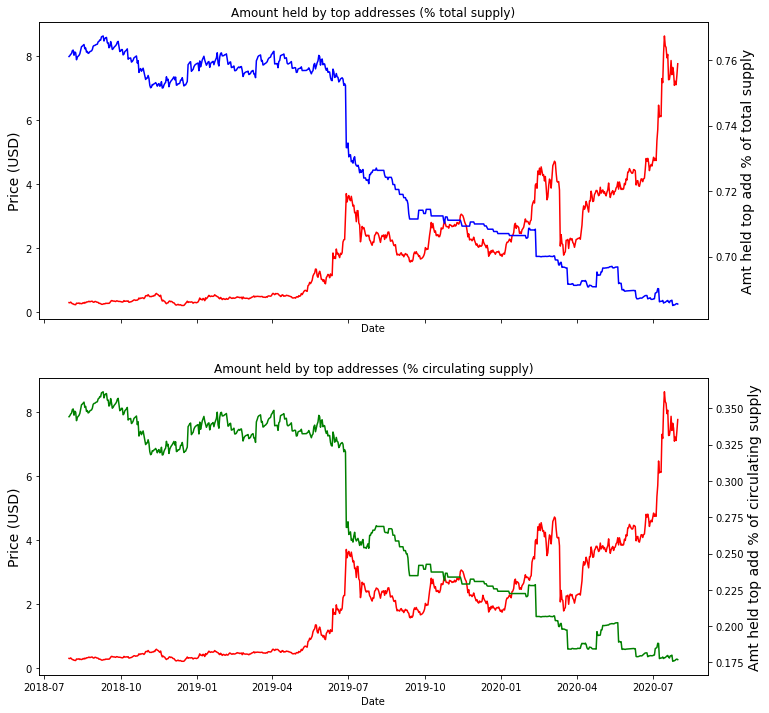

In [1121]:
# df_activity_day[['Amount held by top addresses','Amount held by top exchange addresses']].plot()
# # df_activity_day['Amount held by top addresses (% total supply)'].plot()

# # yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# 'Amount held by top addresses'
# 'Amount held by top addresses (% total supply)'

x = df_activity_day.index
y = df_activity_day[['closePriceUsd']]
y2 = df_activity_day[['Amount held by top addresses (% total supply)']]
y3 = df_activity_day[['Amount held by top addresses (% circulating supply )']]

# y4 = df_activity_day[['Amount held by top exchange addresses']]
# y5 = df_activity_day[['Amount held by top non-exchange addresses']]
       

fig, (ax,ax2) = plt.subplots(2,figsize=(12,12), sharex=True)

# First plot two y-axis
ax.plot(x, y, color="red")
ax.set_ylabel("Price (USD)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Amount held by top addresses (% total supply)')

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="blue")
# ax1.plot(x, y3,color="green")
ax1.set_ylabel("Amt held top add % of total supply",fontsize=14)
# ax1.legend(['% of total supply','% circulating supply'], loc='best')

# First plot two y-axis
ax2.plot(x, y, color="red")
ax2.set_ylabel("Price (USD)",fontsize=14)
ax2.set_xlabel("Date",fontsize=10)
ax2.set_title('Amount held by top addresses (% circulating supply)')

# make a plot with different y-axis using second axis object
ax21 = ax2.twinx()
ax21.plot(x, y3,color="green")
ax21.set_ylabel("Amt held top add % of circulating supply",fontsize=14)

# ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax1.legend(fontsize=12)

print('Sources: Santiment')

#### Amount held top addresses: exchanges vs non-exchange addresses

Both have been reducing over the two years. However in the last quarter top non-exchange addresses have been reacquiring tokens, while the share of tokens in exchanges have been reducing continuously. This reduction in exchange ownership could be one of the reasons behind the recent increase in asset prices. 

Sources: Santiment


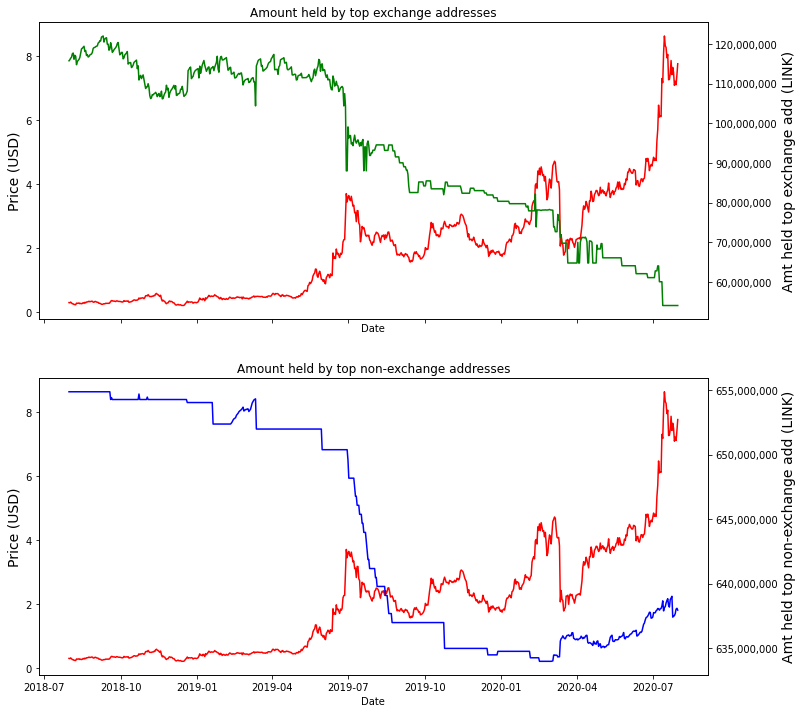

In [1122]:
x = df_activity_day.index
y = df_activity_day[['closePriceUsd']]
y4 = df_activity_day[['Amount held by top exchange addresses']]
y5 = df_activity_day[['Amount held by top non-exchange addresses']]
       
fig, (ax3,ax4) = plt.subplots(2,figsize=(12,12), sharex=True)


# First plot two y-axis
ax3.plot(x, y, color="red")
# ax3.plot(x, y5, color="red")
ax3.set_ylabel("Price (USD)",fontsize=14)
ax3.set_xlabel("Date",fontsize=10)
ax3.set_title('Amount held by top exchange addresses')

# make a plot with different y-axis using second axis object
ax31 = ax3.twinx()
ax31.plot(x, y4,color="green")
ax31.set_ylabel("Amt held top exchange add (LINK)",fontsize=14)
ax31.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# First plot two y-axis
ax4.plot(x, y, color="red")
ax4.set_ylabel("Price (USD)",fontsize=14)
ax4.set_xlabel("Date",fontsize=10)
ax4.set_title('Amount held by top non-exchange addresses')

# make a plot with different y-axis using second axis object
ax41 = ax4.twinx()
ax41.plot(x, y5,color="blue")
ax41.set_ylabel("Amt held top non-exchange add (LINK)",fontsize=14)
ax41.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

print('Sources: Santiment')

#### Token amount held by number of addresses

There is a significantly small number of addresses holding more than 1M tokens, 6 of which belong to the team treasury and node operators. Only 330 addresses hold 100K tokens or more. 

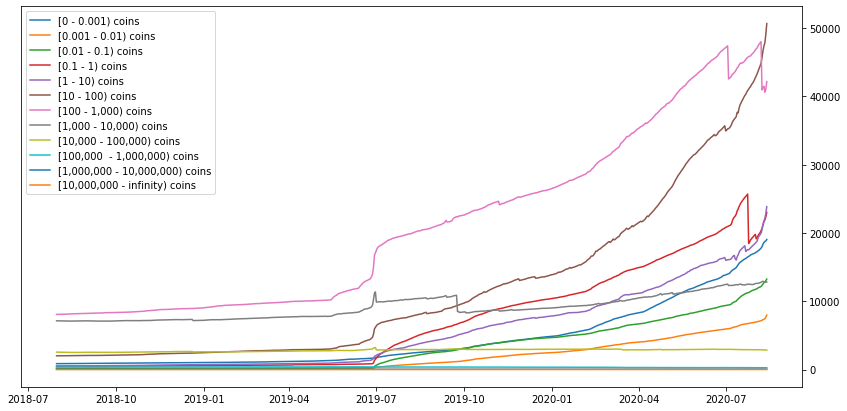

Sources: Glassnode


In [1123]:
# Distro addresses
y = df_distro_hold
h = 1000

f = plt.figure(figsize=(14,7))
ax = f.add_subplot(111)
ax.yaxis.tick_right()

plt.plot(y)
plt.legend(y)
plt.show()

print('Sources: Glassnode')

In [1125]:
df_distro_hold.tail(10).sort_index(ascending=True)

,[0 - 0.001) coins,[0.001 - 0.01) coins,[0.01 - 0.1) coins,[0.1 - 1) coins,[1 - 10) coins,[10 - 100) coins,"[100 - 1,000) coins","[1,000 - 10,000) coins","[10,000 - 100,000) coins","[100,000 - 1,000,000) coins","[1,000,000 - 10,000,000) coins","[10,000,000 - infinity) coins"
Date,,,,,,,,,,,,
2020-08-10 00:00:00+00:00,18590.00,7376.00,12698.00,21634.00,21724.00,47369.00,41482.00,12879.00,2870.00,273.00,49.00,8.00
2020-08-11 00:00:00+00:00,18763.00,7441.00,12822.00,21907.00,22130.00,47829.00,40601.00,12824.00,2860.00,272.00,50.00,8.00
2020-08-12 00:00:00+00:00,18826.00,7676.00,13005.00,22357.00,22808.00,49058.00,41036.00,12781.00,2862.00,273.00,48.00,8.00
2020-08-13 00:00:00+00:00,19048.00,7975.00,13251.00,23008.00,23852.00,50657.00,42157.00,12828.00,2863.00,270.00,49.00,9.00
2020-08-14 00:00:00+00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-08-15 00:00:00+00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-08-16 00:00:00+00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-08-17 00:00:00+00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-08-18 00:00:00+00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


#### Gini coefficient 

Puzzling. Despite the team frequent offload of tokens in the market, the gini has been increasing. Sign that already existing big buyers acquiring the tokens in the market. 

Note however that this type of high gini coefficient is not particularly uncommon in many crypto projects. 

In [1064]:
# Set gini in same date format
df_gini2 = df_activity_day[['closePriceUsd','Sum_treasury','Total_supply']].join(df_ginicoeff.tz_localize(None))
df_gini2

Sources: Glassnode


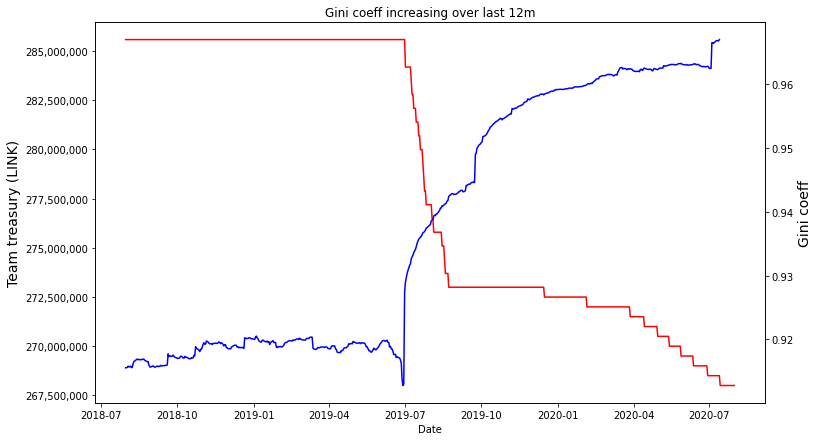

In [1124]:
x = df_activity_day.index
y = df_gini2[['Sum_treasury']]
y2 = df_gini2[['gini_coef']]

fig, ax = plt.subplots(figsize=(12,7), sharex=True)

# First plot two y-axis
ax.plot(x, y, color="red")
ax.set_ylabel("Team treasury (LINK)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Gini coeff increasing over last 12m')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="blue")
# ax1.plot(x, y3,color="green")
ax1.set_ylabel("Gini coeff",fontsize=14)

print('Sources: Glassnode')

In [974]:
# df_activity_day[['Amount held by top addresses']]
df_activity_day[['Amount held by top addresses (% total supply)','Amount held by top addresses']]

,Amount held by top addresses (% total supply),Amount held by top addresses
datetime,,
2018-07-31,0.76,761042408
2018-08-01,0.76,761301198
2018-08-02,0.76,761712807
2018-08-03,0.76,761931141
2018-08-04,0.76,762821941
...,...,...
2020-07-27,0.69,685301097
2020-07-28,0.69,685436951
2020-07-29,0.69,685648493


### Treasury funds data?
sources: 
- santiment
- coindesk
- coingecko

team addresses:

data:
- team address?
- https://academy.santiment.net/sansheets/functions/#san_historical_balance
    - historical_balance

ICO distribution: 30 team/35 nodes/35 investors
- https://etherscan.io/token/0x514910771af9ca656af840dff83e8264ecf986ca?a=0xf55037738604fddfc4043d12f25124e94d7d1780 > describes ICO distribution

In [1192]:
df_tr2 = df_activity_day[['openPriceUsd']].join(df_treasury_day).dropna()

Sources: Santiment


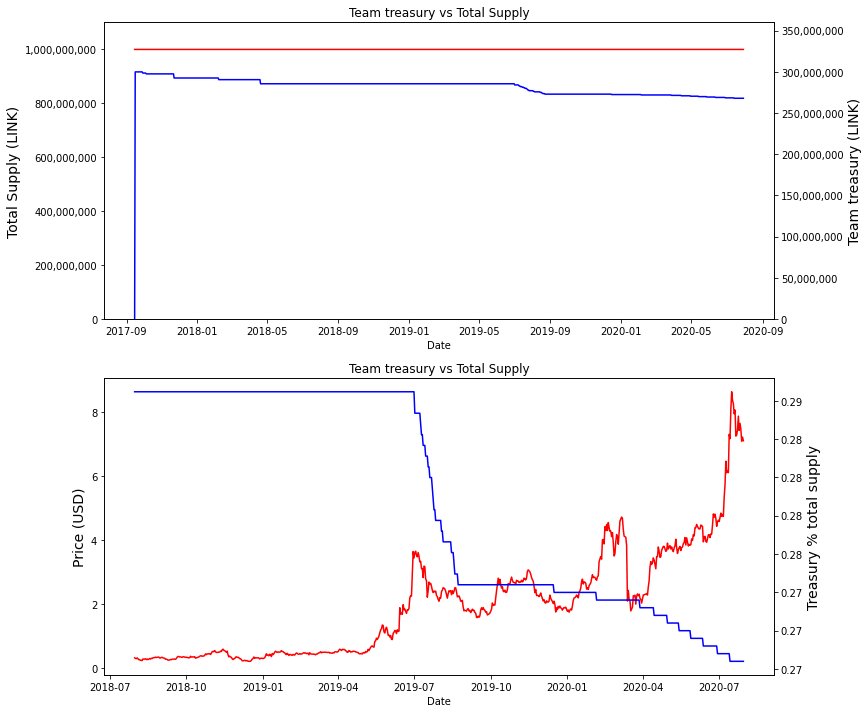

In [1214]:
# df_treasury_day[['Total_supply', 'Sum_treasury']].plot()

x = df_treasury_day.index
x1 = df_tr2.index
y = df_treasury_day[['Total_supply']]
y2 = df_treasury_day[['Sum_treasury']]
y3 = df_treasury_day[['balance_nodeops']]

y4 = df_tr2[['openPriceUsd']]
y5 = df_tr2[['Treasury (% of total supply)']]

fig, (ax,ax2) = plt.subplots(2,figsize=(12,12), sharex=False)

# First plot two y-axis
ax.plot(x, y, color="red")
ax.set_ylabel("Total Supply (LINK)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Team treasury vs Total Supply')
ax.set_ylim([0,1100000000])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="blue")
# ax1.plot(x, y3,color="green")
ax1.set_ylim([0,360000000])
ax1.set_ylabel("Team treasury (LINK)",fontsize=14)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# First plot two y-axis
ax2.plot(x1, y4, color="red")
ax2.set_ylabel("Price (USD)",fontsize=14)
ax2.set_xlabel("Date",fontsize=10)
ax2.set_title('Team treasury vs Total Supply')
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax3 = ax2.twinx()
ax3.plot(x1, y5,color="blue")
ax3.set_ylabel("Treasury % total supply",fontsize=14)
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))

print('Sources: Santiment')

### Token velocity and inertia (age consumed)

sources: 
- santiment

Data:
- age_consumed > Spikes are signal of a large amount of tokens moving after being idle
- velocity > Higher token velocity means that a single token is used more often in daily transactions.
- mean_age > not used now

Definitions: 
- Velocity: Shows the average number of times that a single LINK token changes addresses daily. Higher token velocity means that a single token is used more often in daily transactions.
- Age consumed: Tracks the movement of previously idle LINK tokens. The metric shows the amount of LINK changing addresses daily multiplied by the number of days since they last moved. Spikes indicate a significant amount of previously idle LINK tokens moving between addresses.

In [1216]:
df_activity_day.columns

Index(['openPriceUsd', 'closePriceUsd', 'highPriceUsd', 'lowPriceUsd',
       'volume', 'marketcap', 'chainlink_daily_active_addresses',
       'new_unique_add', 'real.vol', 'Price', 'Daily Active Deposits',
       'Transaction Volume', 'Amount held by top addresses',
       'Amount held by top exchange addresses',
       'Amount held by top non-exchange addresses', 'Age Consumed', 'Velocity',
       'Coin Supply on Exchanges',
       'Coin Supply on Exchanges (as % of total supply)',
       'Coin Supply outside of Exchanges', 'Exchange Inflow',
       'Exchange Outflow', 'Exchange Flow Balance', 'balance_0xe0362',
       'balance_0x75398', 'balance_0x5560d', 'balance_0xdad22',
       'balance_0xbe697', 'balance_0xf37c3', 'balance_nodeops', 'Total_supply',
       'Sum_treasury', 'Circulating_supply',
       'Amount held by top addresses (% total supply)',
       'Amount held by top addresses (% circulating supply )'],
      dtype='object')

#### Token Velocity

Sources: Santiment


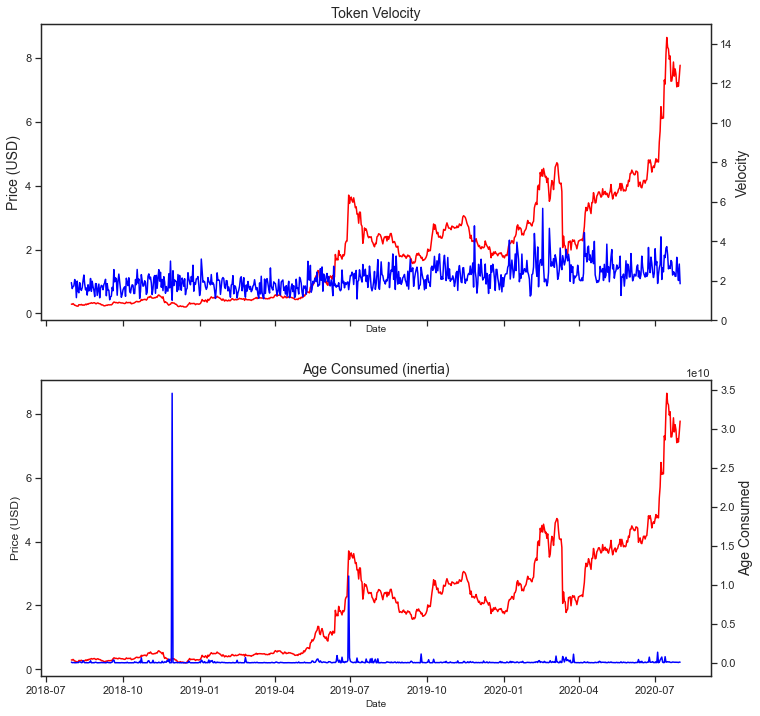

In [1532]:
x = df_activity_day.index

y = df_activity_day[['closePriceUsd']]
y2 = df_activity_day[['Velocity']]
y3 = df_activity_day[['Age Consumed']]
mean_vel = df_activity_day[['Velocity']].mean()


fig, (ax,ax2) = plt.subplots(2,figsize=(12,12), sharex=True)

# First plot two y-axis
ax.plot(x, y, color="red")
ax.set_ylabel("Price (USD)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Token Velocity',fontsize=14)
# ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="blue")
ax1.set_ylim([0,15])
ax1.set_ylabel("Velocity",fontsize=14)
# ax1.axhline(mean_vel, xmin=0.05,xmax=0.98,color='red',linestyle='dashed',label=f'mean active addresses = {mean_vel.round(2)}')

# ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# First plot two y-axis
ax2.plot(x, y, color="red")
ax2.set_ylabel("Price (USD)",fontsize=12)
ax2.set_xlabel("Date",fontsize=10)
ax2.set_title('Age Consumed (inertia)',fontsize=14)
# ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax3 = ax2.twinx()
ax3.plot(x, y3,color="blue")
ax3.set_ylabel("Age Consumed",fontsize=14)
# ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))

print('Sources: Santiment')

In [1260]:
df_activity_day[['Age Consumed','Velocity']].describe()

,Age Consumed,Velocity
count,732.00,732.00
mean,142189138.68,2.17
std,1346027887.21,0.61
min,218625.00,1.02
25%,13145260.50,1.75
50%,32054984.00,2.09
75%,80759463.75,2.48
max,34576212284.00,5.67


<AxesSubplot:xlabel='Age Consumed', ylabel='openPriceUsd'>

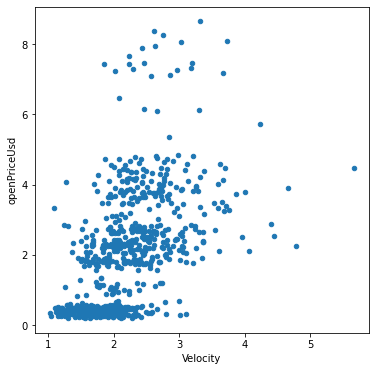

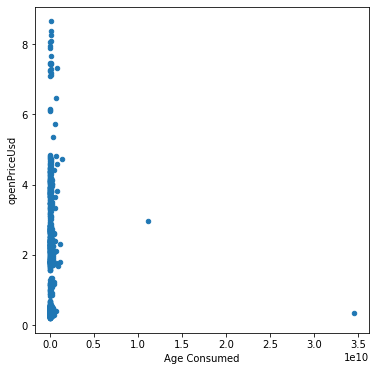

In [1258]:
# Relationship velocity/age consumed and price

df_activity_day.plot(kind='scatter', x='Velocity', y='openPriceUsd', figsize=(6,6))

df_activity_day.plot(kind='scatter', x='Age Consumed', y='openPriceUsd', figsize=(6,6))

## Exchanges 

- https://academy.santiment.net/sansheets/functions/#san_exchange_balance
- https://academy.santiment.net/sansheets/functions/#san_exchange_funds_flow
- https://academy.santiment.net/sansheets/functions/#san_exchange_inflow
- https://academy.santiment.net/sansheets/functions/#san_exchange_outflow 
- https://academy.santiment.net/metrics/supply-on-or-outside-exchanges/#measuring-unit

Note : on-chain metrics
- Liquidity
    - percent_of_total_supply_on_exchanges
    - supply_on_exchanges
    - supply_outside_exchanges
    
- Flows:
    - exchange_inflow   
    - exchange_outflow
    - exchange_balance

> Do flows correlate to pricing activity?

**Exchanges** - list exchanges / centralised exchanges / list exchanges tokens listed / trading real volume (global) / tokens on exchanges / exchange volume by pair / token velocity (again?)

In [ ]:
# Static data

# List exchanges tokens listed + pairs + last volume reported
df_markets_coin = get_markets_bycoin('chainlink')
df_highestpairs = get_toppairs_vol('LINK', limit=10) # not sure if relevant
df_highestpairs.sort_values(by='volume24h', ascending=False)

# calculate share of vol by exchange (all pairs)
# calculate share of vol by trading pair

# Timeseries

# CEX data 
df_link_cexvol_day
# DEX data
df_link_dexvol_day

# CEX balance --> glassnode
df_balexch_total.tz_localize(None) 
df_balexch_byexch

### Supply on exchanges

In [1262]:
df_activity_day.columns

Index(['openPriceUsd', 'closePriceUsd', 'highPriceUsd', 'lowPriceUsd',
       'volume', 'marketcap', 'chainlink_daily_active_addresses',
       'new_unique_add', 'real.vol', 'Price', 'Daily Active Deposits',
       'Transaction Volume', 'Amount held by top addresses',
       'Amount held by top exchange addresses',
       'Amount held by top non-exchange addresses', 'Age Consumed', 'Velocity',
       'Coin Supply on Exchanges',
       'Coin Supply on Exchanges (as % of total supply)',
       'Coin Supply outside of Exchanges', 'Exchange Inflow',
       'Exchange Outflow', 'Exchange Flow Balance', 'balance_0xe0362',
       'balance_0x75398', 'balance_0x5560d', 'balance_0xdad22',
       'balance_0xbe697', 'balance_0xf37c3', 'balance_nodeops', 'Total_supply',
       'Sum_treasury', 'Circulating_supply',
       'Amount held by top addresses (% total supply)',
       'Amount held by top addresses (% circulating supply )'],
      dtype='object')

Sources: Santiment


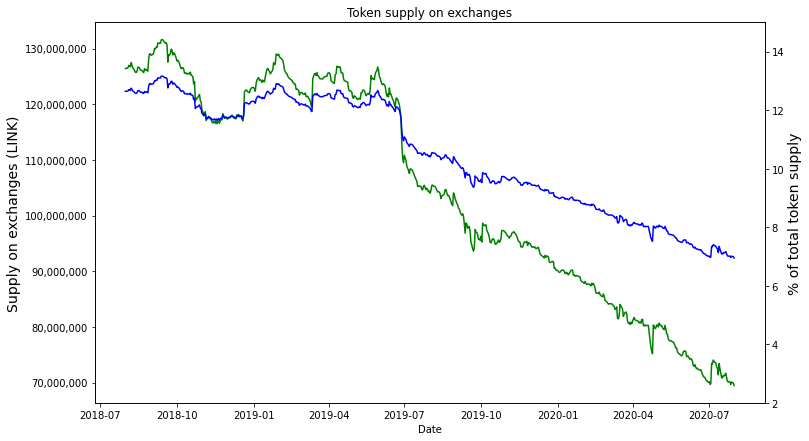

In [1307]:
x = df_activity_day.index
y = df_activity_day[['Coin Supply on Exchanges']]
y2 = df_activity_day[['Coin Supply on Exchanges (as % of total supply)']]

fig, ax = plt.subplots(figsize=(12,7), sharex=True)

# First plot two y-axis
ax.plot(x, y, color="green")
ax.set_ylabel("Supply on exchanges (LINK)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Token supply on exchanges')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="blue")
ax1.set_ylabel("% of total token supply",fontsize=14)
ax1.set_ylim(2,15)

print('Sources: Santiment')

Correlation % coins on exchanges and asset price (negative correlation)

In [1280]:
df_activity_day[['closePriceUsd', 'Coin Supply on Exchanges (as % of total supply)','Coin Supply on Exchanges']].corr()

,closePriceUsd,Coin Supply on Exchanges (as % of total supply),Coin Supply on Exchanges
closePriceUsd,1.00,-0.88,-0.88
Coin Supply on Exchanges (as % of total supply),-0.88,1.00,1.00
Coin Supply on Exchanges,-0.88,1.00,1.00


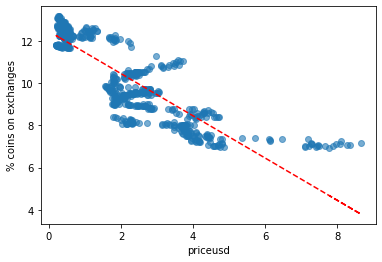

polynomial coeff: [-0.99961486 12.44690592]


In [1303]:
import numpy as np

x = df_activity_day['closePriceUsd'] 
y = df_activity_day['Coin Supply on Exchanges (as % of total supply)']

plt.scatter(x, y, alpha=0.6)
plt.xlabel('priceusd')
plt.ylabel('% coins on exchanges')

# plot trendline/regression fit line of variable relationship
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

# polynomial fit
# returns the polynomial coefficients that minimize the square error 
fit = np.polyfit(x,y,1)
print(f'polynomial coeff: {fit}')

**Note:**

As circulating tokens were increasing (with treasury dumping tokens into the market), supply on exchanges was decreased as % of total. This seems to indicate a purchasing and hold behaviour on the part of large and smaller holders. Gini and other indicators shown above point towards a proportionally large accumulation by larger holders. 

[Placeholder]
This trend of reduced supply/liquidity on exchanges also seem to corroborate with the increased asset price trend.    

Sources: Santiment


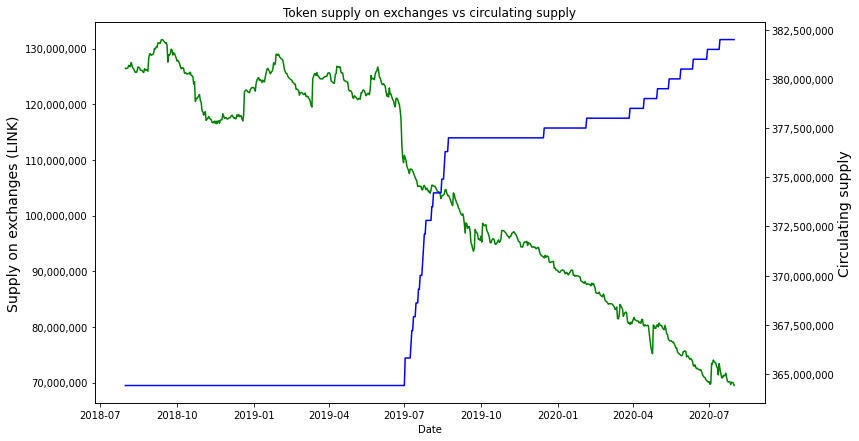

In [1312]:
x = df_activity_day.index
y = df_activity_day[['Coin Supply on Exchanges']]
y2 = df_activity_day[['Circulating_supply']]

fig, ax = plt.subplots(figsize=(12,7), sharex=True)

# First plot two y-axis
ax.plot(x, y, color="green")
ax.set_ylabel("Supply on exchanges (LINK)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Token supply on exchanges vs circulating supply')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="blue")
ax1.set_ylabel("Circulating supply",fontsize=14)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax1.set_ylim(2,15)

print('Sources: Santiment')

### Centralised exchanges 

- list exchanges where token listed
- trading volume on **real exchanges** only (see messari definition)

**List exchanges, pair, volumes**
- exchange_name
- trading_pair e.g. LINK/USD 
- trading_volume

**Tokens on exchanges**
- daily_exchange_balance_all (of token)
- daily_exchange_balance_stacked (of token by exchange)
- percent_of_total_supply_on_exchanges

derived:
- Derived metrics:
    - percent_of_circulating_supply_on_exchanges > calc: supply_on_exchanges / circulating_supply

Note: only addresses known to belong to exchanges

**Trading: on-chain** 
- https://academy.santiment.net/sansheets/functions/#san_transaction_volume
    - daily_transaction_volume (in token) > on-chain transaction volume

**Trading: exchange (volume by pair: USD/USDC/BTC/ETH)**
- https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistoday
- https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistohour
    - daily-trading_volume_by_exchange (and token pair)
    - hourly-trading_volume_by_exchange (and token pair)
- Derived metric:
    - Rolling 30d avg volume > calc: 

In [ ]:
# Timeseries

# CEX data 
df_link_cexvol_day
# DEX data
df_link_dexvol_day

# CEX balance --> glassnode
df_balexch_total.tz_localize(None) 
df_balexch_byexch

### List exchanges

In [1342]:
# df_balexch_total.head()
# duplicate information

In [1350]:
df_markets_coin['market.name'].unique()

array(['Binance', 'Coinbase Pro', 'BKEX', 'OKEx', 'Bithumb', 'Kraken',
       'BtcTurk PRO', 'Upbit', 'Gemini', 'Bilaxy', 'MXC', 'Binance US',
       'BitMax', 'Paribu', 'Phemex', 'FTX', 'CoinTiger', 'HitBTC', 'VB',
       'Tokenize', 'Uniswap (v2)', 'Bittrex', 'BiKi', 'OKEx Korea',
       'BTCMarkets', 'Gate.io', 'XT', 'LBank', 'Hotbit', 'Oceanex',
       'BitMart', 'Indodax', 'Bitforex', 'CEX.IO', 'AEX', 'LATOKEN',
       'Poloniex', 'Decoin', 'ProBit', 'Nominex', 'AAX', 'dex.blue',
       'WhiteBIT', 'Independent Reserve', 'Balancer', 'NovaDAX',
       'Atomars', 'AlterDice', 'Catex', 'BitBay'], dtype=object)

#### List exchanges

In [1414]:
exchange_list = ['Binance', 'Coinbase Pro', 'Kraken', 'Gemini', 'Binance US','Bittrex', 'Poloniex']

df = df_markets_coin[['coin_id','base','market.name','volume']].loc[df_markets_coin['market.name'].isin (exchange_list)].sort_values(by=['market.name','volume'], ascending=False).set_index('coin_id')

# Sum by exchange volume (snapshot)
df = pd.DataFrame(df.groupby(['coin_id','base','market.name'])['volume'].agg('sum').sort_values(ascending=False))
df['volume %'] = df['volume'] / df['volume'].sum() * 100
print('Source: Coingecko, Messari')
print('\nAggregated exchange volume (snapshot). Note: See Messari "Real volume"')
df

Source: Coingecko, Messari

Aggregated exchange volume (snapshot). Note: See Messari "Real volume"


volume  volume %
coin_id   base market.name                     
chainlink LINK Binance       24180496     73.59
               Coinbase Pro   6324128     19.25
               Kraken         1646595      5.01
               Binance US      378586      1.15
               Gemini          158737      0.48
               Bittrex         146198      0.44
               Poloniex         25125      0.08

#### List exchange pairs

In [1426]:
exchange_list = ['Binance', 'Coinbase Pro', 'Kraken', 'Gemini', 'Binance US','Bittrex', 'Poloniex']

# Trading pairs share in exchanges
df = df_markets_coin.loc[df_markets_coin['market.name'].isin (exchange_list)].sort_values(by=['market.name'], ascending=True).set_index('coin_id')
df['volume %'] = df['volume'] / df['volume'].sum() * 100
df = df.drop(columns=['trust_score'])
print('Source: Coingecko, Messari')
print('\nExchange pairs traded and volumes (snapshot)')
df

Source: Coingecko, Messari

Exchange pairs traded and volumes (snapshot)


,base,target,market.name,volume,volume %
coin_id,,,,,
chainlink,LINK,USDT,Binance,17074183,51.96
chainlink,LINK,BTC,Binance,6089910,18.53
chainlink,LINK,TUSD,Binance,65866,0.20
chainlink,LINK,ETH,Binance,483011,1.47
chainlink,LINK,BUSD,Binance,324180,0.99
chainlink,LINK,USDC,Binance,143346,0.44
chainlink,LINK,USD,Binance US,378586,1.15
chainlink,LINK,USDT,Bittrex,21975,0.07
chainlink,LINK,USD,Bittrex,66464,0.20


Removed below not relevant

In [1425]:
# List exchanges tokens listed + pairs + last volume reported
# df_markets_coin
# df_highestpairs # not sure if relevant
# df_highestpairs.sort_values(by='volume24h', ascending=False)

# calculate share of vol by exchange (all pairs)
# calculate share of vol by trading pair

### Trading CEX: tokens on exchanges

In [1429]:
df_balexch_byexch.columns

Index(['balances__bigone', 'balances__binance', 'balances__okex',
       'balances__huobi', 'balances__gate.io', 'balances__kucoin',
       'balances__coinex', 'balances__hitbtc', 'balances__bibox',
       'balances__bithumb', 'balances__bittrex', 'balances__kraken',
       'balances__poloniex', 'balances__gemini'],
      dtype='object')

Tokens on exchanges. 

definition: The total amount of coins held on exchange addresses.

Note: data for coinbase pro not included in chart

Source: Glassnode


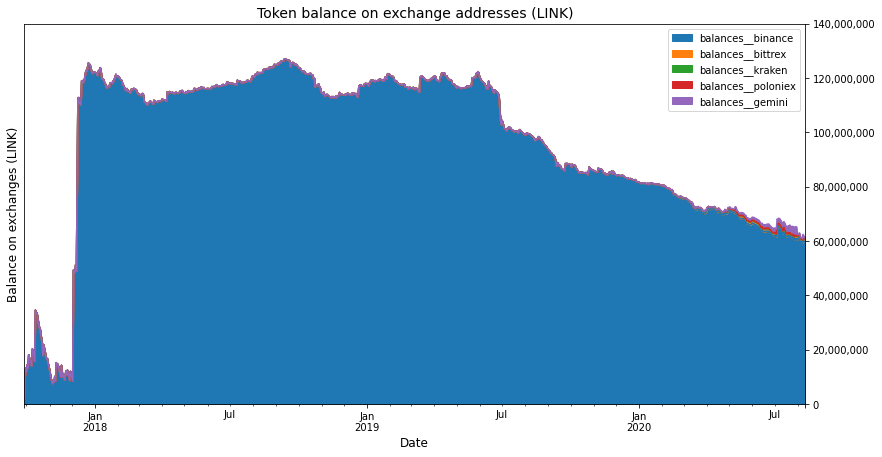

In [1461]:
# Subset of exchange (real volume)
exchange_list = ['balances__binance', 'balances__bittrex', 'balances__kraken','balances__poloniex', 'balances__gemini']
exchange_list

# Stacked balances on exchanges
df = df_balexch_byexch[exchange_list]
ax = df.plot.area(ylim=(0,140000000), figsize=(14,7))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.tick_right()
ax.set_title('Token balance on exchange addresses (LINK)',fontsize=14)
ax.set_xlabel('Date',fontsize=12)
ax.set_ylabel('Balance on exchanges (LINK)',fontsize=12)

print('Source: Glassnode')

# print('\nThe total amount of coins held on exchange addresses.')

In [1477]:
# import seaborn as sns; sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(df_balexch_byexch[exchange_list], palette="husl")

### Trading: CEX volumes

In [1530]:
df_link_cexvol_day[['Sum_volfrom_Link_allcex','closePriceUsd']].corr()

,Sum_volfrom_Link_allcex,closePriceUsd
Sum_volfrom_Link_allcex,1.00,0.23
closePriceUsd,0.23,1.00


Source: Cryptocompare


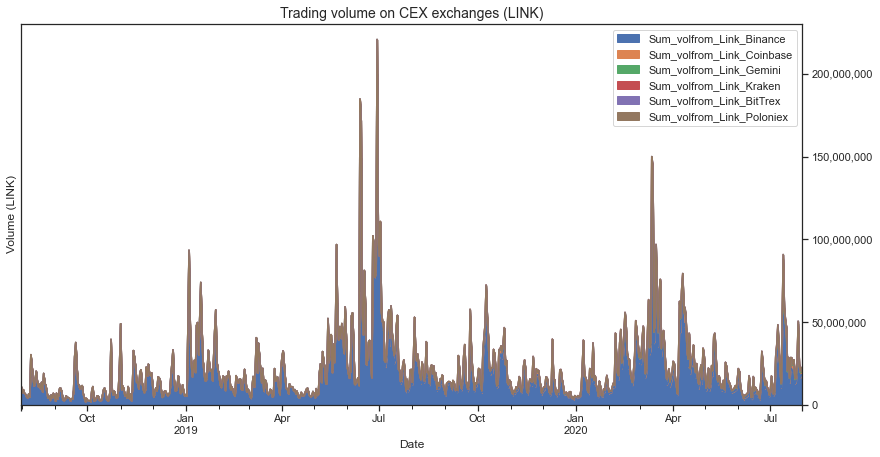

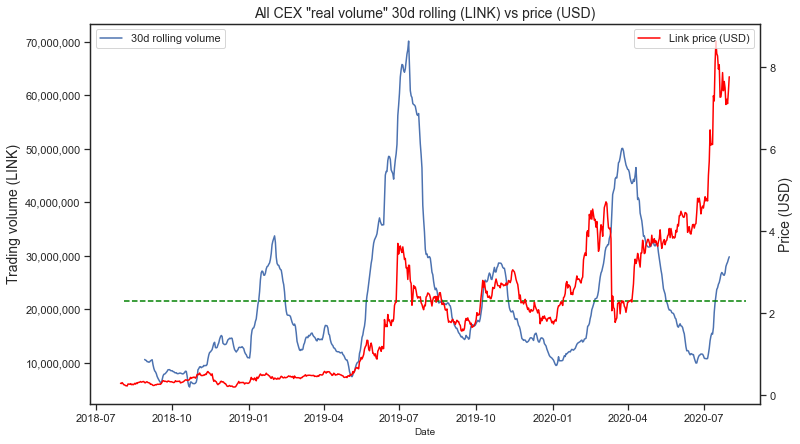

In [1579]:
exchange_vol = ['Sum_volfrom_Link_Binance', 'Sum_volfrom_Link_Coinbase','Sum_volfrom_Link_Gemini', 'Sum_volfrom_Link_Kraken','Sum_volfrom_Link_BitTrex', 'Sum_volfrom_Link_Poloniex']

df = df_link_cexvol_day[exchange_vol]
ax = df.plot.area(ylim=(0,230000000), figsize=(14,7))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.tick_right()
ax.set_title('Trading volume on CEX exchanges (LINK)',fontsize=14)
ax.set_xlabel('Date',fontsize=12)
ax.set_ylabel('Volume (LINK)',fontsize=12)

# SECOND PLOT
x = df_link_cexvol_day.index
y = df_link_cexvol_day['Sum_volfrom_Link_allcex'].rolling(window=30, center=False).mean() 
y2 = df_link_cexvol_day['closePriceUsd']
  

fig, ax = plt.subplots(figsize=(12,7), sharex=True)

# First plot two y-axis

ax.plot(x,y)
ax.set_ylabel("Trading volume (LINK)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('All CEX "real volume" 30d rolling (LINK) vs price (USD)',fontsize=14)
ax.axhline(y.mean(), xmin=0.05,xmax=0.98,color='green',linestyle='dashed')
ax.legend(['30d rolling volume'],loc='upper left')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="red")
ax1.set_ylabel("Price (USD)",fontsize=14)
ax1.legend(['Link price (USD)'],loc='upper right')

print('Source: Cryptocompare')

### Trading: DEX & Liquidity pool Volumes

Pools:
- https://uniswap.info/token/0x514910771af9ca656af840dff83e8264ecf986ca
    - Transaction_volume 24h (usd)
    - Transaction_count 24h
    - Total_liquidity

0x:
- https://api.0xtracker.com/tokens/:address
    - tradeCount	
    - tradeVolume.USD	
    - tradeVolume.token

#### Trading: CEX vs DEX volume

Sources: Cryptocompare, 0xtracker, Bancor


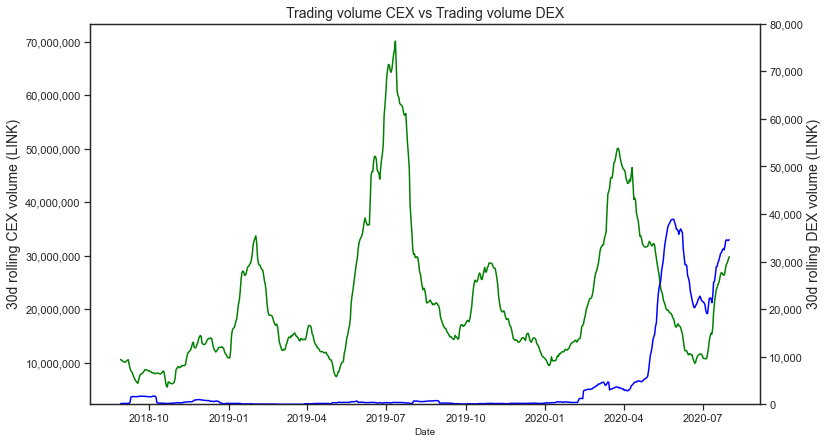

In [1555]:
x = df_link_dexvol_day.index
y = df_link_cexvol_day['Sum_volfrom_Link_allcex'].rolling(window=30, center=False).mean() 
y2 = df_link_dexvol_day['Sum_volfrom_Link_dex'].rolling(window=30, center=False).mean() 


# x = df_activity_day.index
# y = df_activity_day[['Coin Supply on Exchanges']]
# y2 = df_activity_day[['Circulating_supply']]

fig, ax = plt.subplots(figsize=(12,7), sharex=True)

# First plot two y-axis
ax.plot(x, y, color="green")
ax.set_ylabel("30d rolling CEX volume (LINK)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Trading volume CEX vs Trading volume DEX', fontsize=14)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="blue")
ax1.set_ylabel("30d rolling DEX volume (LINK)",fontsize=14)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_ylim(0,80000)

print('Sources: Cryptocompare, 0xtracker, Bancor')

#### Trading: DEX vs CEX volume distribution 

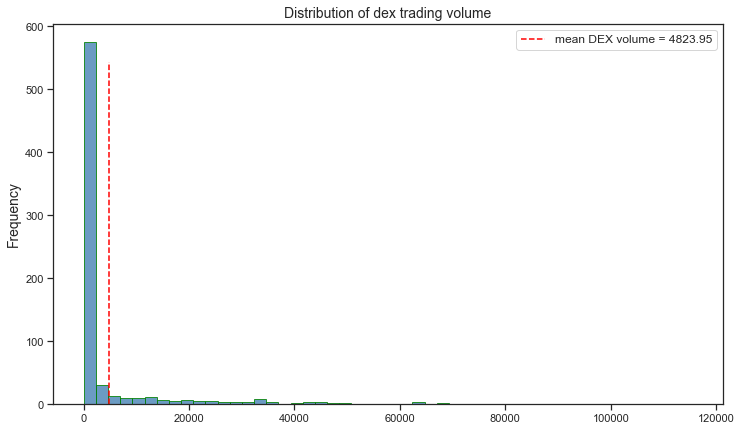

Sources: Cryptocompare, 0xtracker, Bancor



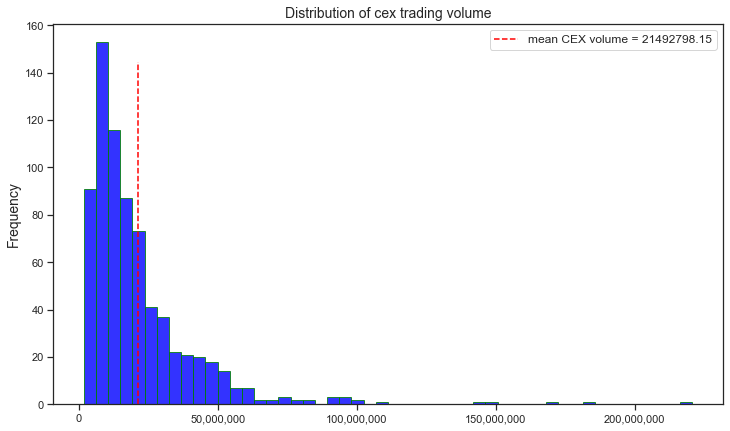

Sources: Cryptocompare


In [1583]:
# DEX volume distribution

fig, ax2 = plt.subplots(figsize=(12,7), sharex=True)

x = df_link_dexvol_day.index
y2 = df_link_dexvol_day['Sum_volfrom_Link_dex']

ax2.hist(y2, bins=50, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
ax2.axvline(y2.mean(), color='red', linestyle='dashed',ymax=0.9,label=f'mean DEX volume = {y2.mean().round(2)}')
# ax2.axvline(y2.median(), color='green', ymax=0.9,label=f'median new unique add = {median_add.round(2)}')
ax2.set_ylabel("Frequency",fontsize=14)
ax2.set_title("Distribution of dex trading volume",fontsize=14)
# ax2.set(xlim=(0, 100000), ylim=(0, 600))
ax2.legend(fontsize=12)

plt.show()

print('Sources: Cryptocompare, 0xtracker, Bancor\n')

# CEX volume distribution

fig, ax1 = plt.subplots(figsize=(12,7), sharex=True)

x = df_link_cexvol_day.index
y2 = df_link_cexvol_day['Sum_volfrom_Link_allcex']

ax1.hist(y2, bins=50, alpha=0.8,
          histtype='bar', color='blue',
          edgecolor='green')
ax1.axvline(y2.mean(), color='red', linestyle='dashed',ymax=0.9,label=f'mean CEX volume = {y2.mean().round(2)}')
ax1.set_ylabel("Frequency",fontsize=14)
ax1.set_title("Distribution of cex trading volume",fontsize=14)
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.legend(fontsize=12)

plt.show()

print('Sources: Cryptocompare')

In [1488]:
df_link_cexvol_day.describe()

,openPriceUsd,closePriceUsd,highPriceUsd,lowPriceUsd,volumefrom_LINK_Binance,volumeto_BTC_Binance,volumefrom_LINK_Binance_1,volumeto_BTC_Binance_1,volumefrom_LINK_Binance_2,volumeto_ETH_Binance,...,Sum_volfrom_Link_Coinbase_usd,Sum_volfrom_Link_Gemini_usd,Sum_volfrom_Link_Kraken_usd,Sum_volfrom_Link_BitTrex_usd,Sum_volfrom_Link_Poloniex_usd,Sum_volfrom_Link_uniswap_usd,Sum_volfrom_Link_all,Sum_volfrom_Link_allcex,Sum_volfrom_Link_all_usd,Sum_volfrom_Link_allcex_usd
count,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,...,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00,732.00
mean,1.96,1.97,2.05,1.89,6689347.13,1509.24,6689347.13,1509.24,600725.99,4871.51,...,6352863.26,3659.42,545984.49,59646.70,7119.39,10508.89,21495213.93,21492798.15,50882389.40,50871880.51
std,1.68,1.70,1.75,1.63,7385239.14,1993.04,7385239.14,1993.04,649022.02,6654.70,...,11666440.91,51720.94,1592197.67,157279.36,25806.40,36508.84,21425501.16,21425539.28,76552258.94,76543295.28
min,0.20,0.20,0.21,0.20,601500.00,37.00,601500.00,37.00,39061.00,217.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1773250.00,1773250.00,569106.85,569106.85
25%,0.45,0.45,0.47,0.43,2655768.75,432.75,2655768.75,432.75,228643.25,1339.25,...,0.00,0.00,0.00,0.00,0.00,0.00,8730390.00,8730390.00,5496662.62,5496662.62
50%,1.84,1.84,1.91,1.78,4479674.50,889.00,4479674.50,889.00,410792.00,2721.50,...,2017677.20,0.00,0.00,0.00,0.00,0.00,15228506.00,15228506.00,24234485.12,24234485.12
75%,2.78,2.78,2.87,2.68,8174142.00,1876.75,8174142.00,1876.75,700239.75,5876.75,...,7876684.51,0.00,470163.87,32461.60,0.00,0.00,26435782.25,26435782.25,60706885.67,60644562.86
max,8.64,8.64,8.75,8.22,81124607.00,25737.00,81124607.00,25737.00,6474635.00,79857.00,...,124860332.04,1201692.25,19655438.60,1632168.48,284454.64,424657.17,220741335.00,220741335.00,818178884.76,818178884.76


In [1462]:
df_link_cexvol_day.columns

Index(['openPriceUsd', 'closePriceUsd', 'highPriceUsd', 'lowPriceUsd',
       'volumefrom_LINK_Binance', 'volumeto_BTC_Binance',
       'volumefrom_LINK_Binance_1', 'volumeto_BTC_Binance_1',
       'volumefrom_LINK_Binance_2', 'volumeto_ETH_Binance',
       'volumefrom_LINK_Binance_3', 'volumeto_USDC_Binance',
       'volumefrom_LINK_Binance_4', 'volumeto_USDT_Binance',
       'volumefrom_LINK_binanceus', 'volumeto_USD_binanceus',
       'volumefrom_LINK_binanceusa', 'volumeto_USD_binanceusa',
       'volumefrom_LINK_Coinbase', 'volumeto_USD_Coinbase',
       'volumefrom_LINK_Coinbase_8', 'volumeto_ETH_Coinbase',
       'volumefrom_LINK_Gemini', 'volumeto_USD_Gemini',
       'volumefrom_LINK_Gemini_10', 'volumeto_BTC_Gemini',
       'volumefrom_LINK_Kraken', 'volumeto_BTC_Kraken',
       'volumefrom_LINK_Kraken_12', 'volumeto_ETH_Kraken',
       'volumefrom_LINK_Kraken_13', 'volumeto_USD_Kraken',
       'volumefrom_LINK_BitTrex', 'volumeto_USDT_BitTrex',
       'volumefrom_LINK_BitTrex

In [ ]:
# CEX data 
df_link_cexvol_day
# DEX data
df_link_dexvol_day

In [1499]:
df_link_dexvol_day.tail()

,openPriceUsd,closePriceUsd,highPriceUsd,lowPriceUsd,volumefrom_LINK_uniswap,volumeto_ETH_uniswap,tradeCount_0x,tradeVolume.token_0x,tradeVolume.USD_0x,volume.eth_bancor,volume.usd_bancor,Sum_volfrom_Link_dex,Sum_volfrom_Link_dex_usd
datetime,,,,,,,,,,,,,
2020-07-27,7.47,7.10,7.47,6.58,8342,182,71,51175,348488,0,0,59517,422307.82
2020-07-28,7.09,7.22,7.39,6.95,2044,46,27,13449,95996,0,0,15493,111913.07
2020-07-29,7.22,7.12,7.47,7.04,934,21,48,12746,88194,0,0,13680,97348.01
2020-07-30,7.11,7.42,7.55,7.05,1135,25,37,11485,77135,0,0,12620,93602.43
2020-07-31,7.42,7.77,7.83,7.42,1179,26,34,22661,168348,463,160083,23840,345389.23


## 3rd party lending platforms

### Platforms

sources: 
- coingecko
- defiscore
- loanscan
- alethio api

Listed at: 
- earn: aave, bzx, celsius, nuo, argent
- borrow: aave, bzx, nuo

### Interest rates

sources: 
- alethio api

data: 
- https://public.tableau.com/profile/alethio.defi#!/vizhome/DeFiInterestRates/DeFiInterestRates
- static view    
    - borrow_apr (by protocol/platform)
    - earn_apr (by protocol/platform)
- timeseries view:
    - daily_borrow_apr (by protocol/platform)
    - daily_earn_apr (by protocol/platform)
    
### Outstanding debt and coll ratio 


### Liquidation/default volumes

Note: 
- data is distributed across different siloed endpoints. But it's improving with projects implementing data querying interfaces to access realtime more granular information e.g. graphql  
- for future, we would like to source information (e.g. debt, cr, liquidation amounts, liquidation ratios) across platforms and monitor it for each collateral type to better understand leveraging dynamics cross protocols, actual liquidity and systemic liquidation risks.     

**3rd party lending plaforms** - list of platforms for token / Interest rates (static/timeseries) / Outstanding debt, CR, supply


In [ ]:
# 3rd party lending
df_defi_rates

# Defi data
df_aave_hist.dtypes
df_bzx_hist.dtypes
df_defiall_hist.dtypes

### List DeFi platforms

#### Interest rates

aave - borrow variable rate (here) / stable rate too

Source: Loanscan.io, aave, alethio

Earn: 
- aave
- Nuo (0.1%)
- Argent (< 0.01%)
- Celsius (1,98)
- bzX (paused)

Borrow: 
- aave / stable (3.25%)
- Nuo (2.3%)
- bzX (paused)

In [1622]:
# df_defi_rates.loc[df_defi_rates['asset'] == 'link']

In [1596]:
# This is totally made up (source )
defi = {'asset': ['link','link','link','link'],
        'metric': ['earn_apr','borrow_apr','earn_apr','earn_apr'],
        'value': [0.1,2.3,0.01,1.98]
        }
df = pd.DataFrame(defi, columns = ['asset','metric','value'], index=['Nuo','Nuo','Argent','Celsius'])
df.index.name = 'protocol'
print (df)

         asset      metric  value
protocol                         
Nuo       link    earn_apr   0.10
Nuo       link  borrow_apr   2.30
Argent    link    earn_apr   0.01
Celsius   link    earn_apr   1.98


#### Earn interest

Static view

In [1632]:
print('Mean earn rate:') 
print(df1.loc[df1['metric'] == 'earn_apr'].median())

print('\nMean borrow rate:') 
print(df1.loc[df1['metric'] == 'borrow_apr'].median())

Mean earn rate:
value         0.02
change_24h   -8.02
dtype: float64

Mean borrow rate:
value         2.30
change_24h   -4.39
dtype: float64


In [1636]:
df1 = pd.concat([df,df_defi_rates.loc[df_defi_rates['asset'] == 'link']])
print('Source: Loanscan, Alethio\n')
df1.loc[df1['metric'] == 'earn_apr'].fillna(0).sort_index(ascending=False)

Source: Loanscan, Alethio



,asset,metric,value,change_24h
protocol,,,,
bzx,link,earn_apr,0.00,0.00
aave,link,earn_apr,0.02,-16.03
Nuo,link,earn_apr,0.10,0.00
Celsius,link,earn_apr,1.98,0.00
Argent,link,earn_apr,0.01,0.00


#### Borrow

In [1635]:
print('Source: Loanscan, Alethio\n')
df1.loc[df1['metric'] == 'borrow_apr'].fillna(0).sort_index(ascending=True)

Source: Loanscan, Alethio



,asset,metric,value,change_24h
protocol,,,,
Nuo,link,borrow_apr,2.30,0.00
aave,link,borrow_apr,0.55,-8.78
bzx,link,borrow_apr,8.00,0.00


#### Historical interest rates

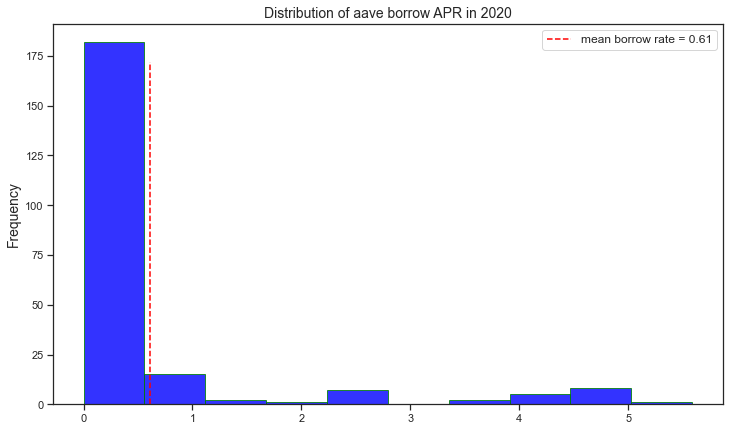

Sources: Aleth.io


In [1712]:
# Borrow rate distribution

fig, ax1 = plt.subplots(figsize=(12,7), sharex=True)

x = df_aave_hist.index
y2 = df_aave_hist['aave_borrow_apr']

ax1.hist(y2, bins=10, alpha=0.8,
          histtype='bar', color='blue',
          edgecolor='green')
ax1.axvline(y2.mean(), color='red', linestyle='dashed',ymax=0.9,label=f'mean borrow rate = {y2.mean().round(2)}')
ax1.set_ylabel("Frequency",fontsize=14)
ax1.set_title("Distribution of aave borrow APR in 2020",fontsize=14)
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.legend(fontsize=12)

plt.show()

print('Sources: Aleth.io')

In [1705]:
df_aave_hist.corr().style.apply(highlight_highcorr)

,aave_earn_apr,aave_borrow_apr,aave_link_col_ratio,aave_link_outst_debt,aave_link_supp_vol
aave_earn_apr,1.000000,0.976043,-0.012408,0.978422,0.524351
aave_borrow_apr,0.976043,1.000000,-0.018981,0.987856,0.566487
aave_link_col_ratio,-0.012408,-0.018981,1.000000,-0.011892,-0.063169
aave_link_outst_debt,0.978422,0.987856,-0.011892,1.000000,0.627477
aave_link_supp_vol,0.524351,0.566487,-0.063169,0.627477,1.000000


In [1719]:
search_metric('chainlink','pric')

source: santiment


['daily_avg_price_usd',
 'daily_closing_price_usd',
 'daily_high_price_usd',
 'daily_low_price_usd',
 'daily_opening_price_usd',
 'mean_realized_price_usd',
 'mean_realized_price_usd_10y',
 'mean_realized_price_usd_180d',
 'mean_realized_price_usd_1d',
 'mean_realized_price_usd_2y',
 'mean_realized_price_usd_30d',
 'mean_realized_price_usd_365d',
 'mean_realized_price_usd_3y',
 'mean_realized_price_usd_5y',
 'mean_realized_price_usd_60d',
 'mean_realized_price_usd_7d',
 'mean_realized_price_usd_90d',
 'price_btc',
 'price_eth',
 'price_usd',
 'price_usd_5m',
 'price_usd_change_1d',
 'price_usd_change_30d',
 'price_usd_change_7d']

source: santiment


### Outstanding debt

Aave debt LINK debt levels have stayed mostly subdued for most of the year. Leveraging appetite has picked up from early July which coincided with the pace of price rises in LINK. However this appetite has since receided to historical levels closer to the year mean of 359,292.

Unfortunately, at this stage we have not been able to source LINK liquidation data from aave yet. This will be updated in the near future to consider the extent to which liquidations occured over the last year and during the recent upswing of LINK asset price. 

Source: Aleth.io


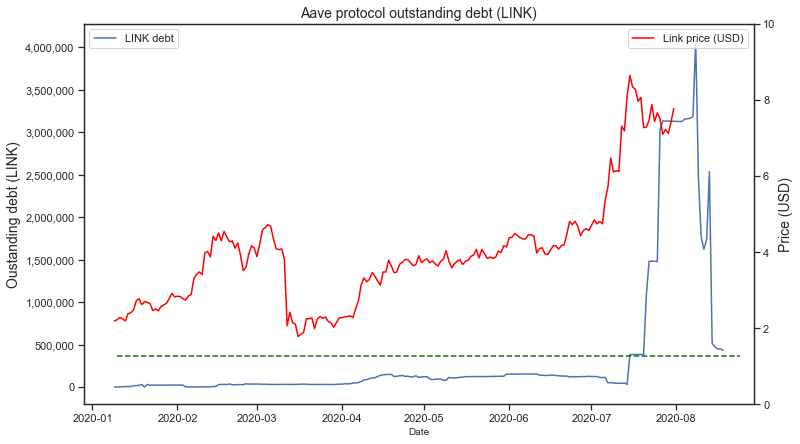

In [1682]:
df = df_aave_hist.join(df_link_cexvol_day['closePriceUsd'])

x = df.index
y = df['aave_link_outst_debt']#.rolling(window=30).mean()
y2 = df['closePriceUsd']
  

fig, ax = plt.subplots(figsize=(12,7), sharex=True)

# First plot two y-axis

ax.plot(x,y)
ax.set_ylabel("Oustanding debt (LINK)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Aave protocol outstanding debt (LINK)',fontsize=14)
ax.axhline(y.mean(), xmin=0.05,xmax=0.98,color='green',linestyle='dashed')
ax.legend(['LINK debt'],loc='upper left')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="red")
ax1.set_ylabel("Price (USD)",fontsize=14)
ax1.set_ylim(0,10)
ax1.legend(['Link price (USD)'],loc='upper right')

print('Source: Aleth.io')

#### Dynamic borrow apr vs debt 

The aave protocol appears to set a strict linear relationship between its outstanding debt and borrow apr rate for LINK. This reflects in the very dynamic nature of its floating borrowing rates that change in the system to adjust demand and supply for assets.  

Source: Alethio


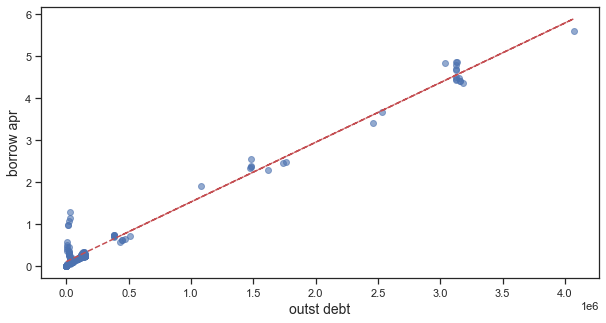

polynomial coeff: [1.42119299e-06 1.04068609e-01]


In [1741]:
print('Source: Alethio')

x = df_aave_hist['aave_link_outst_debt']#.rolling(window=30).mean()
y = df_aave_hist['aave_borrow_apr']


fig = plt.subplots(figsize=(10,5))

plt.scatter(x, y, alpha=0.6)
plt.xlabel('outst debt', fontsize=14)
plt.ylabel('borrow apr', fontsize=14)

# plot trendline/regression fit line of variable relationship
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

# polynomial fit
# returns the polynomial coefficients that minimize the square error 
fit = np.polyfit(x,y,1)
print(f'polynomial coeff: {fit}')

### Collateral ratio (LINK)

source: santiment
Source: Aleth.io, Santiment


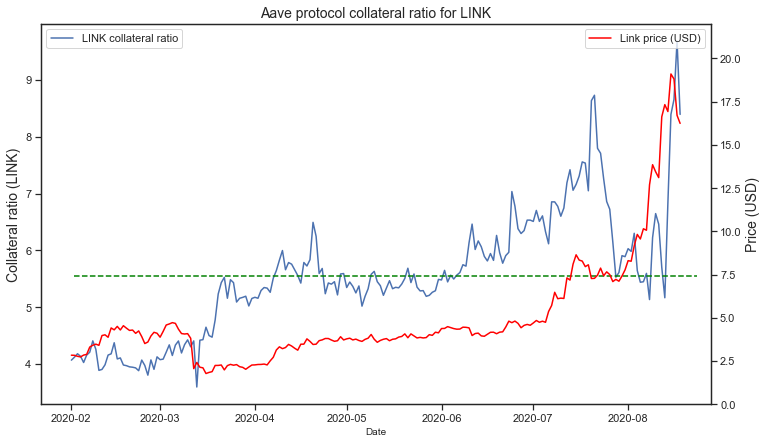

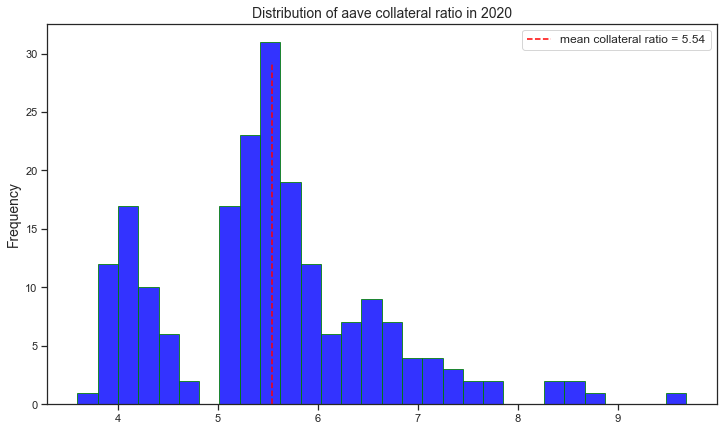

Sources: Aleth.io


In [1742]:
# Quick call to santiment
df = get_metric_timeseries('price_usd','chainlink',to_date='2020-08-19')
df = df.tz_localize(None)

df = df_aave_hist['2020-02-01':].join(df['chainlink_price_usd'])

x = df.index
y = df['aave_link_col_ratio']
y2 = df['chainlink_price_usd']
  

fig, ax = plt.subplots(figsize=(12,7), sharex=True)

# First plot two y-axis

ax.plot(x,y)
ax.set_ylabel("Collateral ratio (LINK)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Aave protocol collateral ratio for LINK',fontsize=14)
ax.axhline(y.mean(), xmin=0.05,xmax=0.98,color='green',linestyle='dashed')
ax.legend(['LINK collateral ratio'],loc='upper left')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a plot with different y-axis using second axis object
ax1 = ax.twinx()
ax1.plot(x, y2,color="red")
ax1.set_ylabel("Price (USD)",fontsize=14)
ax1.set_ylim(0,22)
ax1.legend(['Link price (USD)'],loc='upper right')

print('Source: Aleth.io, Santiment')

# print('Sources: Santiment')

# df_aave_hist['aave_link_col_ratio']['2020-02-01':].plot(figsize=(10,5))

fig, ax1 = plt.subplots(figsize=(12,7), sharex=True)

x = df_aave_hist.index
y2 = df_aave_hist['aave_link_col_ratio']['2020-02-01':]

ax1.hist(y2, bins=30, alpha=0.8,
          histtype='bar', color='blue',
          edgecolor='green')
ax1.axvline(y2.mean(), color='red', linestyle='dashed',ymax=0.9,label=f'mean collateral ratio = {y2.mean().round(2)}')
ax1.set_ylabel("Frequency",fontsize=14)
ax1.set_title("Distribution of aave collateral ratio in 2020",fontsize=14)
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.legend(fontsize=12)

plt.show()

print('Sources: Aleth.io')

### Summary stats for LINK in Aave

In [1641]:
df_aave_hist.describe()

,aave_earn_apr,aave_borrow_apr,aave_link_col_ratio,aave_link_outst_debt,aave_link_supp_vol
count,223.00,223.00,223.00,223.00,223.00
mean,0.12,0.61,6.48,359292.03,5325466.79
std,0.37,1.18,15.46,821542.12,3075453.16
min,0.00,0.00,3.59,0.00,544.22
25%,0.00,0.11,4.43,30092.34,2754141.31
50%,0.00,0.22,5.43,106572.12,5320951.50
75%,0.01,0.29,6.01,137192.89,7252093.72
max,2.28,5.59,235.75,4069828.26,11647678.84


In [1740]:
cm = sns.light_palette("green", as_cmap=True)
df_aave_hist.corr().style.background_gradient(cmap=cm)

,aave_earn_apr,aave_borrow_apr,aave_link_col_ratio,aave_link_outst_debt,aave_link_supp_vol
aave_earn_apr,1.000000,0.976043,-0.012408,0.978422,0.524351
aave_borrow_apr,0.976043,1.000000,-0.018981,0.987856,0.566487
aave_link_col_ratio,-0.012408,-0.018981,1.000000,-0.011892,-0.063169
aave_link_outst_debt,0.978422,0.987856,-0.011892,1.000000,0.627477
aave_link_supp_vol,0.524351,0.566487,-0.063169,0.627477,1.000000


In [1642]:
df_defiall_hist.describe()

,aave_earn_apr,aave_borrow_apr,aave_link_col_ratio,aave_link_outst_debt,aave_link_supp_vol,bzx_earn_apr,bzx_borrow_apr,bzx_link_col_ratio,bzx_link_outst_debt,bzx_link_supp_vol
count,223.00,223.00,223.00,223.00,223.00,223.00,223.00,223.00,223.00,223.00
mean,0.12,0.61,6.48,359292.03,5325466.79,0.16,8.06,3.58,852.46,20771.10
std,0.37,1.18,15.46,821542.12,3075453.16,0.66,0.22,2.19,3545.97,31401.19
min,0.00,0.00,3.59,0.00,544.22,0.00,8.00,1.00,0.00,1768.16
25%,0.00,0.11,4.43,30092.34,2754141.31,0.00,8.00,1.68,0.00,13269.65
50%,0.00,0.22,5.43,106572.12,5320951.50,0.00,8.00,3.16,0.00,13291.46
75%,0.01,0.29,6.01,137192.89,7252093.72,0.00,8.00,4.47,2.11,16211.92
max,2.28,5.59,235.75,4069828.26,11647678.84,6.35,9.61,9.29,23031.50,375945.54


In [541]:
# Defi 

print(df_aave_hist.dtypes)
print(df_bzx_hist.dtypes)
print(df_defiall_hist.dtypes)

# Calculate avg earn/borrow rate - historic (1m/3m/6m/12m)
# Calculate avg collateral ratio 1m/3m/6m/12m
# Calculate avg debt 1m/3m/6m/12m

# For data presentation
# .style.format("{:.3f}")
# example: 
# df_aave_hist.sort_index(ascending=False).style.format("{:.3f}")

In [1704]:
# Function highlighting values
def highlight_highcorr(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s > abs(0.8) 
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply highlighting
    
df_aave_hist.corr().style.apply(highlight_highcorr)

import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)
df_aave_hist.corr().style.background_gradient(cmap=cm)

,aave_earn_apr,aave_borrow_apr,aave_link_col_ratio,aave_link_outst_debt,aave_link_supp_vol
aave_earn_apr,1.000000,0.976043,-0.012408,0.978422,0.524351
aave_borrow_apr,0.976043,1.000000,-0.018981,0.987856,0.566487
aave_link_col_ratio,-0.012408,-0.018981,1.000000,-0.011892,-0.063169
aave_link_outst_debt,0.978422,0.987856,-0.011892,1.000000,0.627477
aave_link_supp_vol,0.524351,0.566487,-0.063169,0.627477,1.000000


### Timeseries - hourly

In [ ]:
# Data ready for analysis
df_pricevol_hr

---
---
## ANALYSIS REPORT

---

## Experimentations

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [1283]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}eur/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [1285]:
two_years = (pd.Timestamp.now() - pd.offsets.Day(730))
two_years

Timestamp('2018-08-21 13:48:09.432282')

In [1286]:
link = get_historic_price('link', 'kraken', after=two_years)
link.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2019-12-02 07:00:00,1.93,1.93,1.89,1.92,5537.28,10554.54
2019-12-02 09:00:00,1.92,1.92,1.90,1.90,902.50,1725.66
2019-12-02 10:00:00,1.92,1.92,1.92,1.92,350.00,672.60
2019-12-02 11:00:00,1.93,1.93,1.92,1.92,430.07,827.66
2019-12-02 12:00:00,1.91,1.91,1.91,1.91,58.00,110.54


In [ ]:
link.describe()

In [ ]:
link['ClosePrice'].plot(figsize=(15,7))

In [ ]:
link['ClosePrice'].plot(kind='box', vert=False, figsize=(14,6))

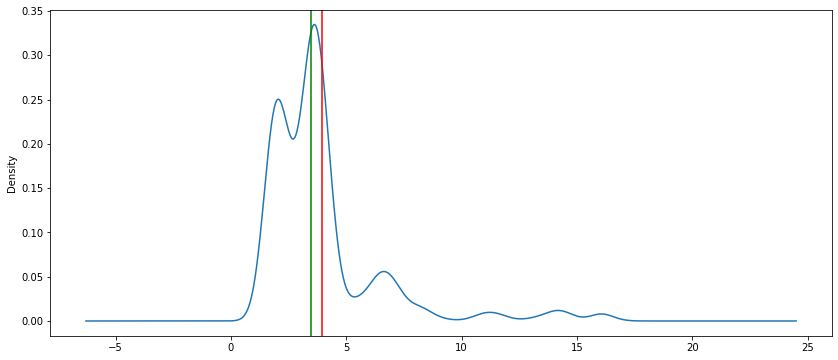

In [1287]:
# 
axy = link['ClosePrice'].plot(kind='density', figsize=(14,6))
axy.axvline(link['ClosePrice'].mean(), color='red')
axy.axvline(link['ClosePrice'].median(), color='green')

In [ ]:
# Distribution since 2020-04
link.loc[link.index > '2020-04-01 01:00:00']['ClosePrice'].plot(kind='density', figsize=(14,6))

In [1289]:
corr = link[['OpenPrice','Volume','ClosePrice']].corr()
corr

,OpenPrice,Volume,ClosePrice
OpenPrice,1.00,0.34,1.00
Volume,0.34,1.00,0.34
ClosePrice,1.00,0.34,1.00


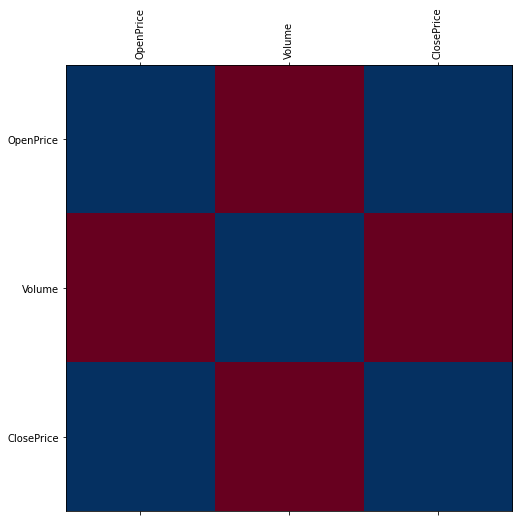

In [1290]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
requests.get?

In [ ]:
x = df_balexch_total.index
y = df_balexch_total['token_bal_exch']


fig, ax = plt.subplots(figsize=(12,7))

# First plot 
ax.plot(x, y, color="red")
ax.set_ylabel("Team treasury (LINK)",fontsize=14)
ax.set_xlabel("Date",fontsize=10)
ax.set_title('Gini coeff increasing over last 12m')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.axhline(80000000)

plt.show()

---

# ANALYSIS


## Auction liquidation data

Only MCD data

```
- collateral    float64     collateral currency e.g. eth
- debt          float64     DAI
- profit        float64     DAI
- soldColl      float64     collateral currency e.g. eth
- soldFor       float64     DAI
```

In [ ]:
# global debt auction stats
liquidations[['debt']].describe()

In [ ]:
liquidations.index.min()

In [ ]:
# debt auction stats by collateral
print('Debt liquidation stats by collateral type')
liquidations[['debt','cdpType']].groupby('cdpType').describe()

In [ ]:
subset = liquidations.loc[liquidations['profit']< 0]
subset['profit'].sum()

In [ ]:
liquidations[['profit', 'debt']].plot(kind='density', figsize=(14,6))

In [ ]:
# Groupby: cdptype debt median
debt_liq = liquidations[['cdpType', 'debt']].groupby('cdpType').median().round(2)
debt_liq
fig, axes = plt.subplots(figsize=(7,5), dpi=100)
plt.bar(debt_liq.index, height=debt_liq.debt)
plt.title('Median Debt Liquidation by Collateral');

In [1288]:
import matplotlib.pyplot as plt
%matplotlib inline

x1 = liquidations.loc[liquidations.cdpType == 'ETH', 'debt']
# x2 = liquidations.loc[liquidations.cdpType == 'BAT', 'debt']
# x3 = liquidations.loc[liquidations.cdpType == 'ZRX', 'debt']
# x3 = liquidations.loc[liquidations.cdpType == 'WBTC', 'debt']
# x3 = liquidations.loc[liquidations.cdpType == 'KNC', 'debt']

kwargs = dict(alpha=0.5, bins=200)

plt.hist(x1, **kwargs, color='g', label='ETH')
# plt.hist(x2, **kwargs, color='b', label='BAT')
# plt.hist(x3, **kwargs, color='r', label='ZRX')
# plt.hist(x3, **kwargs, color='r', label='WBTC')
# plt.hist(x3, **kwargs, color='r', label='KNC')
plt.gca().set(title='Frequency Histogram of Collateral Debt Liquidation (DAI)', ylabel='Frequency')
plt.xlim(-100,10000)
plt.legend();

NameError: name 'liquidations' is not defined

In [1645]:
import seaborn as sns

x1 = liquidations.loc[liquidations.cdpType=='ETH', ['debt']]
x2 = liquidations.loc[liquidations.cdpType=='BAT', ['debt']]
x3 = liquidations.loc[liquidations.cdpType=='WBTC', ['debt']]
x4 = liquidations.loc[liquidations.cdpType=='KNC', ['debt']]


# plot
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=False, dpi=100)
sns.distplot(x1 , color="dodgerblue", ax=axes[0], axlabel='ETH')
sns.distplot(x2 , color="deeppink", ax=axes[1], axlabel='BAT')
sns.distplot(x3 , color="gold", ax=axes[2], axlabel='WBTC')
sns.distplot(x4 , color="blue", ax=axes[3], axlabel='KNC')

plt.xlim(0,10000);

NameError: name 'liquidations' is not defined

---
---

# FORUM ANALYSIS POST

## Background

### Protocol summary

- whitepaper abstract
- website overview

### Token use

- whitepaper token description
- website token description

### Governance 

- any information on governance?
- from website

## Token information

### On-chain activity
- https://academy.santiment.net/sansheets/functions/#san_active_deposits
- https://academy.santiment.net/sansheets/functions/#san_active_addresses
- https://studio.glassnode.com/metrics?a=LINK&category=Network%20Stats&m=addresses.NewNonZeroCount
    - daily_active_addresses
    - daily_active_deposits
    - daily_transaction_volume 
    - daily_price
    - ohlcv daily
    - daily_new_unique_addresses

### Token allocation/distribution

sources:
- coingecko
- santiment
- etherscan

data: 
- data
    - initial_supply    
    - current_token_supply
    - circulating supply 
    - market cap
    - daily_price
    - implied market cap (?)

circulating supply (definition by glassnode): 
```
LINK’s circulating supply of 350,000,000, as reported by CoinMarketCap, only counts the tokens sold to the public in the ICO. 

After taking the team sell off into account, the actual circulating supply is closer to ~367,909,600.
```

### Asset price returns

- santiment. raw data:
    - daily_price
    - daily_price

Derived/Calculated variables from daily_price
- asset_price_return_1m
- asset_price_return_3m 
- asset_price_return_6m     
- asset_price_return_12m
- asset_price_return_24m

Other derived from daily_price:
- 200MA_asset_price (EMA)
- 50MA_asset_price (EMA)

article
- https://bravenewcoin.com/insights/chainlink-price-analysis-strong-fundamental-metrics-support-price-gains

### Token ownership concentration (distribution)

sources: 
- etherscan
- santiment
- glassnode

data:
- https://etherscan.io/token/tokenholderchart/0x514910771af9ca656af840dff83e8264ecf986ca?range=100 > top 100 address token ownership
- https://academy.santiment.net/metrics/amount-in-top-holders/ > Token/Coin amount
- https://academy.santiment.net/sansheets/functions/#san_top_holders_percent_of_total_supply
- https://academy.santiment.net/metrics/top-holders/#top-holders-balance
- https://academy.santiment.net/metrics/mean-coin-age/mean-coin-age-technical/#total-age
    - holders_distribution_total > only paid plan
    - amount_in_top_holders
    - amount_in_exchange_top_holders
    - age_distribution

sansheets: 
- SAN_TOP_HOLDERS_PERCENT_OF_TOTAL_SUPPLY

data > glassnode:
- https://studio.glassnode.com/metrics?a=LINK&m=distribution.Balance1PctHolders
- https://studio.glassnode.com/metrics?a=LINK&m=distribution.Gini > gini coeff for LINK
    - Gini Coefficient
    - 1% Richlist Balance

articles:
- https://medium.com/glassnode-insights/on-chain-distribution-analysis-of-chainlink-link-5ee7acb62f62
 

### Treasury funds data?
sources: 
- santiment
- coindesk

team addresses:
- 0xe0362f7445e3203a496f6f8b3d51cbb413b69be2 — Current balance: 50,000,000 LINK
- 0x75398564ce69b7498da10a11ab06fd8ff549001c — Current balance: 50,000,000 LINK
- 0x5560d001f977df5e49ead7ab0bdd437c4ee3a99e — Current balance: 50,000,000 LINK
- 0xdad22a85ef8310ef582b70e4051e543f3153e11f — Current balance: 46,500,000 LINK
- 0xbe6977e08d4479c0a6777539ae0e8fa27be4e9d6 — Current balance: 50,000,000 LINK
- 0xf37c348b7d19b17b29cd5cfa64cfa48e2d6eb8db — Current balance: 35,590,421.01 LINK

data:
- team address?
- https://academy.santiment.net/sansheets/functions/#san_historical_balance
    - historical_balance

ICO distribution: 30 team/35 nodes/35 investors
- https://etherscan.io/token/0x514910771af9ca656af840dff83e8264ecf986ca?a=0xf55037738604fddfc4043d12f25124e94d7d1780 > describes ICO distribution

articles:
- best article: https://medium.com/glassnode-insights/on-chain-distribution-analysis-of-chainlink-link-5ee7acb62f62
- https://bravenewcoin.com/insights/celsius-network-partners-with-chainlink
- https://www.coindesk.com/crypo-lender-celsius-taps-chainlinks-price-oracles-for-interest-rate-decentralization > move "significant" portion of crypto holdings under Celsius’ treasury management service. For interest accrual.
- https://www.prnewswire.com/news-releases/celsius-network-and-chainlink-form-long-term-partnership-to-create-superior-financial-platform-through-decentralization-301031500.html
- https://bravenewcoin.com/insights/chainlink-price-analysis-strong-fundamental-metrics-support-price-gains

### Token age
- https://academy.santiment.net/sansheets/functions/#san_token_age_consumed
- https://academy.santiment.net/sansheets/functions/#san_mean_age
- https://academy.santiment.net/metrics/mean-coin-age/mean-coin-age-technical/#total-age
    - age_consumed > Spikes are signal of a large amount of tokens moving after being idle
    - mean_age 


In [ ]:
    # - percent_of_total_supply_on_exchanges
    # - supply_on_exchanges
df = san.get('prices/chainlink')
df.tail()

In [ ]:
search_metric('chainlink','exchange')

In [ ]:
df

In [ ]:
df = san.get(
    "historical_balance/chainlink",
    address="0xe0362f7445e3203a496f6f8b3d51cbb413b69be2",
    from_date="2018-04-18",
    to_date="2020-07-31",
    interval="1d"
)

## Exchanges 

- https://academy.santiment.net/sansheets/functions/#san_exchange_balance
- https://academy.santiment.net/sansheets/functions/#san_exchange_funds_flow
- https://academy.santiment.net/sansheets/functions/#san_exchange_inflow
- https://academy.santiment.net/sansheets/functions/#san_exchange_outflow 
- https://academy.santiment.net/metrics/supply-on-or-outside-exchanges/#measuring-unit

Note : on-chain metrics
- Liquidity
    - percent_of_total_supply_on_exchanges
    - supply_on_exchanges
    - supply_outside_exchanges
    - exchange_balance
- Flows:
    - exchange_inflow   
    - exchange_outflow

> Do flows correlate to pricing activity?

### Centralised exchanges 

- list exchanges where token listed
- trading volume on **real exchanges** only (see messari definition)

sources: 
- BraveNewCoin
- Coinmarketcap
- coingecko
- messari

data:
- https://www.coingecko.com/en/coins/chainlink#markets
- https://bravenewcoin.com/data-and-charts/assets/LINK/markets

List exchanges, pair, volumes
- exchange_name
- trading_pair e.g. LINK/USD 
- trading_volume

Tokens on exchanges
- https://studio.glassnode.com/metrics?a=LINK&m=distribution.BalanceExchanges
- https://studio.glassnode.com/metrics?a=BTC&m=distribution.BalanceExchangesAll
- https://academy.santiment.net/metrics/supply-on-or-outside-exchanges/#measuring-unit
    - daily_exchange_balance_all (of token)
    - daily_exchange_balance_stacked (of token by exchange)
    - percent_of_total_supply_on_exchanges

- Derived metrics:
    - percent_of_circulating_supply_on_exchanges > calc: supply_on_exchanges / circulating_supply

Note: only addresses known to belong to exchanges


Trading: on-chain 
- https://academy.santiment.net/sansheets/functions/#san_transaction_volume
    - daily_transaction_volume (in token) > on-chain transaction volume

Trading: exchange (volume by pair: USD/USDC/BTC/ETH)
- https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistoday
- https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataExchangeSymbolHistohour
    - daily-trading_volume_by_exchange (and token pair)
    - hourly-trading_volume_by_exchange (and token pair)

- Derived metric:
    - Rolling 30d avg volume > calc: 

#### Derived metric > **token velocity**
- https://academy.santiment.net/sansheets/functions/#san_daily_closing_marketcap
- https://academy.santiment.net/sansheets/functions/#san_daily_closing_price
- daily_closing_price_usd
- daily_closing_marketcap_usd
- daily_transaction_volume
    - transaction_volume (in usd) / market_cap > calc: (transaction_volume * closing_price) / closing_marketcap
    
Velocity definition (glassnode):
```
Velocity is a measure of how quickly units are circulating in the network and is calculated by dividing the on-chain transaction volume (in USD) by the market cap, i.e. the inverse of the NVT ratio.
``` 

articles:
- https://messari.io/article/messari-proprietary-methods > method for centralised exchange **real volume** and **exchange selection**


### Decentralised exchanges 

List of decentralised exchanges with LINK

sources:
- etherscan
- messari
- coingecko

data: 
- https://etherscan.io/stat/dextracker
- https://etherscan.io/dextracker
- https://messari.io/asset/chainlink/metrics
    - Transaction Volume (24H, USD) e.g. $551,657,069.67
    - Median Transaction Volume (USD) e.g. $1,286.96

Pools:
- https://uniswap.info/token/0x514910771af9ca656af840dff83e8264ecf986ca
    - Transaction_volume 24h (usd)
    - Transaction_count 24h
    - Total_liquidity

0x:
- https://api.0xtracker.com/tokens/:address
    - tradeCount	
    - tradeVolume.USD	
    - tradeVolume.token


articles: 
- 2019 report on DEXes: https://medium.com/alethio/dex-in-the-2019-a-recap-by-numbers-96d506ba1cb8
- 2019: trade volume on exchages (all) https://public.tableau.com/profile/alethio#!/vizhome/DEXTradesHistory/Dashboard1
- https://messari.io/resource/decentralized-exchanges > dex resources
- https://github.com/econoar/ethhub/blob/master/built-on-ethereum/decentralized-exchanges/README.md > types of DEXs

types: 
- offchain order book (e.g 0x, etherdelta, loopring...)
- p2p (airswap, republic protocol)
- pool based (e.g. kyber, bancor, uniswap) 

### Liquidity pools (e.g.)



## 3rd party lending platforms

### Platforms

sources: 
- coingecko
- defiscore
- loanscan
- alethio api

data: 


articles:
- https://www.binance.com/en/support/articles/73a5d3352ae944fe8e899d2602bee27c > Binance leveraged LINK. Maybe in exchanges?

### Interest rates

sources: 
- alethio api

data: 
- https://public.tableau.com/profile/alethio.defi#!/vizhome/DeFiInterestRates/DeFiInterestRates
- static view    
    - borrow_apr (by protocol/platform)
    - earn_apr (by protocol/platform)
- timeseries view:
    - daily_borrow_apr (by protocol/platform)
    - daily_earn_apr (by protocol/platform)

articles:

### Borrowed volumes

- https://public.tableau.com/profile/alethio.defi#!/vizhome/BorrowVolumeDashboard/BorrowVolumeonMajorLendingPlatforms
    - daily borrrowed volumes (usd or eth) - time series
    - daily cumul borrowed volumes (usd or eth) - time series
    - daily # unique borrower - time series
    - daily # of borrows - time series
    - daily borrowed token value (usd or eth) by platform - by platform 

### Outstanding debt and coll ratio 



### Liquidation/default volumes



## Node operators 

- https://public.tableau.com/profile/cryptospong3#!/vizhome/ChainlinkContractTransactionCounts/Sheet1

## Comparative analysis (link vs other collateral)

> this is a bonus analysis to guide decision making 

### Correlation

### Vaults debt/CR 

### Liquidations

#### Chainlink vs other oracle platforms

articles:
- https://medium.com/@smartcontentpublication/a-comparative-analysis-of-band-protocol-and-chainlink-54b7d14823b5

## Summary of Risks


## Risk highlights

A few notes: 

- token concentration risks 
- team frequent offload of tokens (500K). Unclear if due to operations/treasury reasons for growth or lack of trust in fundamentals of asset price (or opportunistic approach).  
- reduced supply of tokens through exchanges > risk for liquidity during keeper auctions
- concentration of trading activity in centralised exchanges e.g. Binance
- volume data from decentralised exchanges transcribed by data aggregators (e.g. cryptocompare, coingecko) seems to have underlying issues when compared to DEXes own dashboards. On the other side, volume data gathered directly from DEXes api endpoints frequently lacks reliable timeseries. 

## Other risks